# Supervised Machine Learning: Water Treatment Plant 

- <a href="#Data-Visualisation">Data Viz</a>
- <a href="#Hypothesis-Testing">Hypothesis Testing</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

import scipy.stats as st
import pingouin as pg

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, auc, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.decomposition import PCA

## Data Collection

In [2]:
url=f"https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"

In [3]:
df=pd.read_csv(url, header=None)

In [335]:
names=f"""ID	ID
Age	age
Gender	gender
Education	level of education
Country	country of current residence
Ethnicity	ethnicity
Nscore	NEO-FFI-R Neuroticism
Escore	NEO-FFI-R Extraversion
Oscore	NEO-FFI-R Openness
Ascore	NEO-FFI-R Agreeableness
Cscore	NEO-FFI-R Conscientiousness
Impulsive	BIS-11 Impulsiveness
SS	ImpSS sensation
Alcohol	alcohol consumption (output attribute)
Amphet	amphetamines consumption (output attribute)
Amyl	amyl nitrite consumption (output attribute)
Benzos	benzodiazepine consumption (output attribute)
Caff	caffeine consumption (output attribute)
Cannabis	cannabis consumption (output attribute)
Choc	chocolate consumption (output attribute)
Coke	cocaine consumption (output attribute)
Crack	crack consumption (output attribute)
Ecstasy	ecstasy consumption (output attribute)
Heroin	heroin consumption (output attribute)
Ketamine	ketamine consumption (output attribute)
Legalh	legal highs consumption (output attribute)
LSD	LSD consumption (output attribute)
Meth	methadone consumption (output attribute)
Mushrooms	magic mushrooms consumption (output attribute)
Nicotine	nicotine consumption (output attribute)
Semer	fictitious drug Semeron consumption (output attribute)
VSA	volatile substance abuse consumption (output attribute)"""

In [5]:
names = [row.split("\t") for row in names.split(f"\n")]

In [6]:
df.columns=pd.DataFrame(names)[0]

df=pd.read_csv("data.csv")

In [7]:
df.head()

0  ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

0   Oscore   Ascore  ...  Ecstasy  Heroin  Ketamine Legalh  LSD Meth  \
0 -0.58331 -0.91699  ...      CL0     CL0       CL0    CL0  CL0  CL0   
1  1.43533  0.76096  ...      CL4     CL0       CL2    CL0  CL2  CL3   
2 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0  CL0  CL0   
3 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0  CL0  CL0   
4 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1  CL0  CL0   

0 Mushrooms Nicotine Semer  VSA  
0       CL0      CL2   CL0  CL0  
1       CL0      CL4   CL0  CL0  
2       CL1      CL0   CL0  CL0  
3       CL0      CL2   CL0  CL0  
4       CL2      CL2   CL0  CL0  

[5 rows x 32 columns]

## Data Cleaning
### Incorrect Format

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

### Missing Values

In [10]:
df.isna().sum()

0
ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

## Unneccessary Columns

In [11]:
df.drop(columns="ID", inplace=True)

In [ ]:
df.to_csv("data.csv", index=False)

## Bias Sample 

In [12]:
# Semeron is a fictious drug included on the survey to identify those who exaggerate their drug usage, therefore those indicated with usage should be removed
df.Semer.value_counts()
df.drop(df[df.Semer!="CL0"].index, axis=0, inplace=True)
df.drop(columns="Semer", inplace=True)

## Non-Numerical Columns

In [13]:
num=df._get_numeric_data().columns
cat= list(set(df.columns).difference(set(num)))

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
for c in cat:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])

### Hard Drugs

In [23]:
hard_drugs=["Amphet", "Benzos", "Coke", "Crack", "Ecstasy", "Heroin", "Legalh", "Meth"]

In [129]:
df["hard"]=df[df[hard_drugs]>1].any(axis=1)

In [27]:
df.hard.value_counts(normalize=True).round(2)

False    0.78
True     0.22
Name: hard, dtype: float64

In [26]:
age_lb=["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
gender_lb=["Male", "Female"]
education_lb=["Left before 16", "Left at 16", "Left at 17", "Left at 18","Left at Uni", "Certificate/Diploma", "University", "Masters", "PhD"]
country_lb=["USA", "New Zealand", "Other", "Australia",  "Republic of Ireland", "Canada", "UK"]
ethnicity_lb=["Black", "Asian", "White", "Mixed-White/Black", "Other", "Mixed-White/Asian", "Mixed-Black/Asian"]

## Distribution of Variables

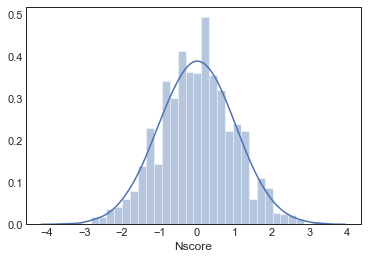

In [28]:
sns.distplot(df.Nscore)
plt.savefig("graph/Distribution Nscore.png")

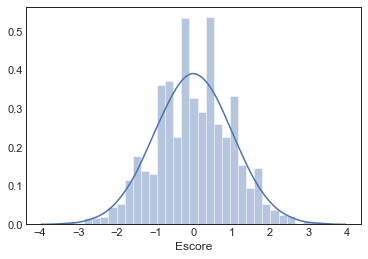

In [29]:
sns.distplot(df.Escore)
plt.savefig("graph/Distribution Escore.png")

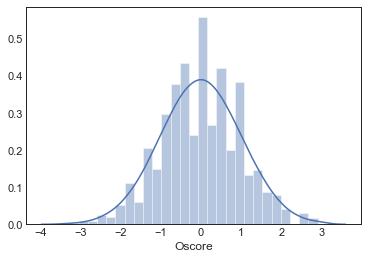

In [30]:
sns.distplot(df.Oscore)
plt.savefig("graph/Distribution Oscore.png")

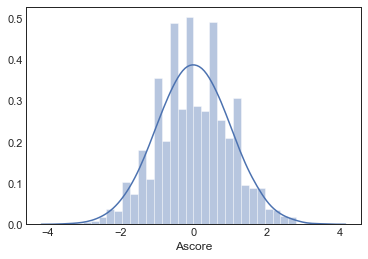

In [31]:
sns.distplot(df.Ascore)
plt.savefig("graph/Distribution Ascore.png")

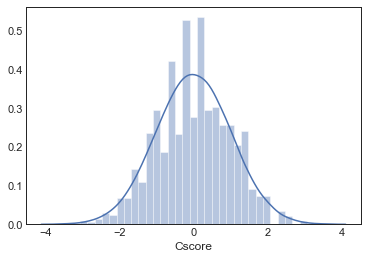

In [32]:
sns.distplot(df.Cscore)
plt.savefig("graph/Distribution Cscore.png")

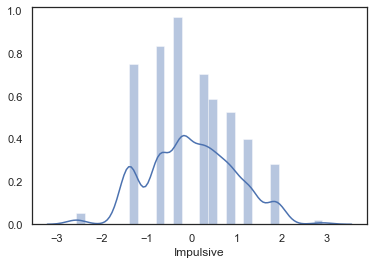

In [182]:
sns.distplot(df.Impulsive)
plt.savefig("graph/Distribution Impulsive.png")

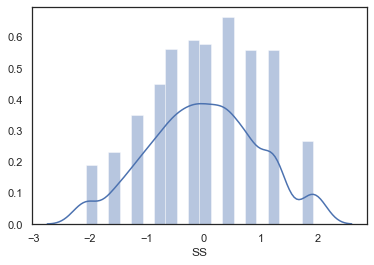

In [184]:
sns.distplot(df.SS)
plt.savefig("graph/Distribution SS.png")

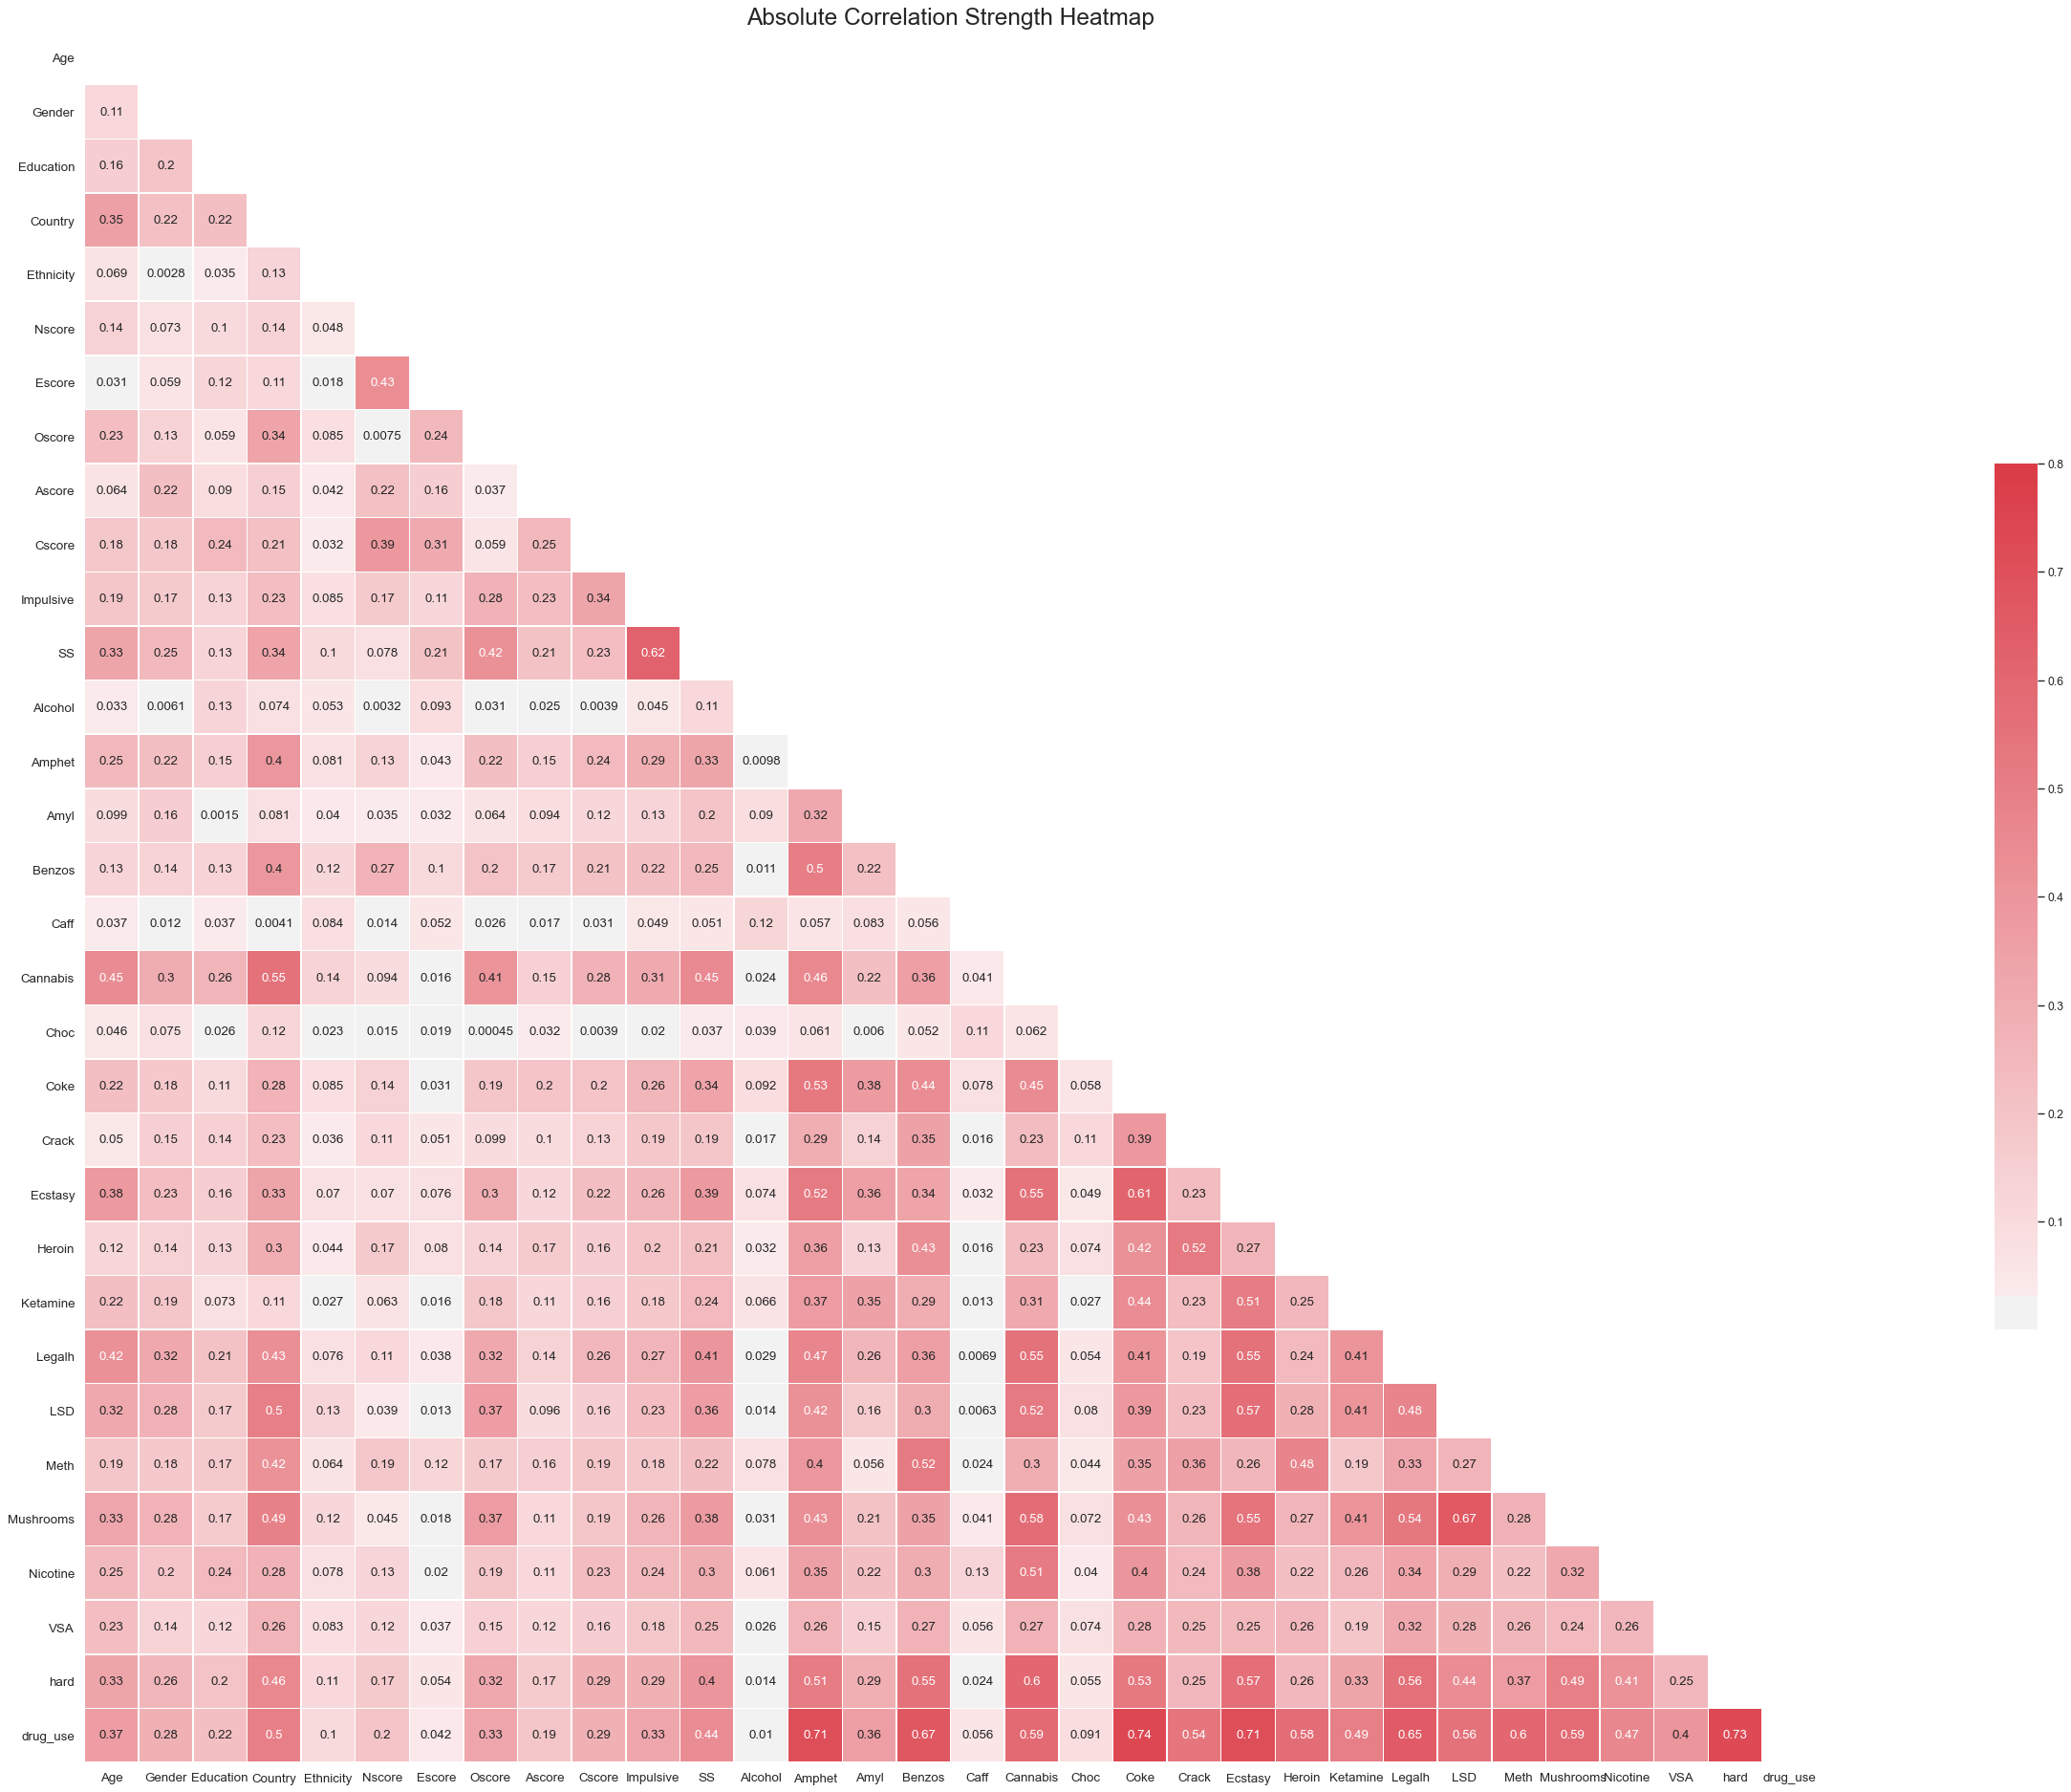

In [181]:
sns.set(style="white")

# Compute the correlation matrix
corr = abs(df._get_numeric_data().corr())

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(60, 30), dpi=80)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, cmap=cmap, vmax=.8, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Absolute Correlation Strength Heatmap', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("")
plt.ylabel("")
plt.savefig("graph/correlation.png")
plt.show()

## Data Visualisation

### Variety of Drug Type Used by Gender

In [115]:
df["drug_use"]=df[df[hard_drugs]>1][hard_drugs].count(axis=1)

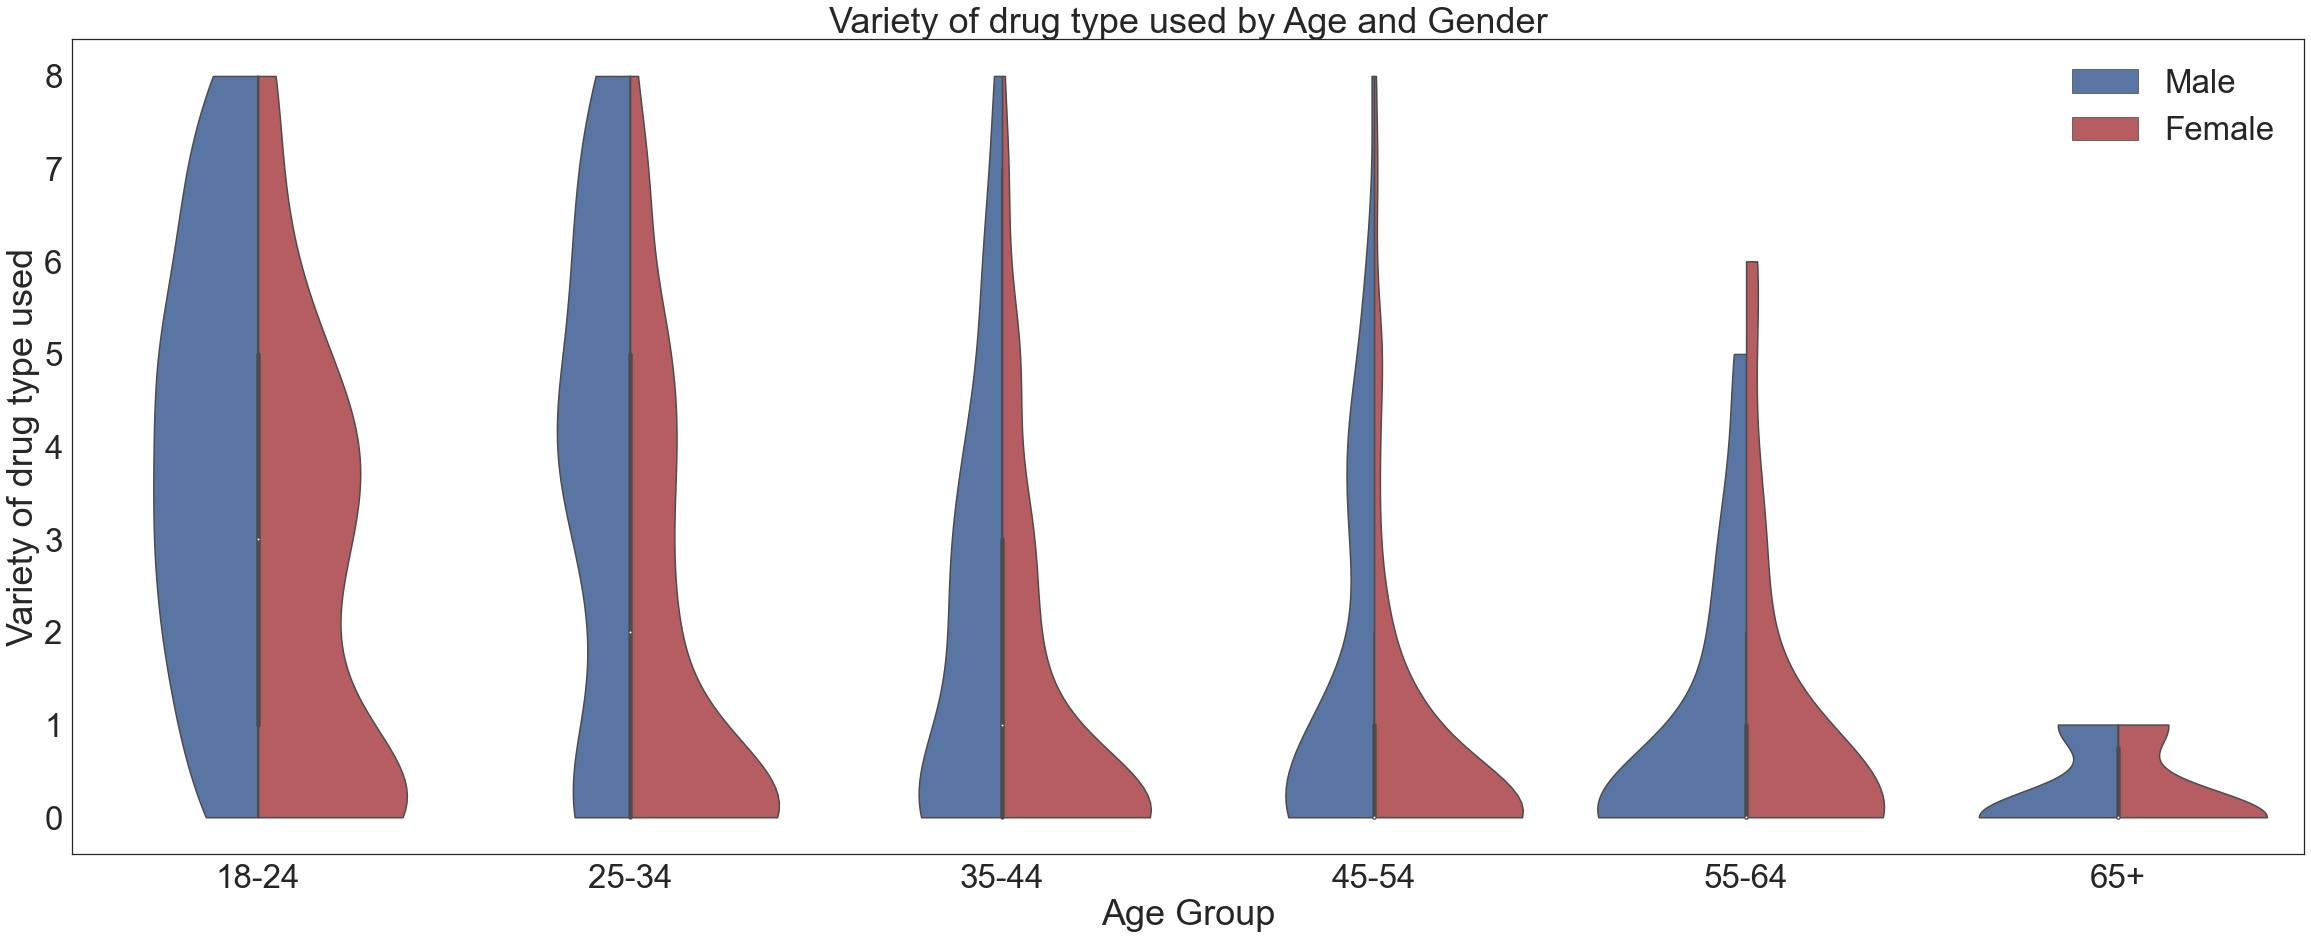

In [194]:
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 3)
f, ax = plt.subplots(figsize=(40, 15))

g=sns.violinplot(x="Age", y="drug_use", data=df,hue='Gender',split=True, legend=True, palette=["b","r"], cut=0)
g.set_xticklabels(age_lb)

g.set_ylabel("Variety of drug type used")
g.set_xlabel("Age Group")
g.set_title("Variety of drug type used by Age and Gender")
for t, l in zip(g.legend().texts, gender_lb): t.set_text(l)

plt.savefig("graph/Violin drug use by age.png")
plt.show()

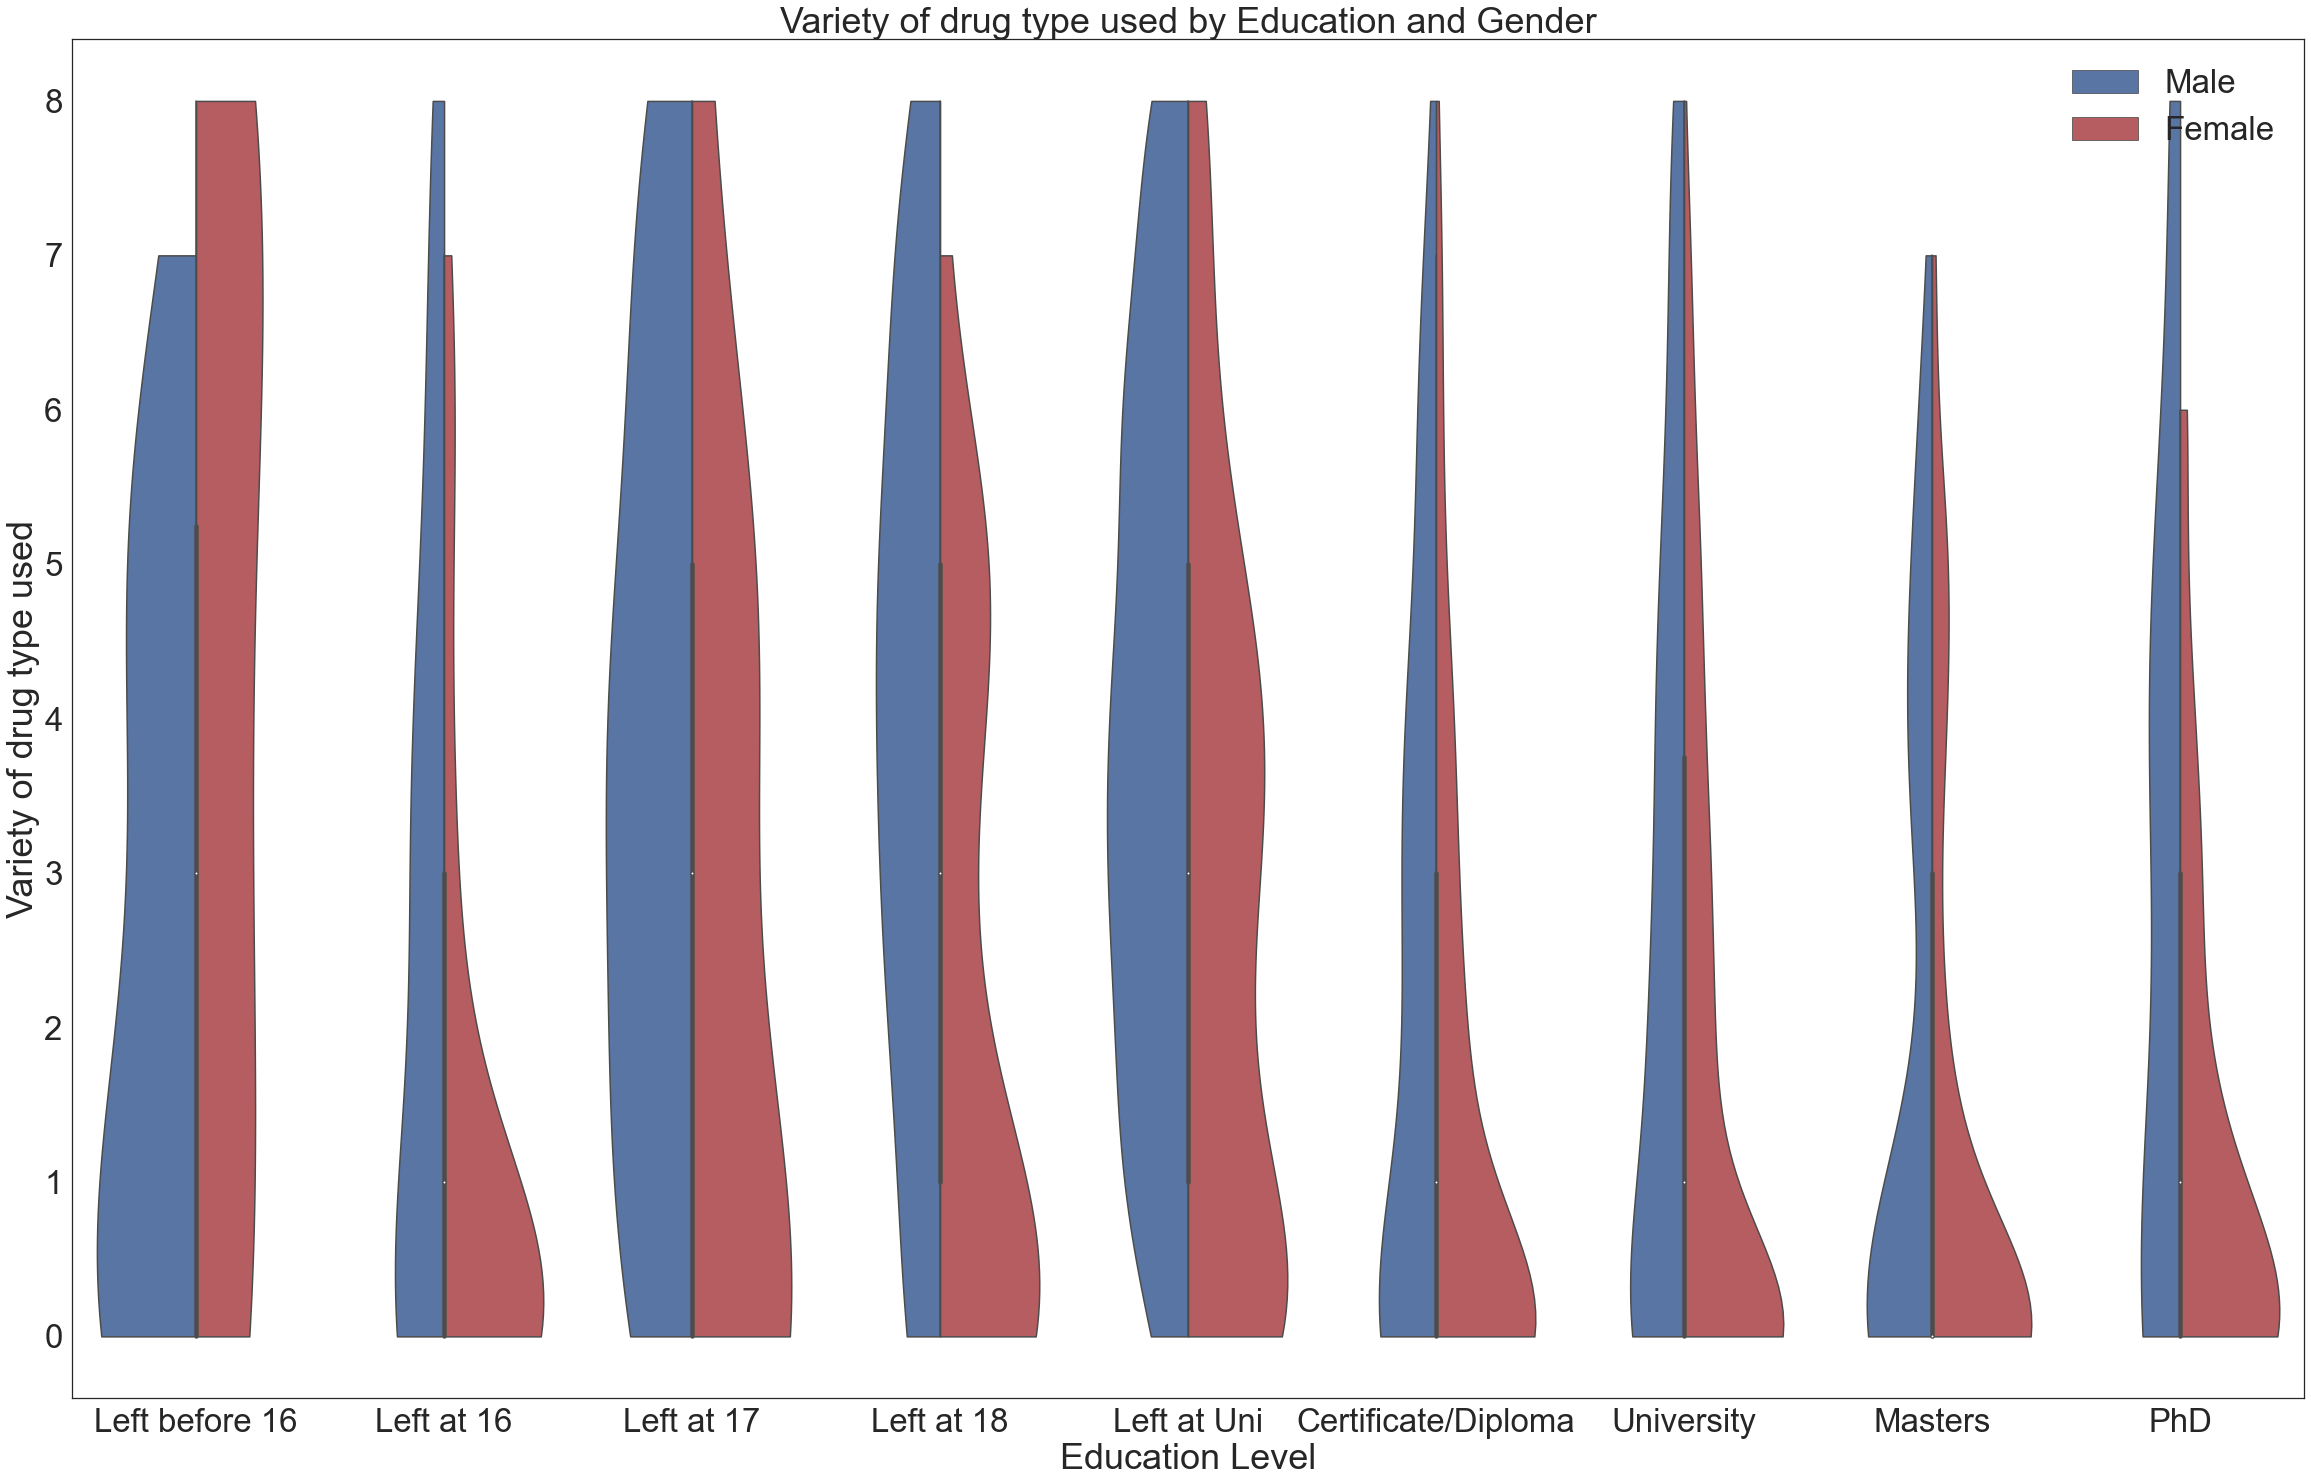

In [195]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Education", y="drug_use", data=df,hue='Gender',split=True, legend=True, palette=["b","r"], cut=0)
g.set_xticklabels(education_lb)

g.set_ylabel("Variety of drug type used")
g.set_xlabel("Education Level")
g.set_title("Variety of drug type used by Education and Gender")
for t, l in zip(g.legend().texts, gender_lb): t.set_text(l)

plt.savefig("graph/Violin drug use by education.png")
plt.show()

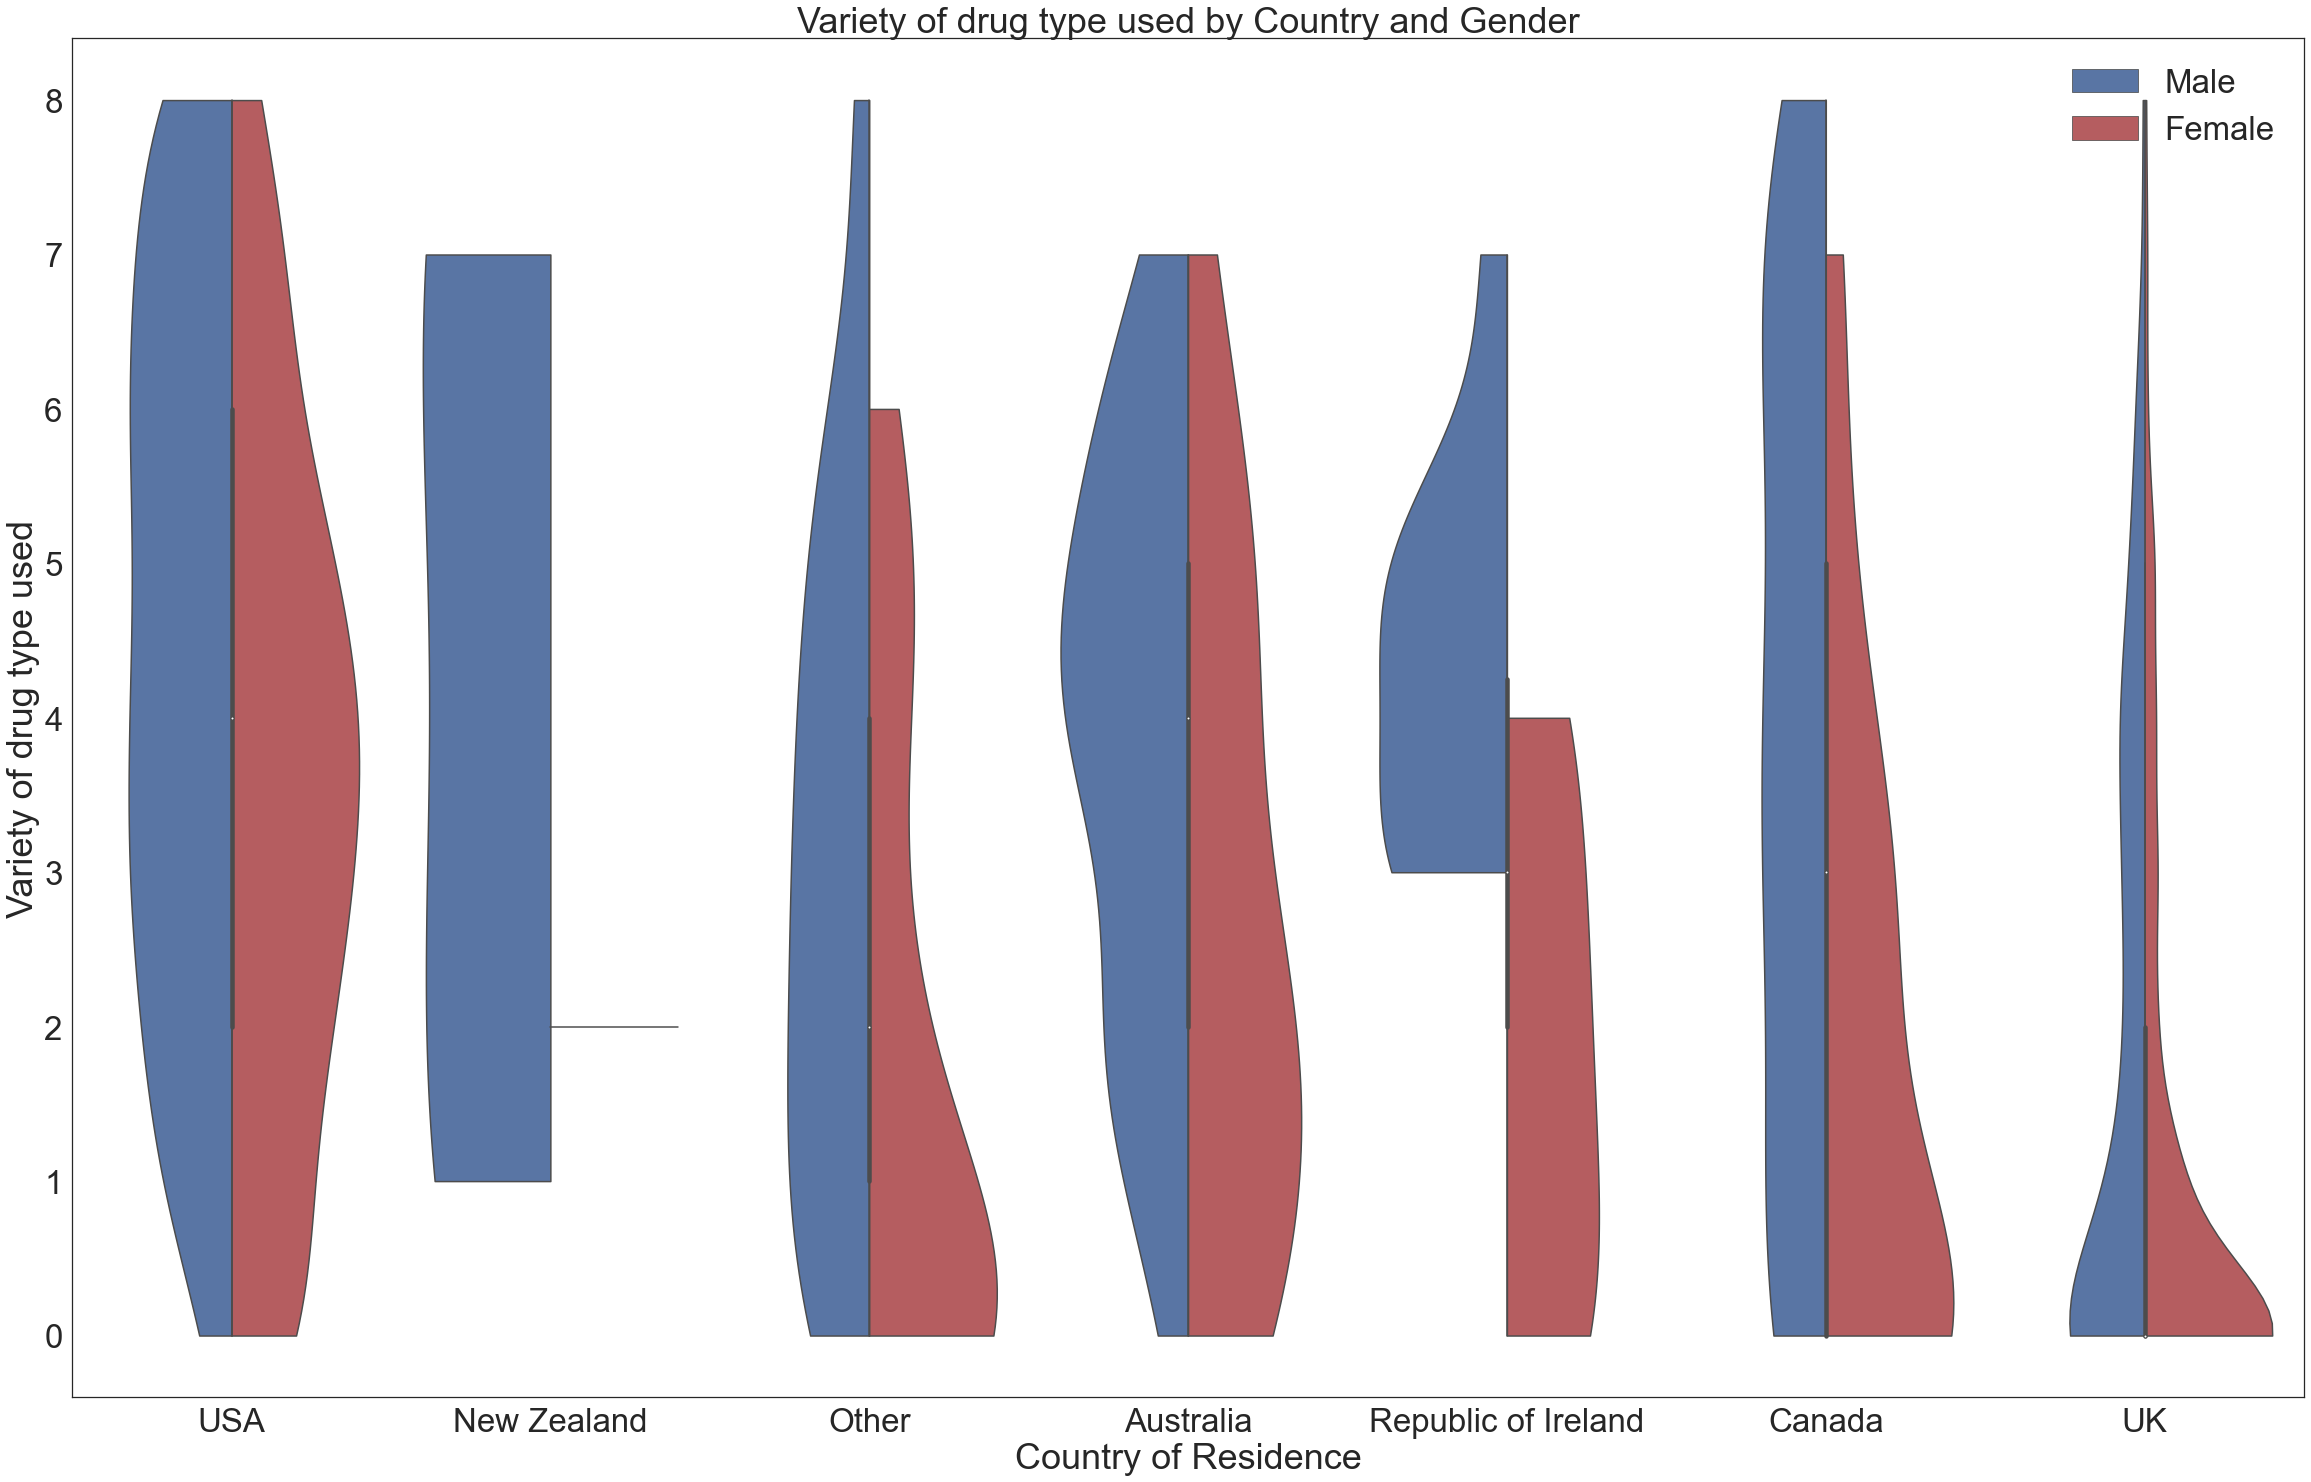

In [196]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Country", y="drug_use", data=df,hue='Gender',split=True, legend=True, palette=["b","r"], cut=0)
g.set_xticklabels(country_lb)

g.set_ylabel("Variety of drug type used")
g.set_xlabel("Country of Residence")
g.set_title("Variety of drug type used by Country and Gender")
for t, l in zip(g.legend().texts, gender_lb): t.set_text(l)

plt.savefig("graph/Violin drug use by country.png")
plt.show()

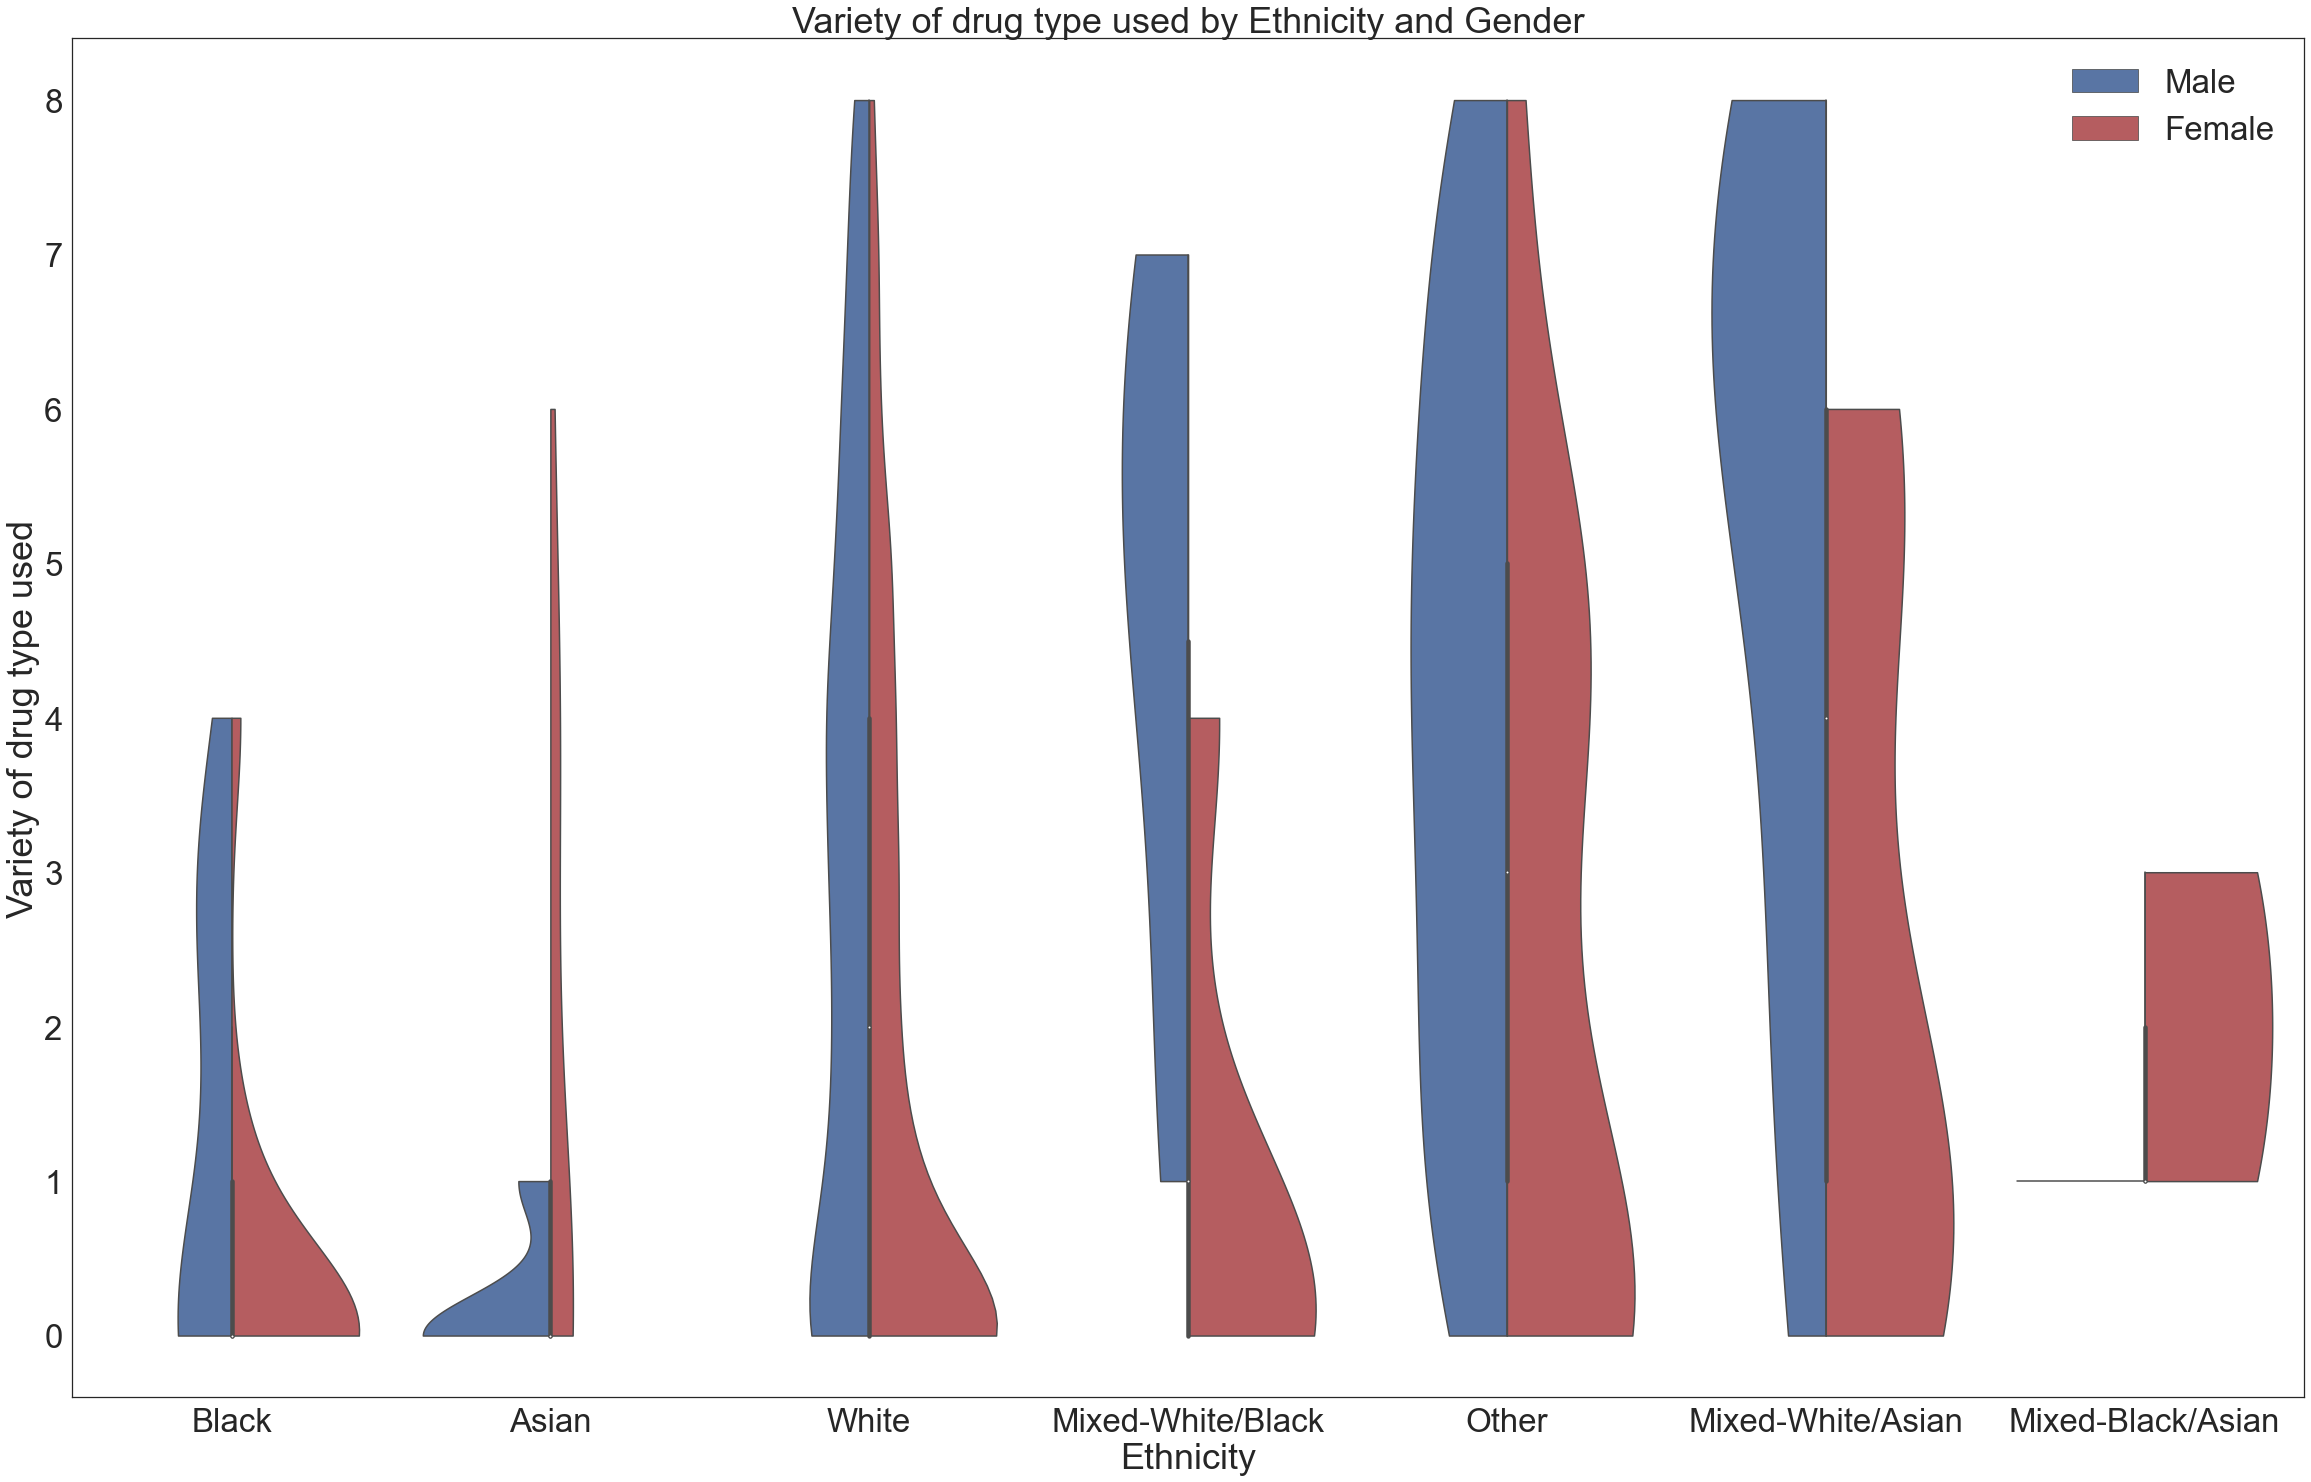

In [197]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Ethnicity", y="drug_use", data=df,hue='Gender',split=True, legend=True, palette=["b","r"], cut=0)
g.set_xticklabels(ethnicity_lb)

g.set_ylabel("Variety of drug type used")
g.set_xlabel("Ethnicity")
g.set_title("Variety of drug type used by Ethnicity and Gender")
for t, l in zip(g.legend().texts, gender_lb): t.set_text(l)

plt.savefig("graph/Violin drug use by ethnicity.png")
plt.show()

### NScore by User

In [185]:
user_lb=["Non-user", "Drug user"]

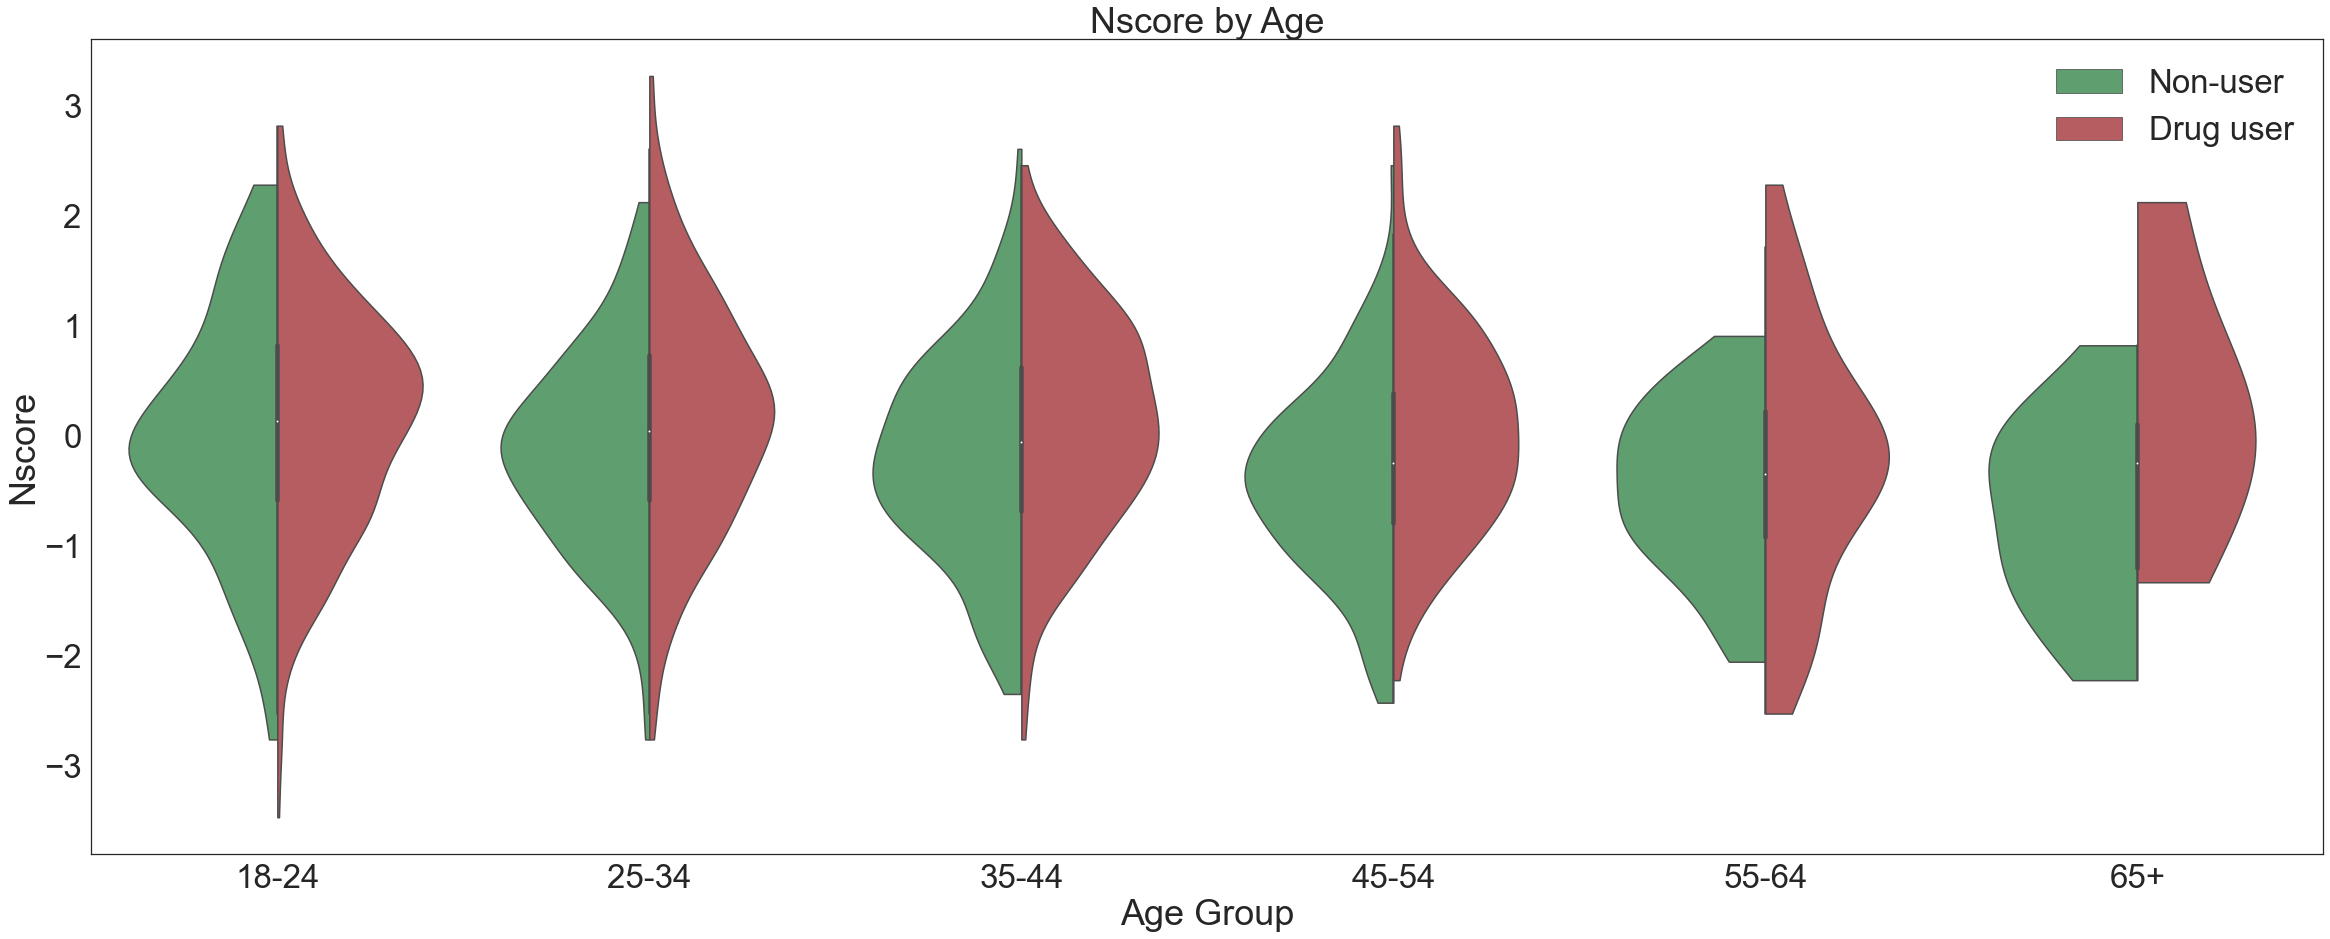

In [189]:
f, ax = plt.subplots(figsize=(40, 15))

g=sns.violinplot(x="Age", y="Nscore", data=df,hue='hard',split=True, legend=True, palette=["g","r"], cut=0)
g.set_xticklabels(age_lb)

g.set_ylabel("Nscore")
g.set_xlabel("Age Group")
g.set_title("Nscore by Age")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin NScore by age.png")
plt.show()

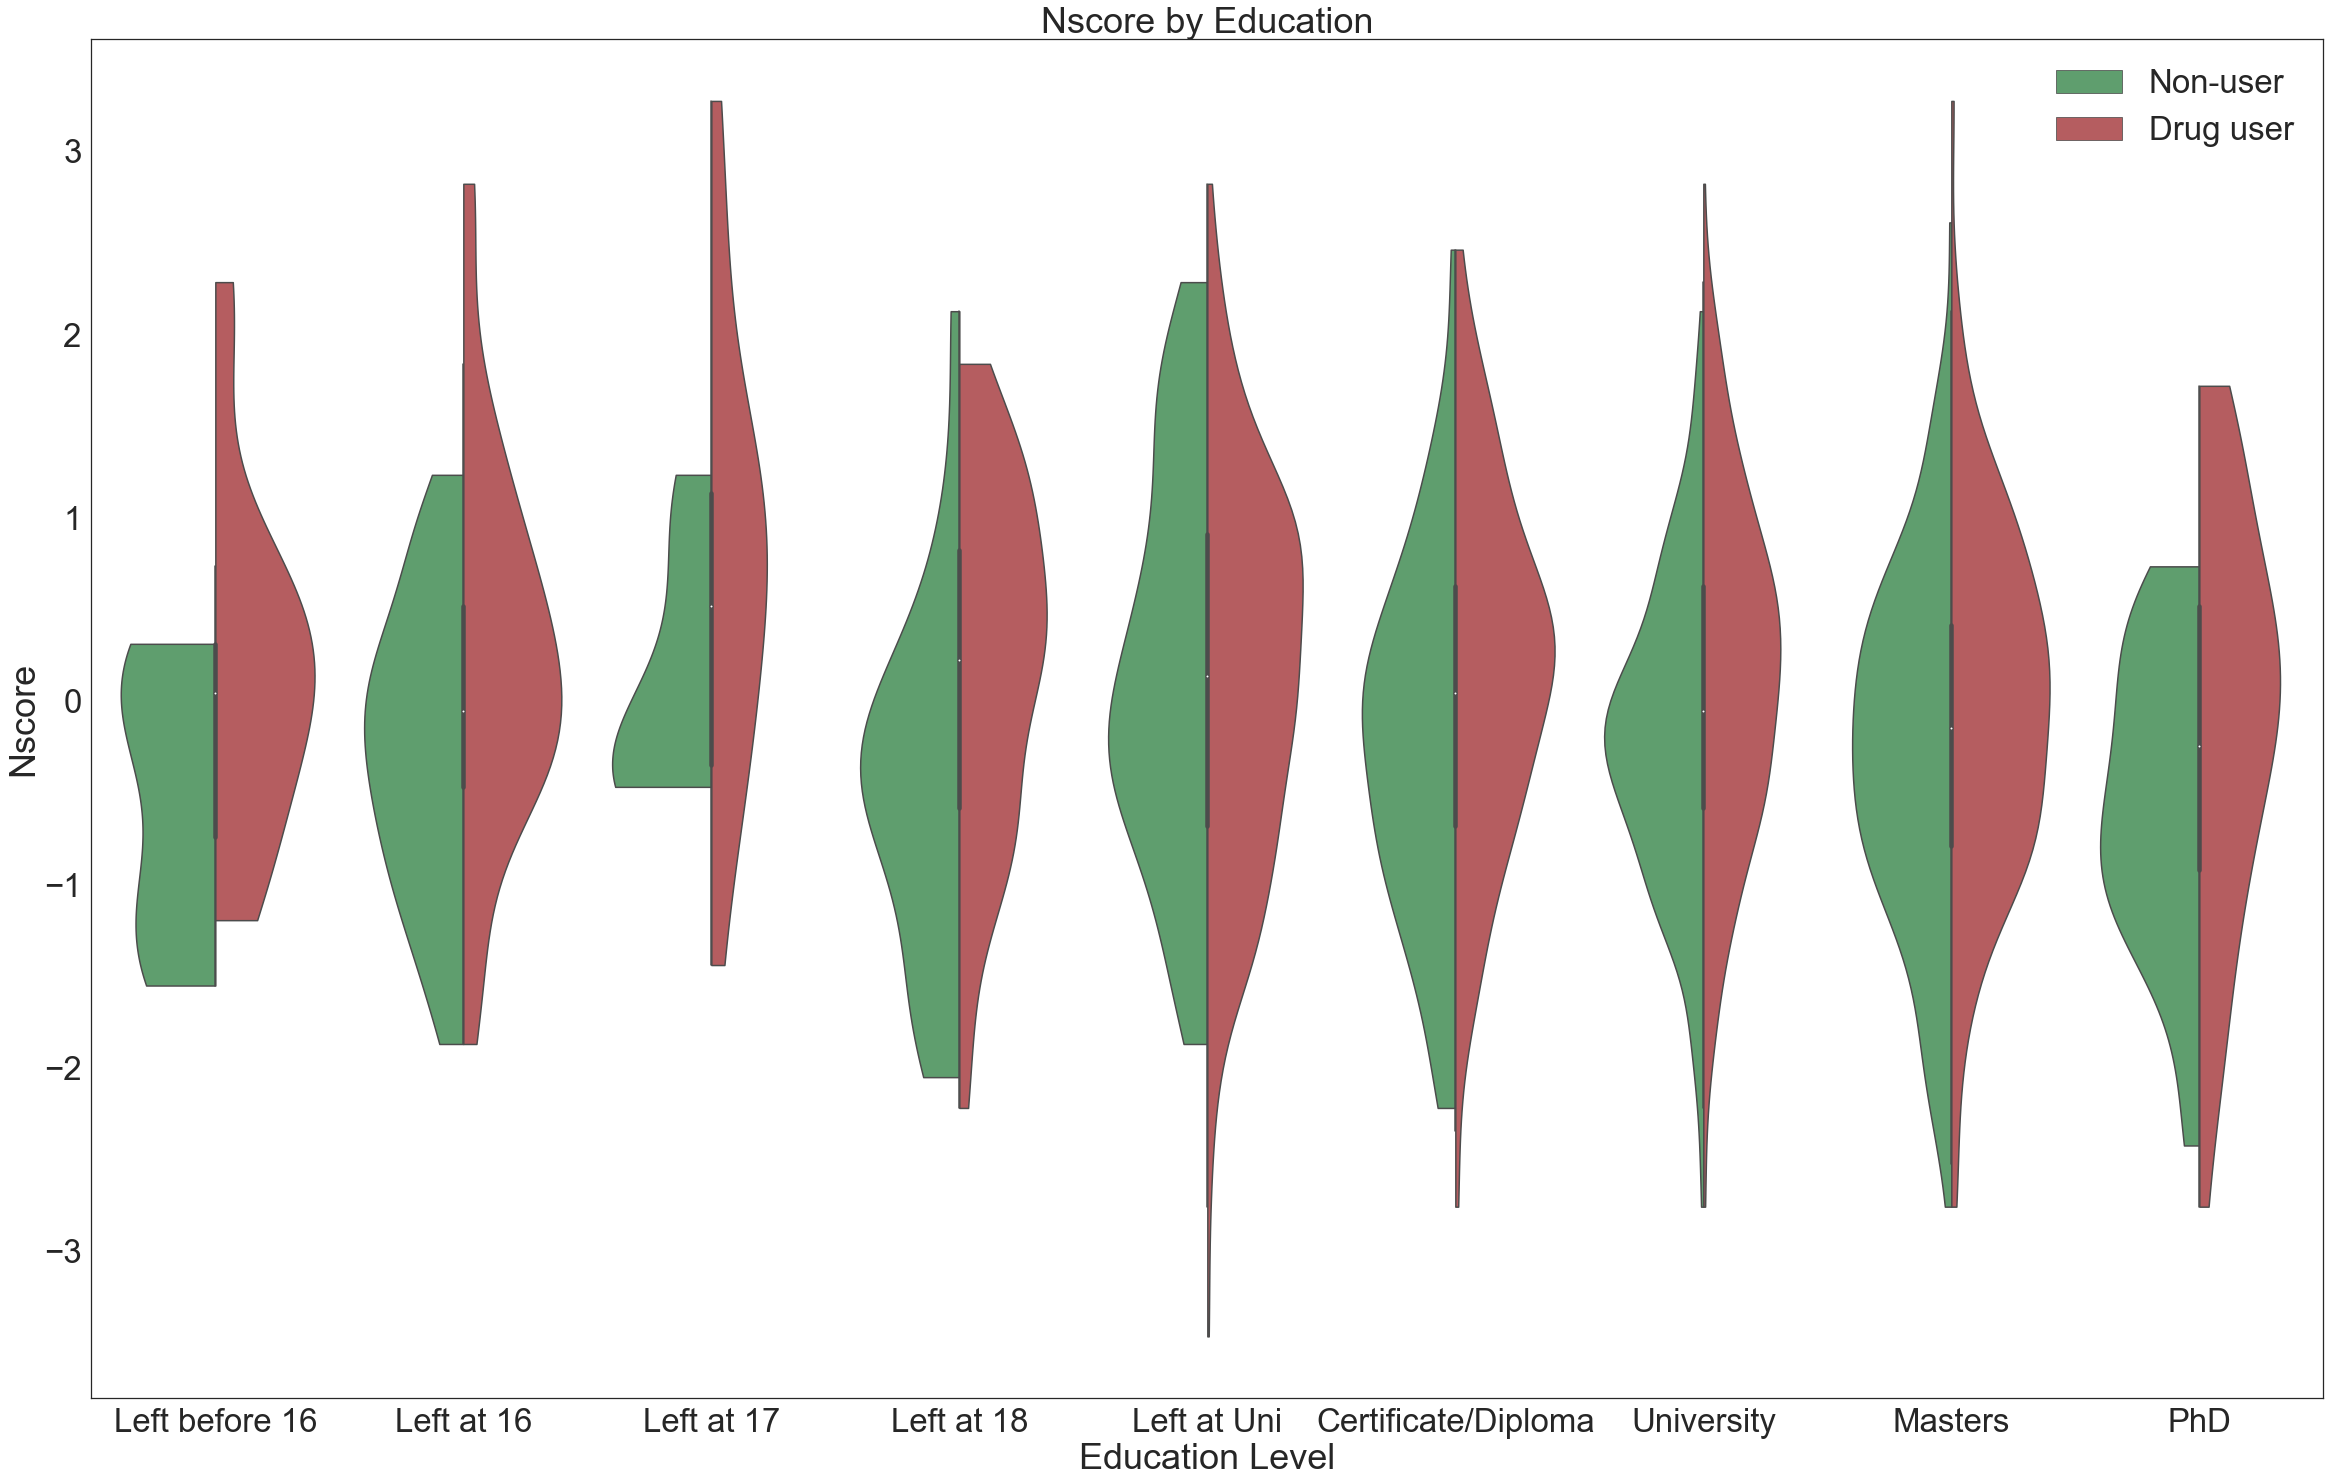

In [191]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Education", y="Nscore", data=df,hue='hard',split=True, legend=True, palette=["g","r"], cut=0)
g.set_xticklabels(education_lb)

g.set_ylabel("Nscore")
g.set_xlabel("Education Level")
g.set_title("Nscore by Education")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Nscore by education.png")
plt.show()

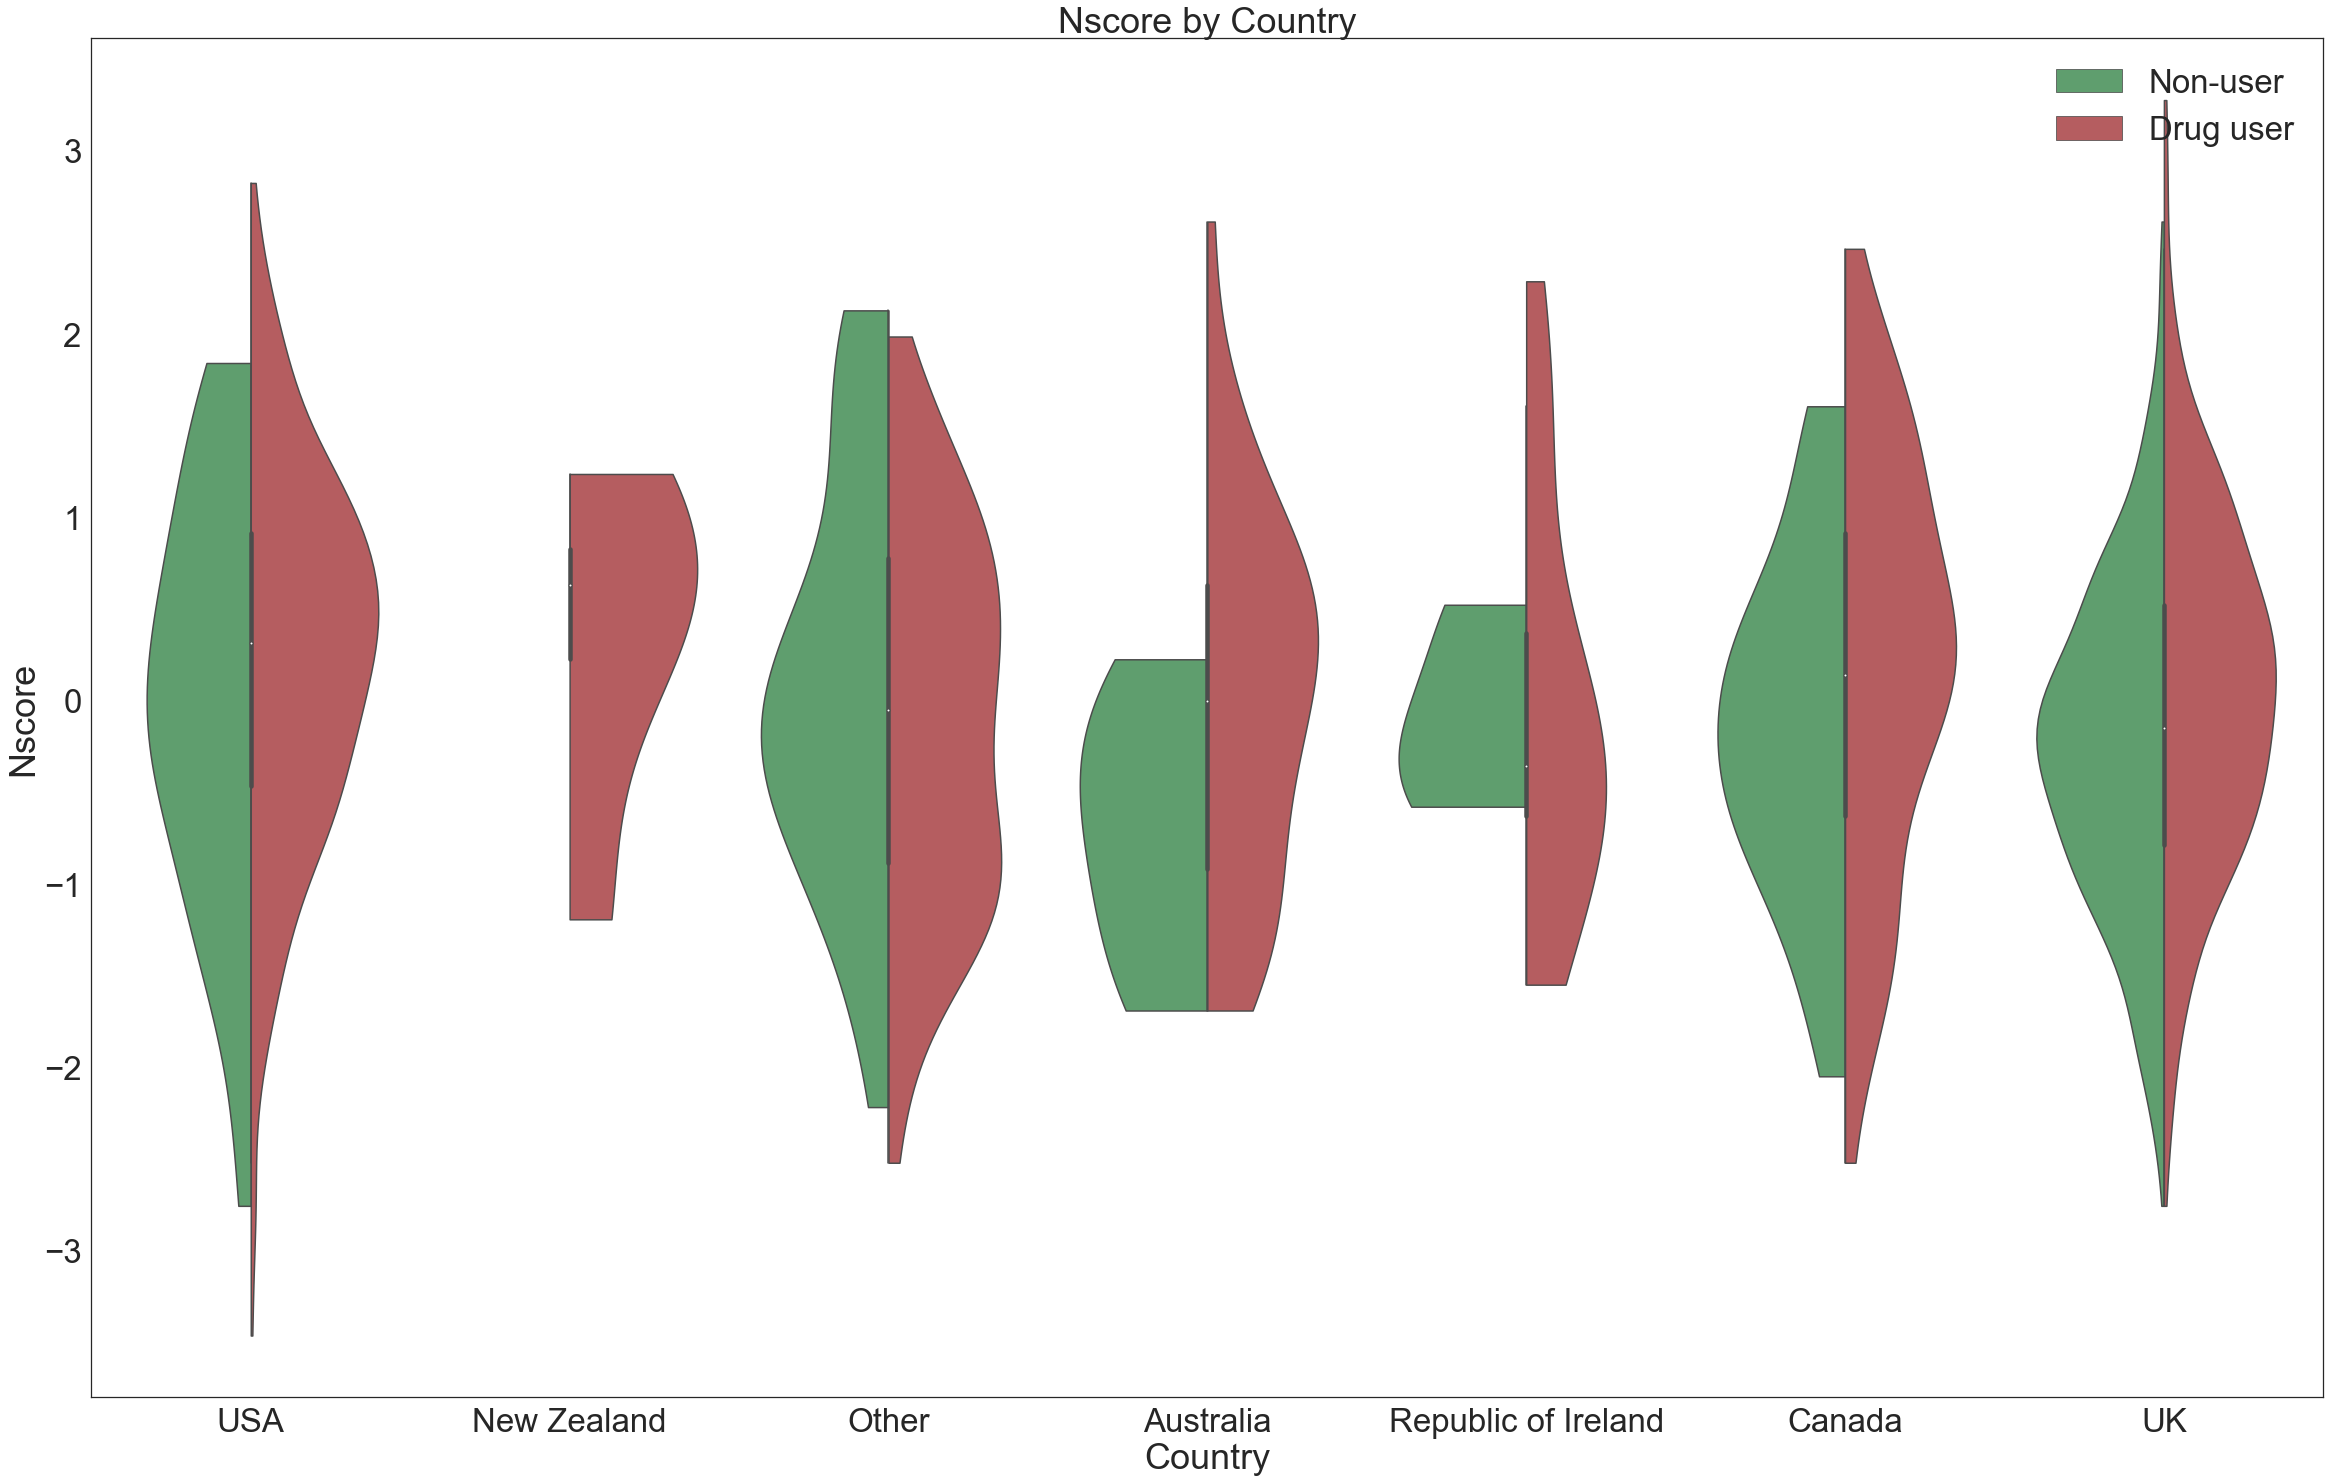

In [192]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Country", y="Nscore", data=df,hue='hard',split=True, legend=True, palette=["g","r"], cut=0)
g.set_xticklabels(country_lb)

g.set_ylabel("Nscore")
g.set_xlabel("Country")
g.set_title("Nscore by Country")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Nscore by country.png")
plt.show()

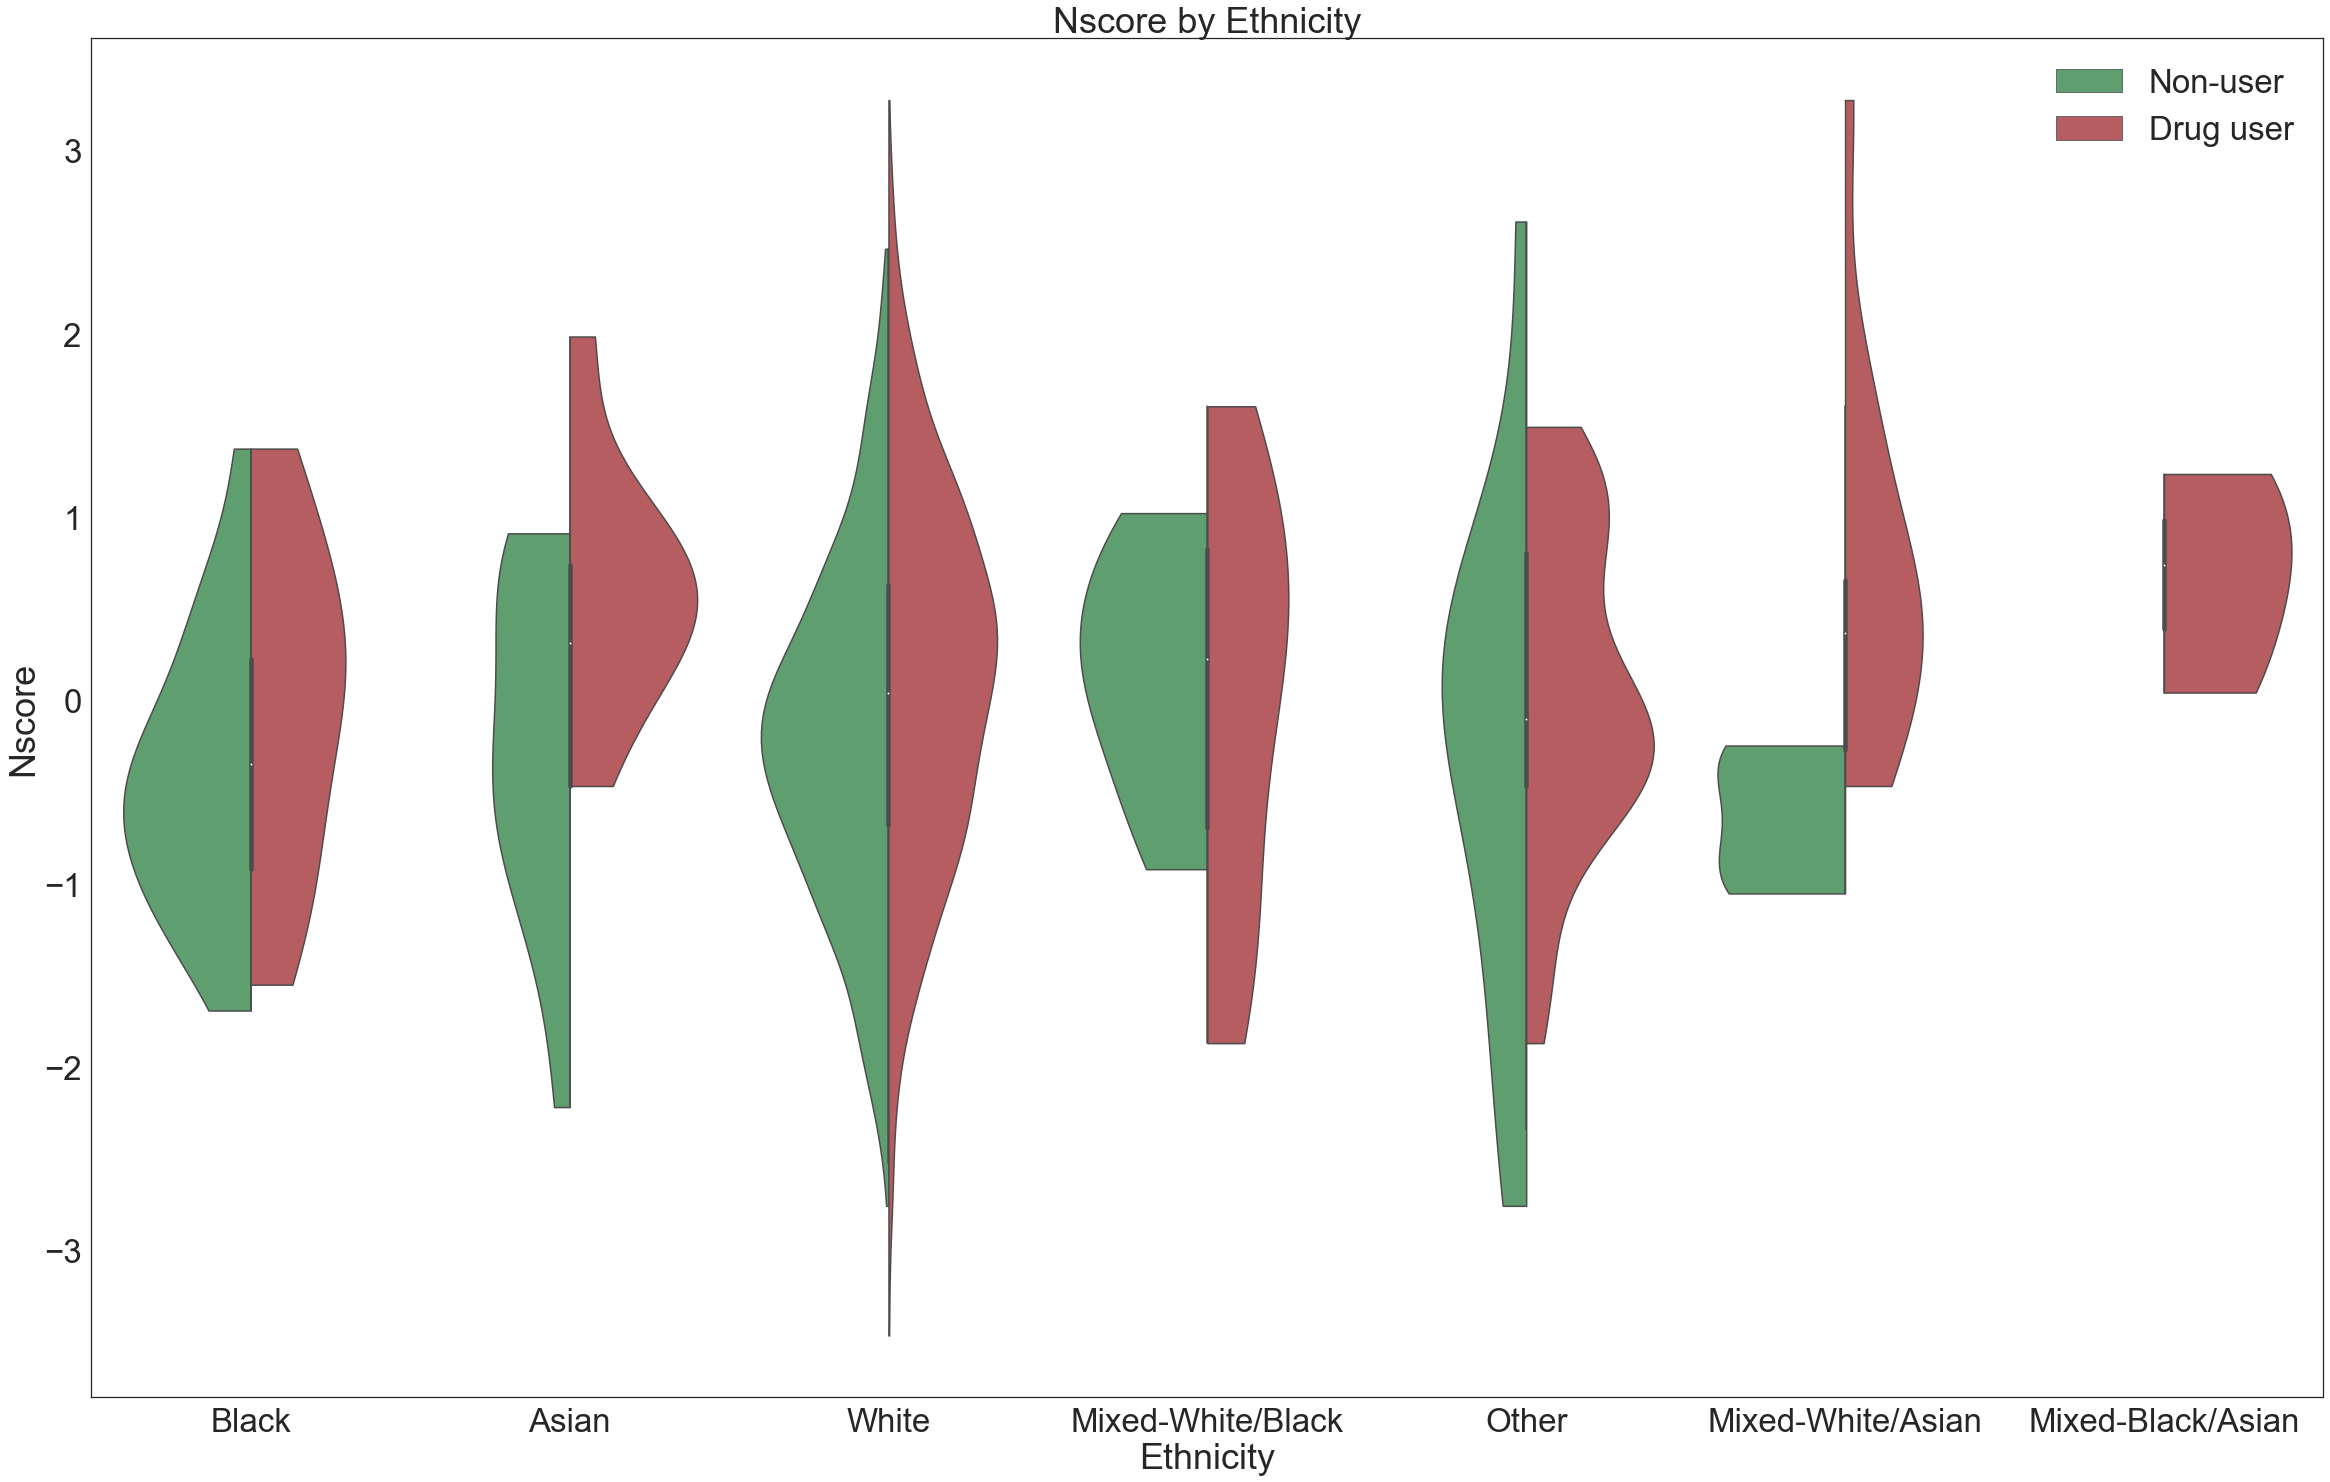

In [193]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Ethnicity", y="Nscore", data=df,hue='hard',split=True, legend=True, palette=["g","r"], cut=0)
g.set_xticklabels(ethnicity_lb)

g.set_ylabel("Nscore")
g.set_xlabel("Ethnicity")
g.set_title("Nscore by Ethnicity")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Nscore by ethnicity.png")
plt.show()

### EScore by User

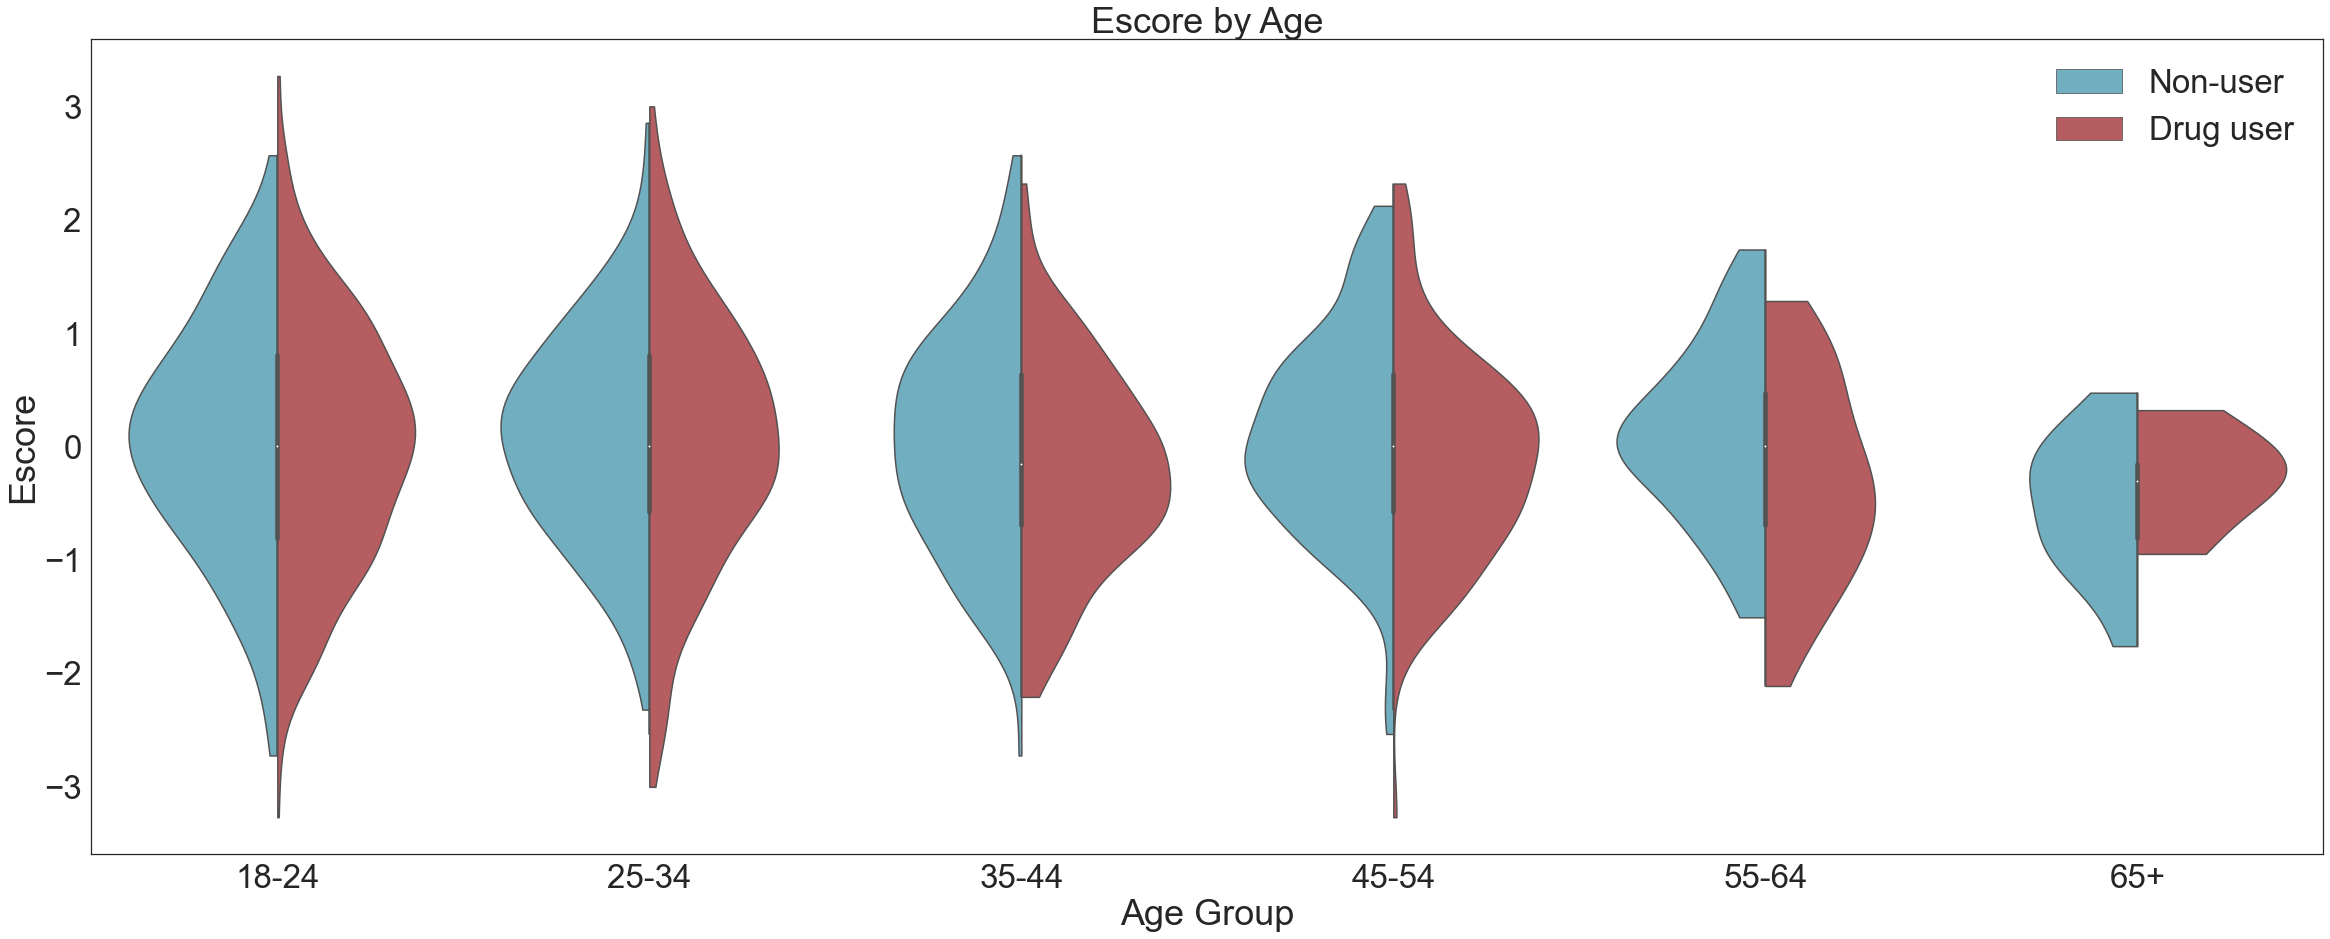

In [209]:
f, ax = plt.subplots(figsize=(40, 15))

g=sns.violinplot(x="Age", y="Escore", data=df,hue='hard',split=True, legend=True, palette=["c","r"], cut=0)
g.set_xticklabels(age_lb)

g.set_ylabel("Escore")
g.set_xlabel("Age Group")
g.set_title("Escore by Age")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin EScore by age.png")
plt.show()

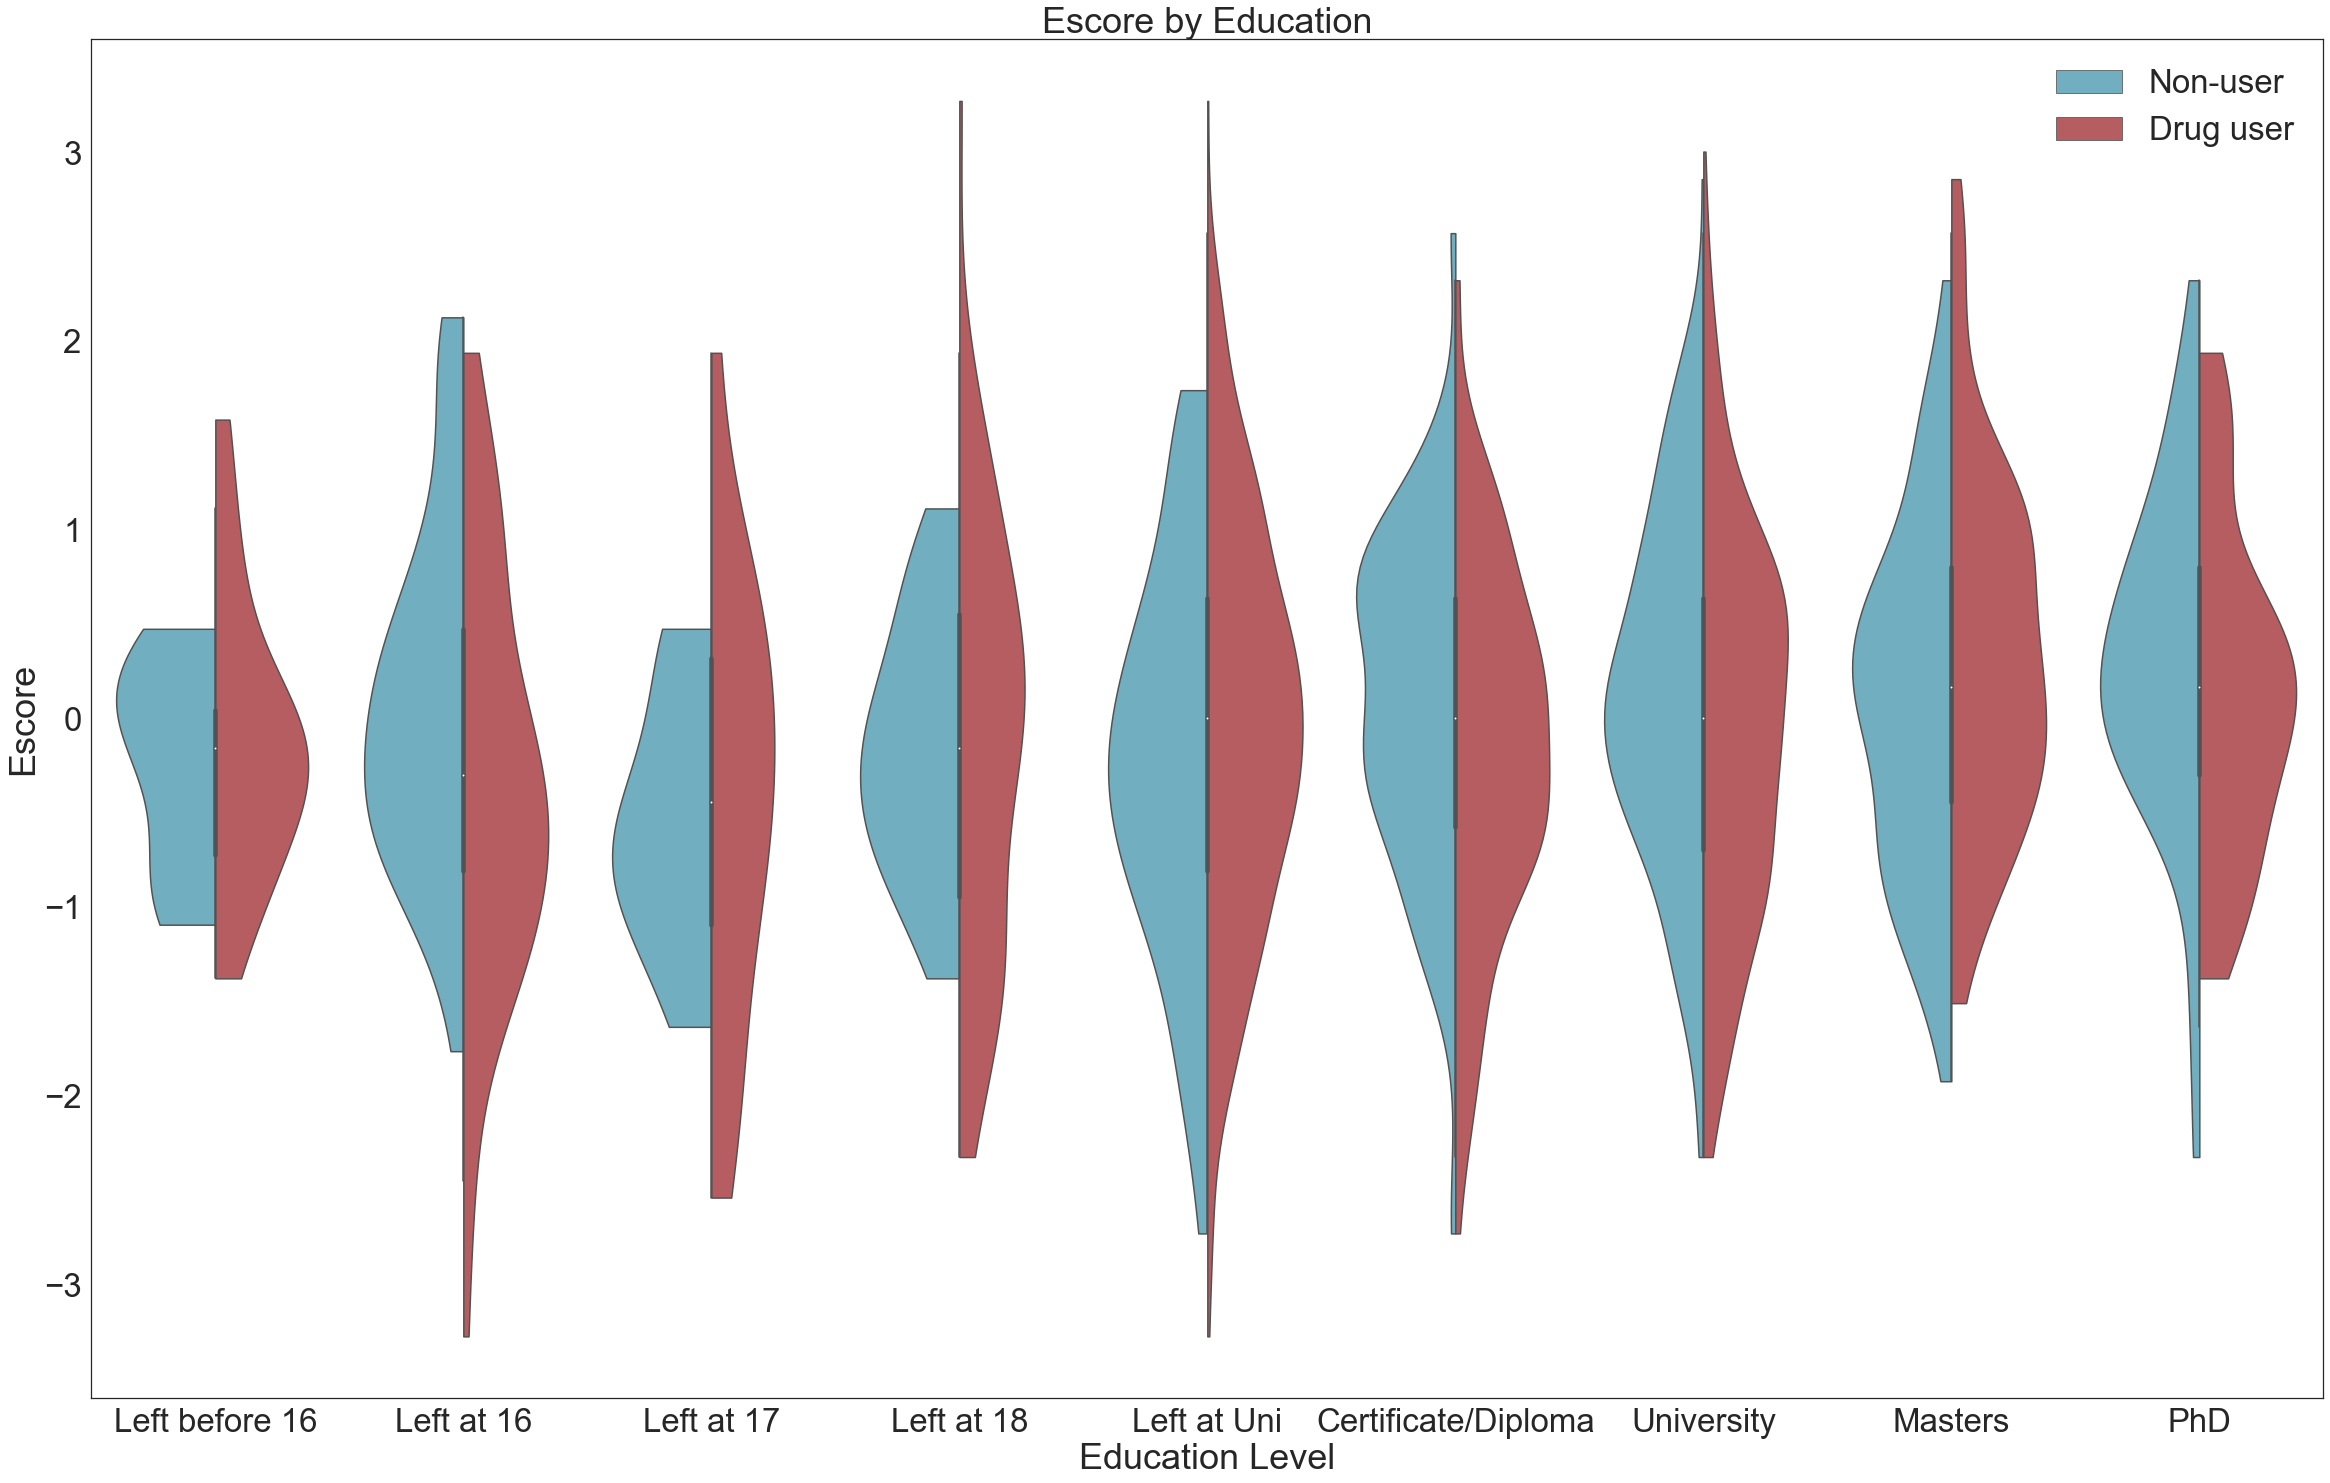

In [269]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Education", y="Escore", data=df,hue='hard',split=True, legend=True, palette=["c","r"], cut=0)
g.set_xticklabels(education_lb)

g.set_ylabel("Escore")
g.set_xlabel("Education Level")
g.set_title("Escore by Education")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Escore by education.png")
plt.show()

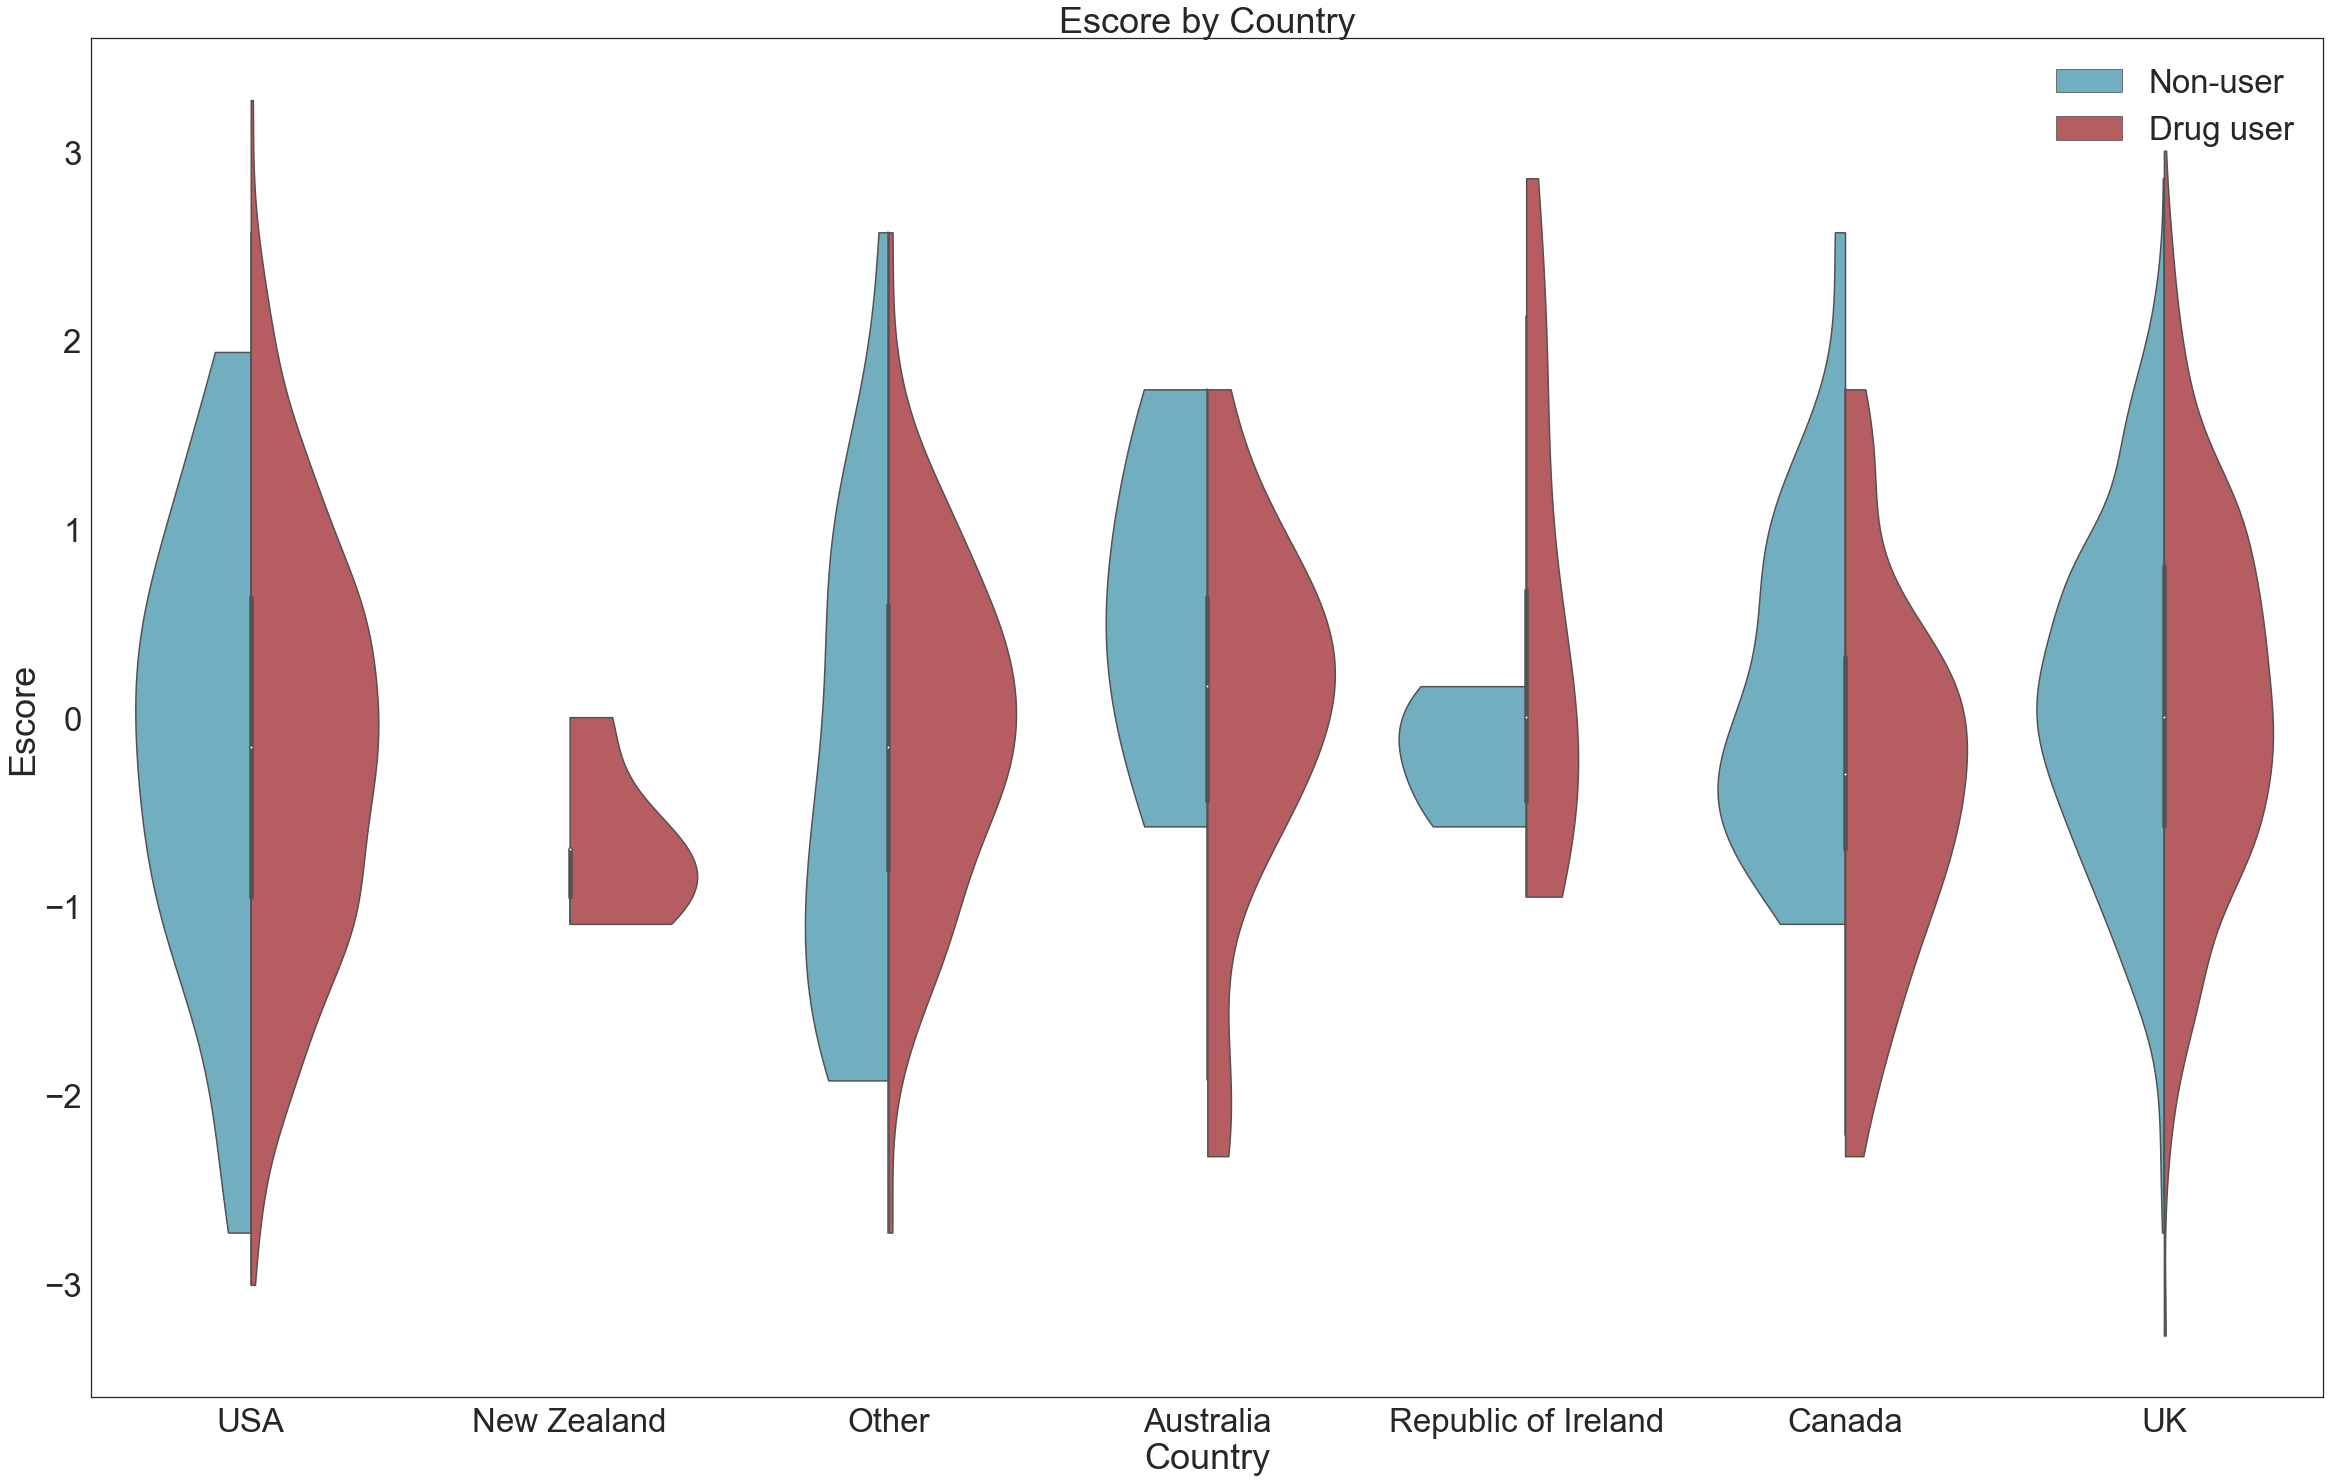

In [210]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Country", y="Escore", data=df,hue='hard',split=True, legend=True, palette=["c","r"], cut=0)
g.set_xticklabels(country_lb)

g.set_ylabel("Escore")
g.set_xlabel("Country")
g.set_title("Escore by Country")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Escore by country.png")
plt.show()

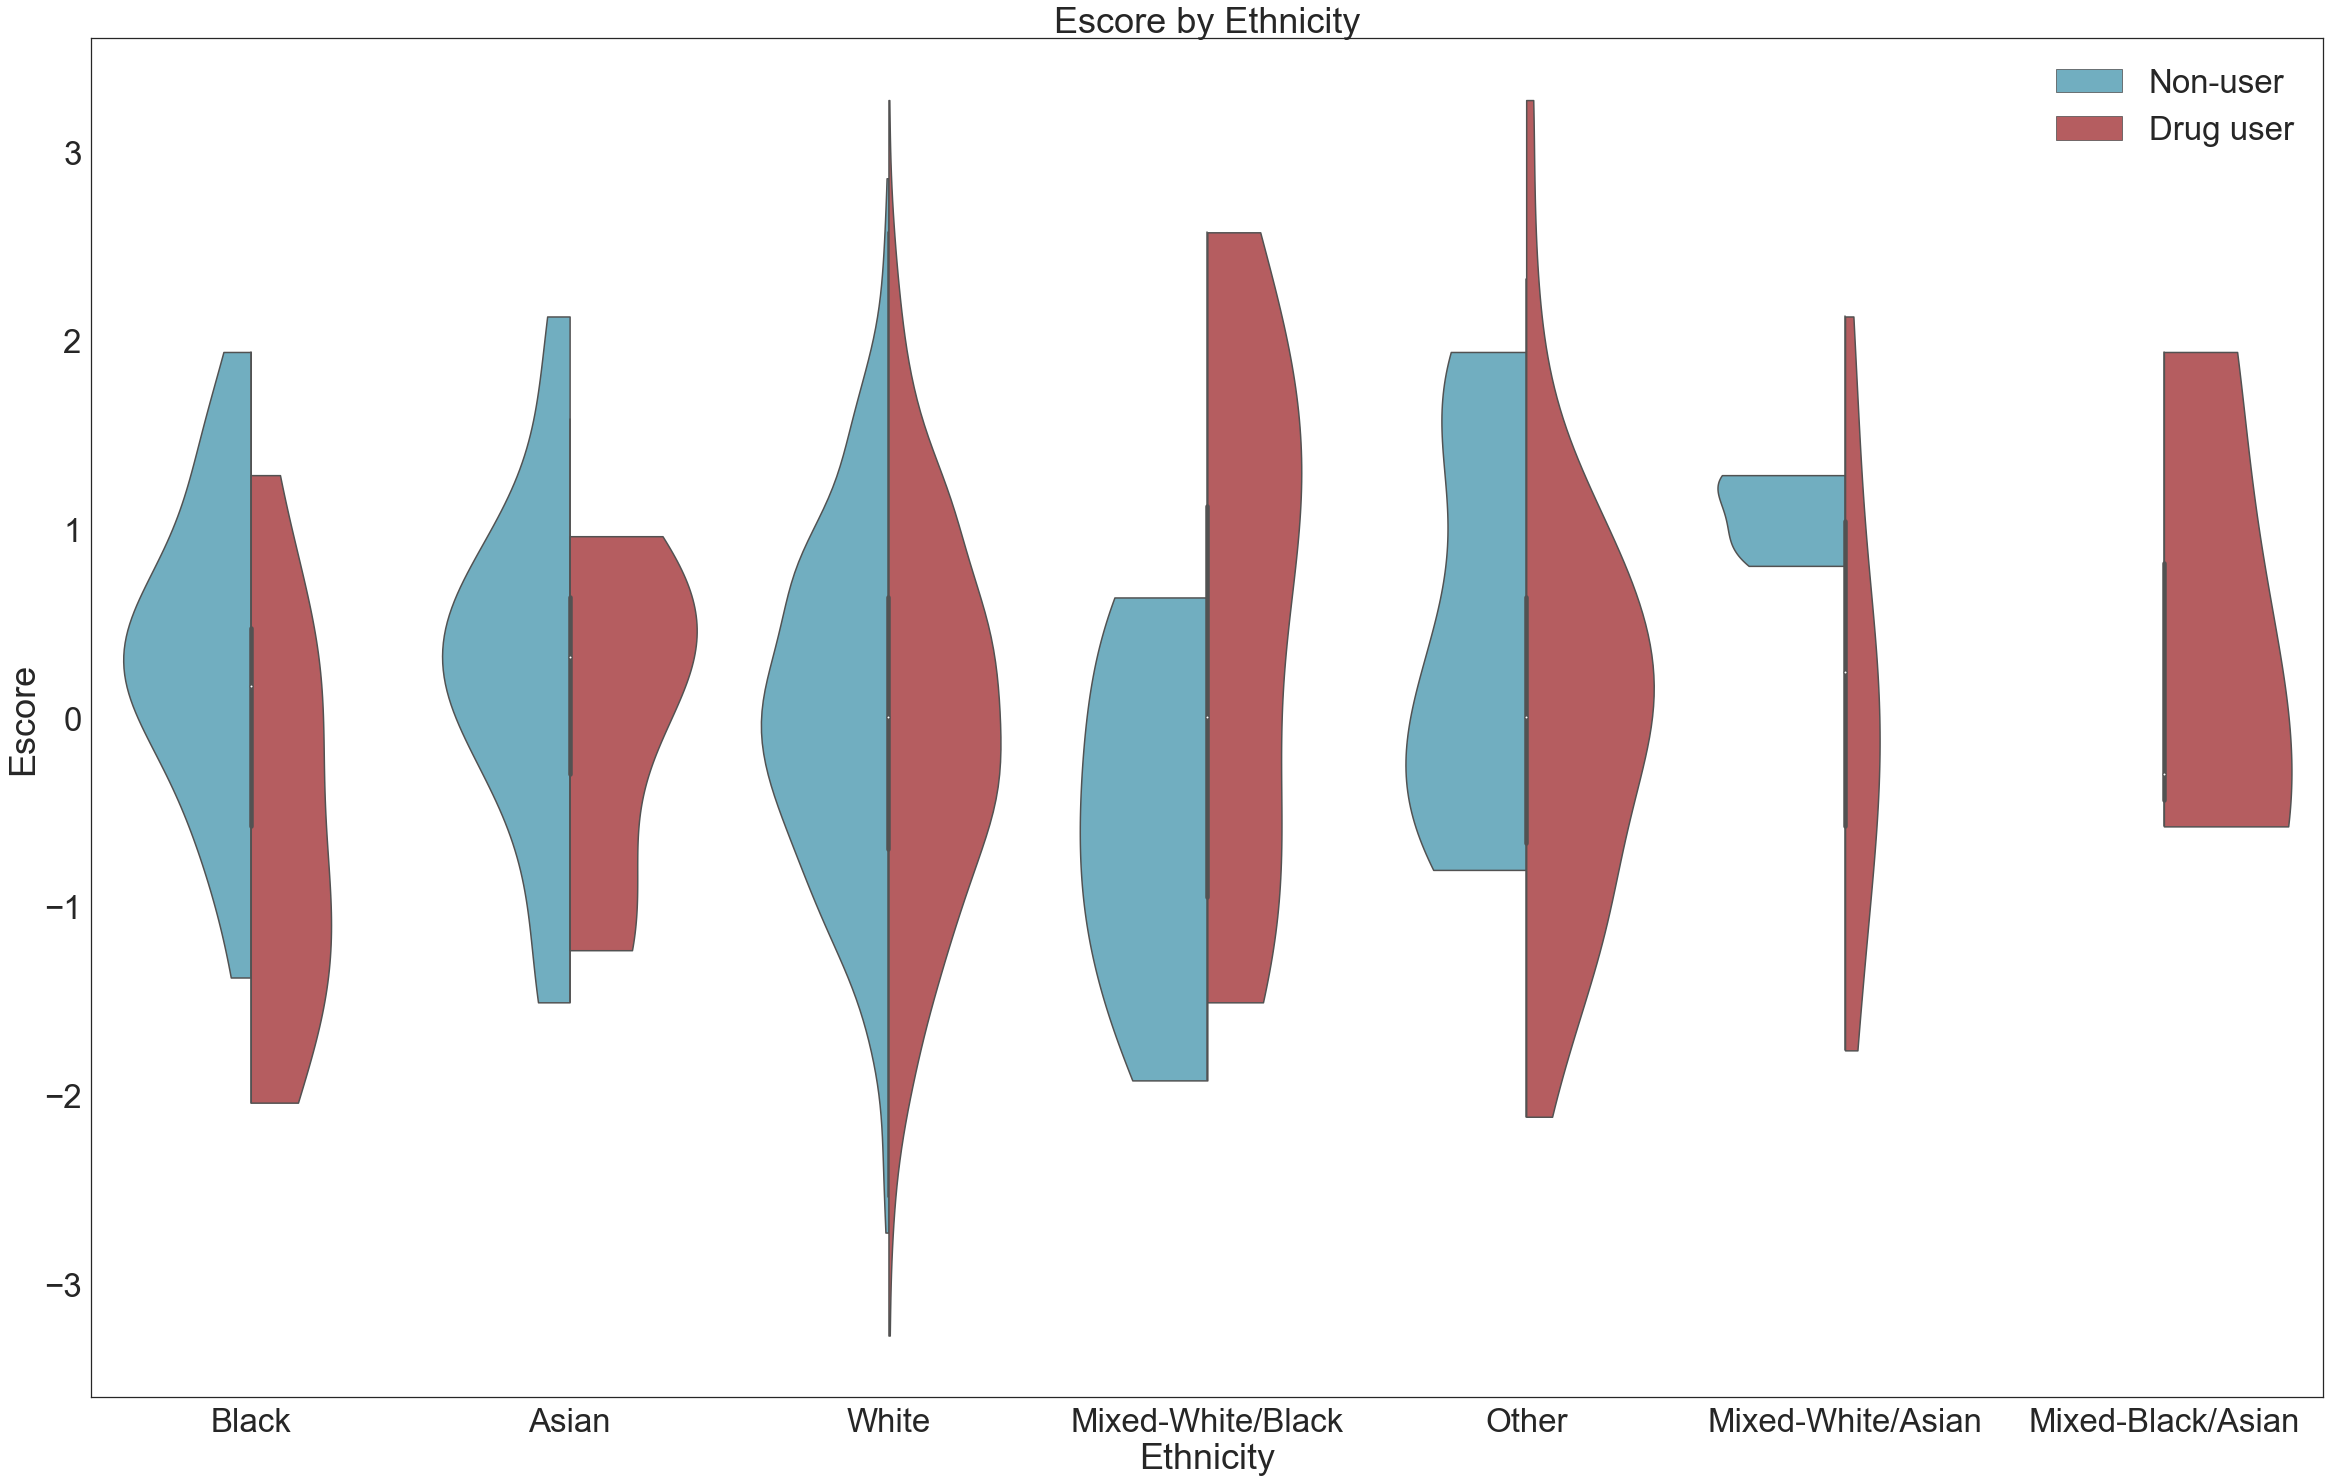

In [211]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Ethnicity", y="Escore", data=df,hue='hard',split=True, legend=True, palette=["c","r"], cut=0)
g.set_xticklabels(ethnicity_lb)

g.set_ylabel("Escore")
g.set_xlabel("Ethnicity")
g.set_title("Escore by Ethnicity")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Escore by ethnicity.png")
plt.show()

### OScore by User

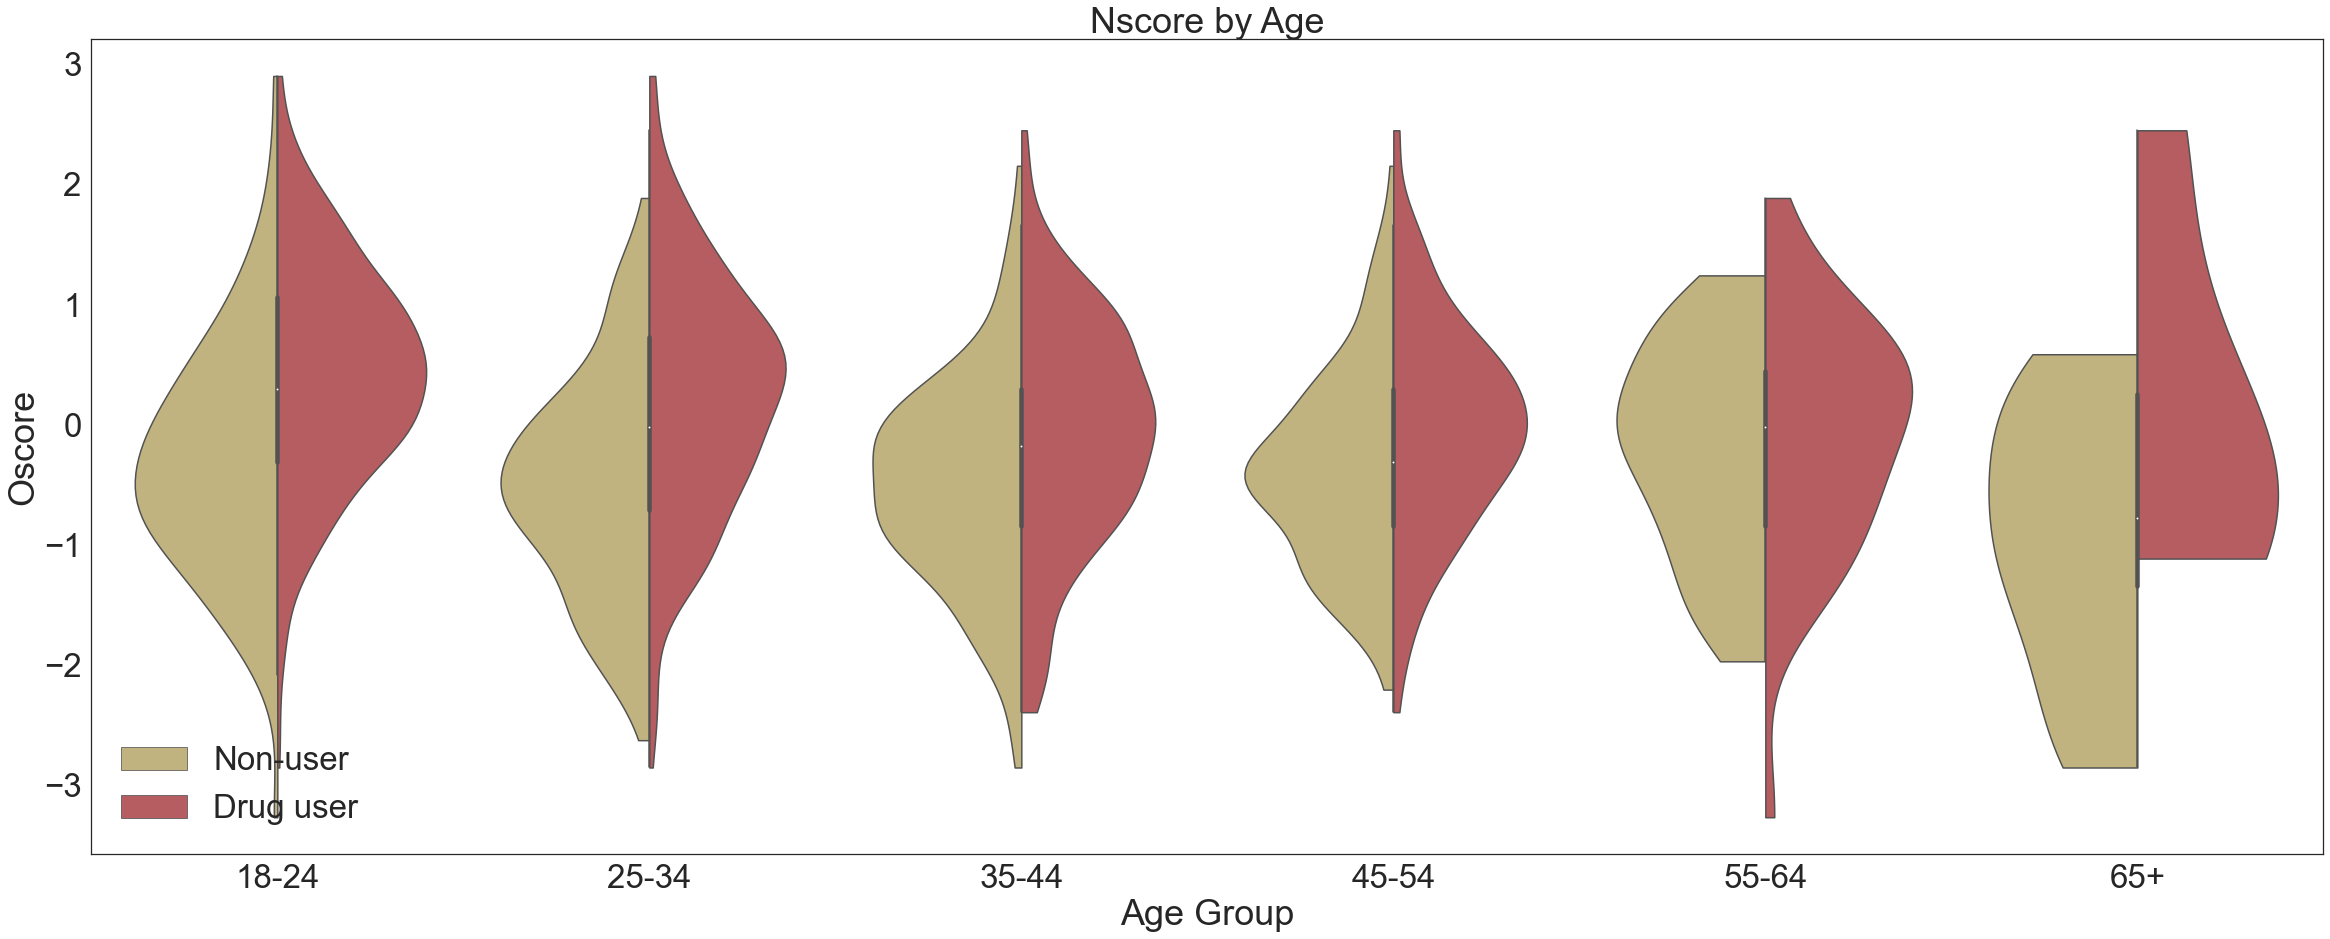

In [270]:
f, ax = plt.subplots(figsize=(40, 15))

g=sns.violinplot(x="Age", y="Oscore", data=df,hue='hard',split=True, legend=True, palette=["y","r"], cut=0)
g.set_xticklabels(age_lb)

g.set_ylabel("Oscore")
g.set_xlabel("Age Group")
g.set_title("Nscore by Age")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin OScore by age.png")
plt.show()

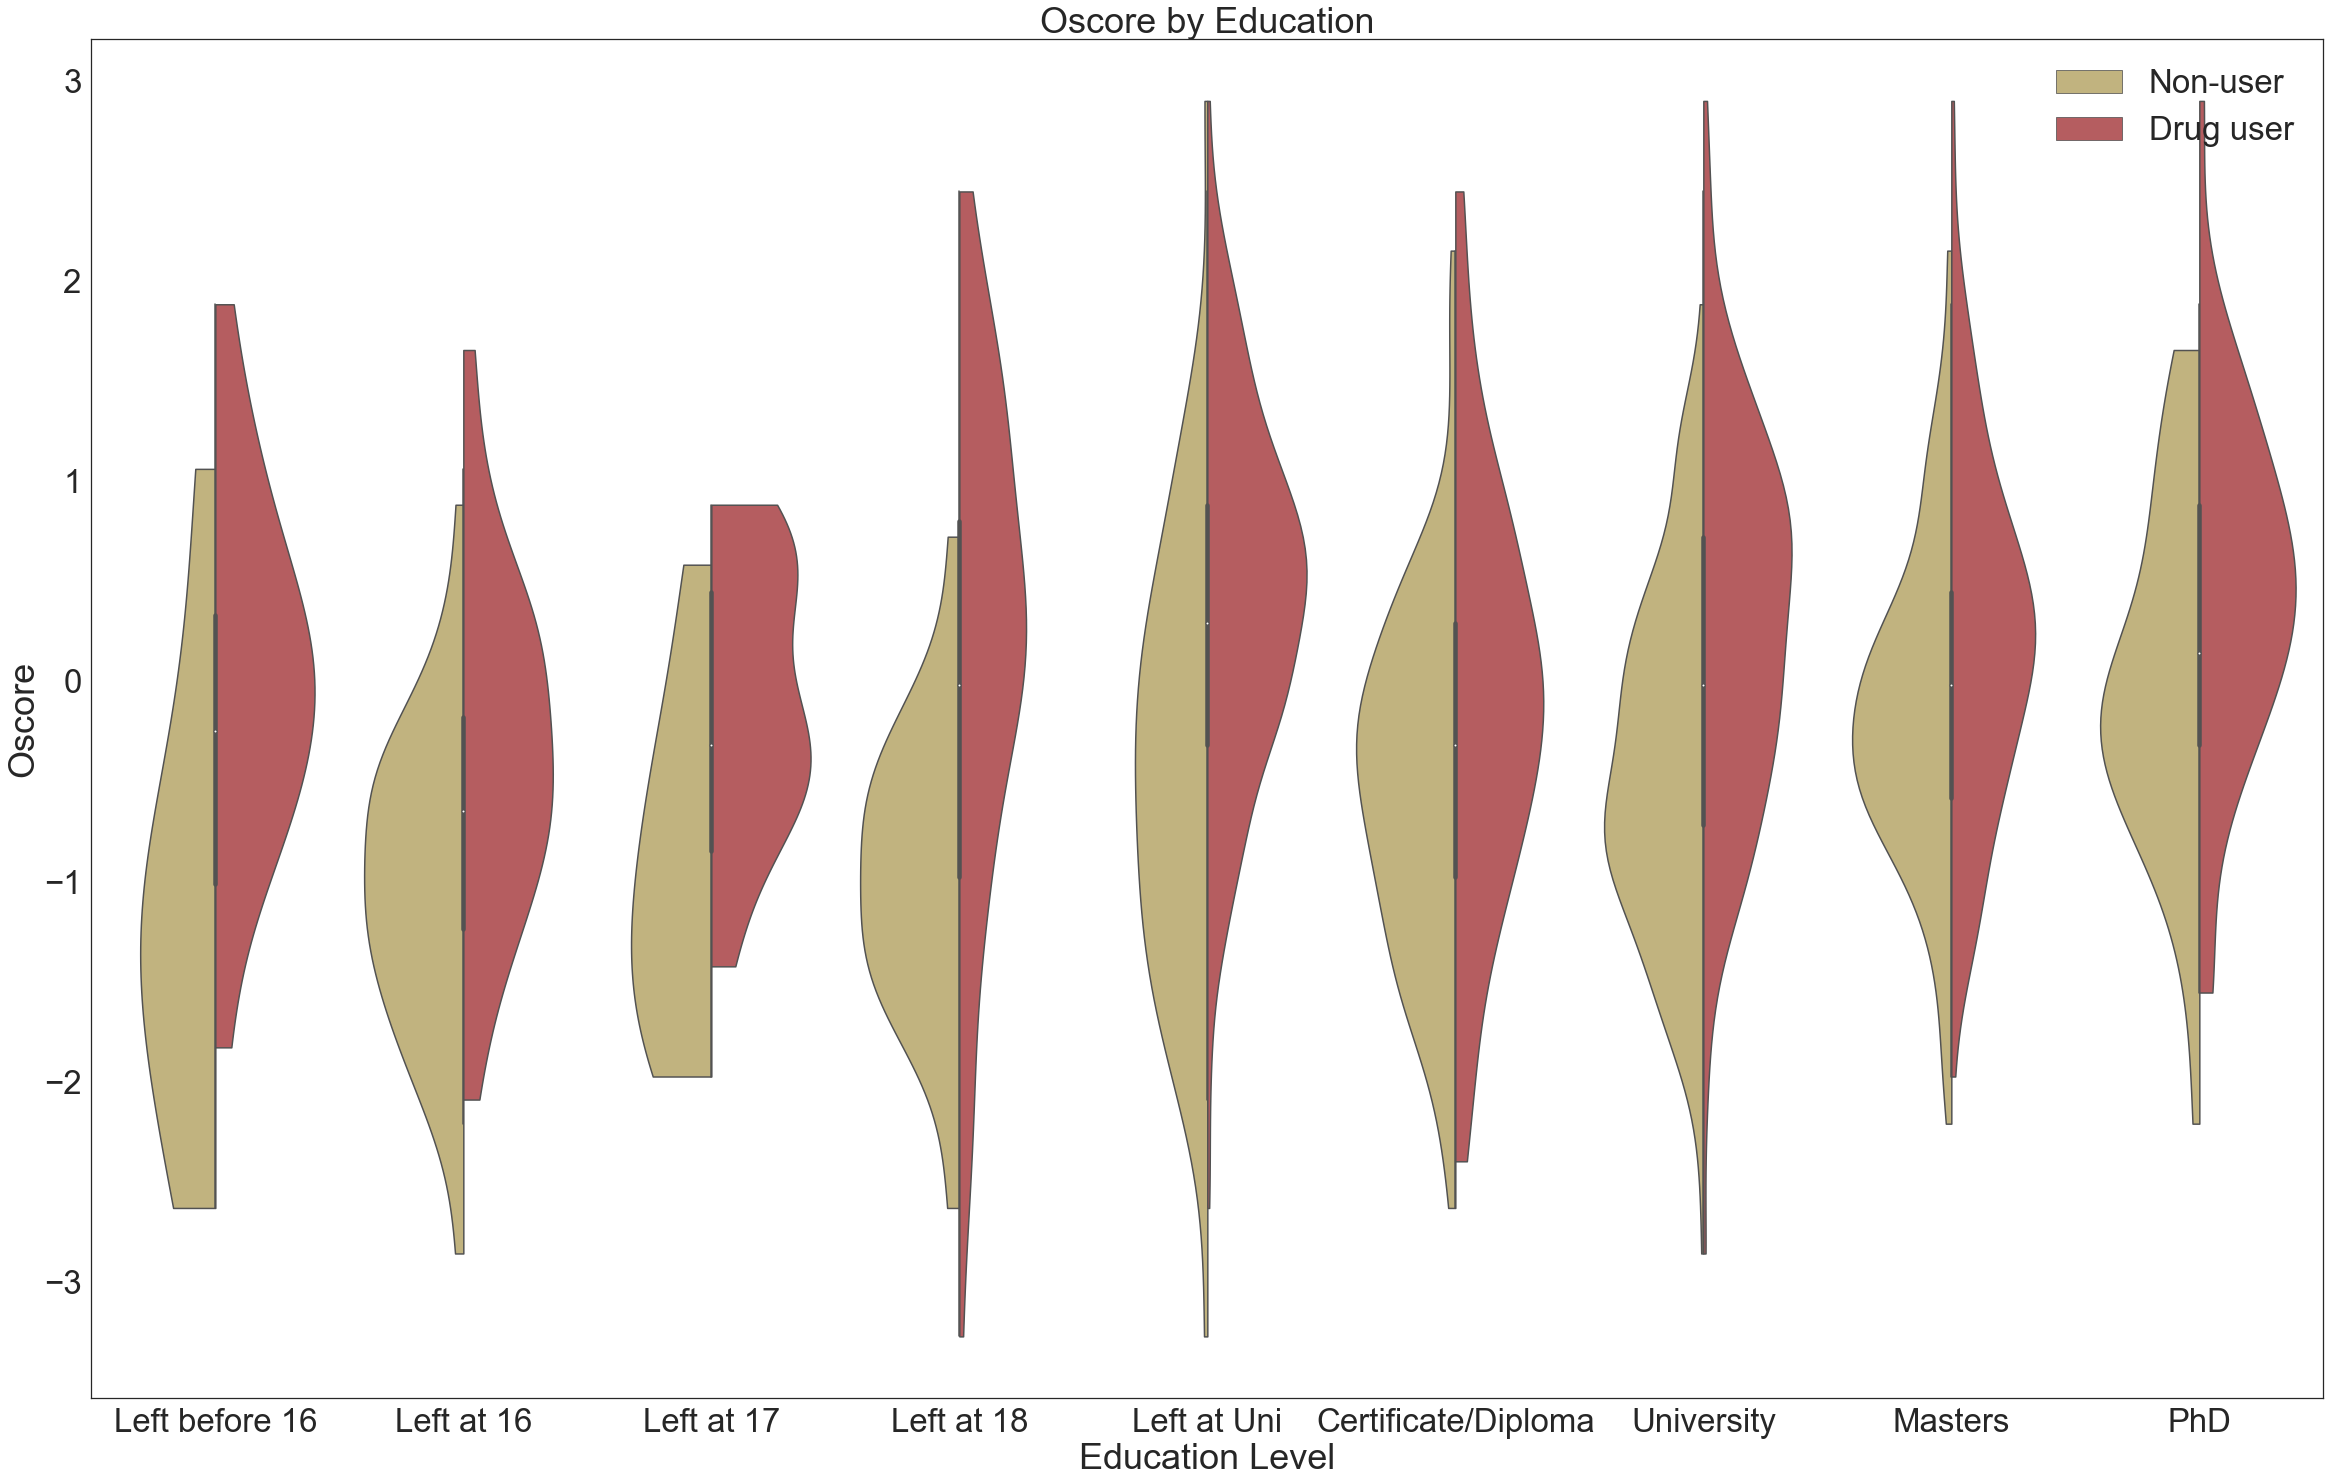

In [205]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Education", y="Oscore", data=df,hue='hard',split=True, legend=True, palette=["y","r"], cut=0)
g.set_xticklabels(education_lb)

g.set_ylabel("Oscore")
g.set_xlabel("Education Level")
g.set_title("Oscore by Education")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Nscore by education.png")
plt.show()

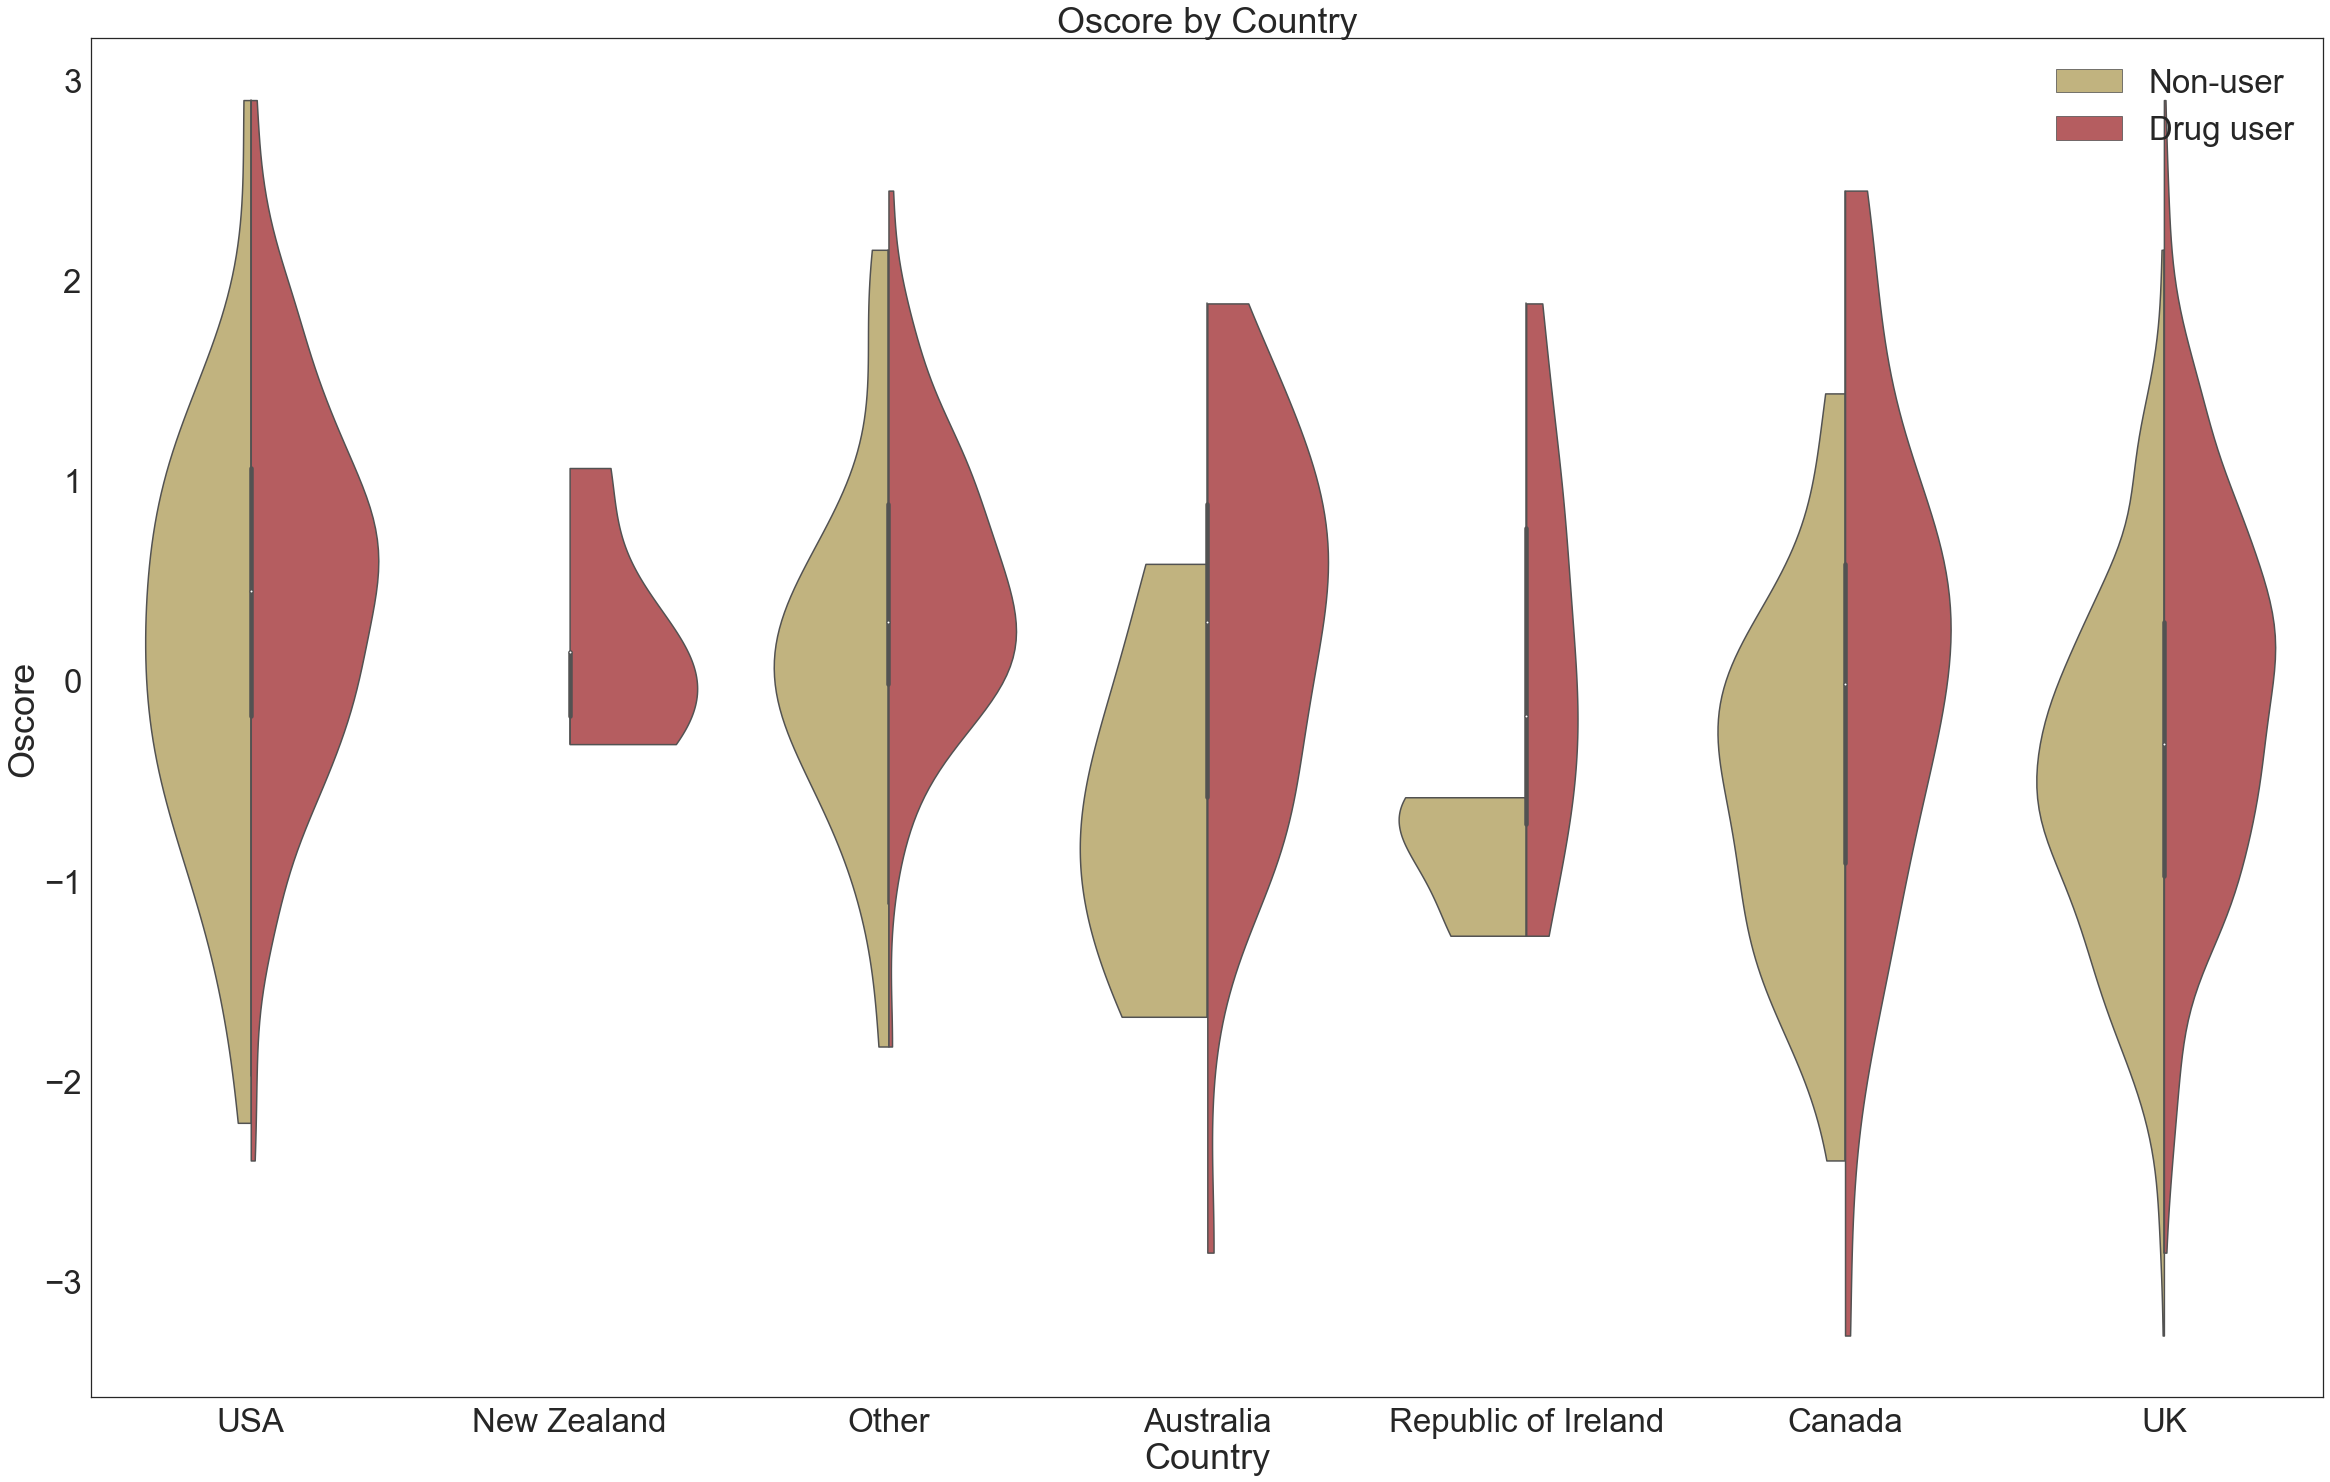

In [206]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Country", y="Oscore", data=df,hue='hard',split=True, legend=True, palette=["y","r"], cut=0)
g.set_xticklabels(country_lb)

g.set_ylabel("Oscore")
g.set_xlabel("Country")
g.set_title("Oscore by Country")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Oscore by country.png")
plt.show()

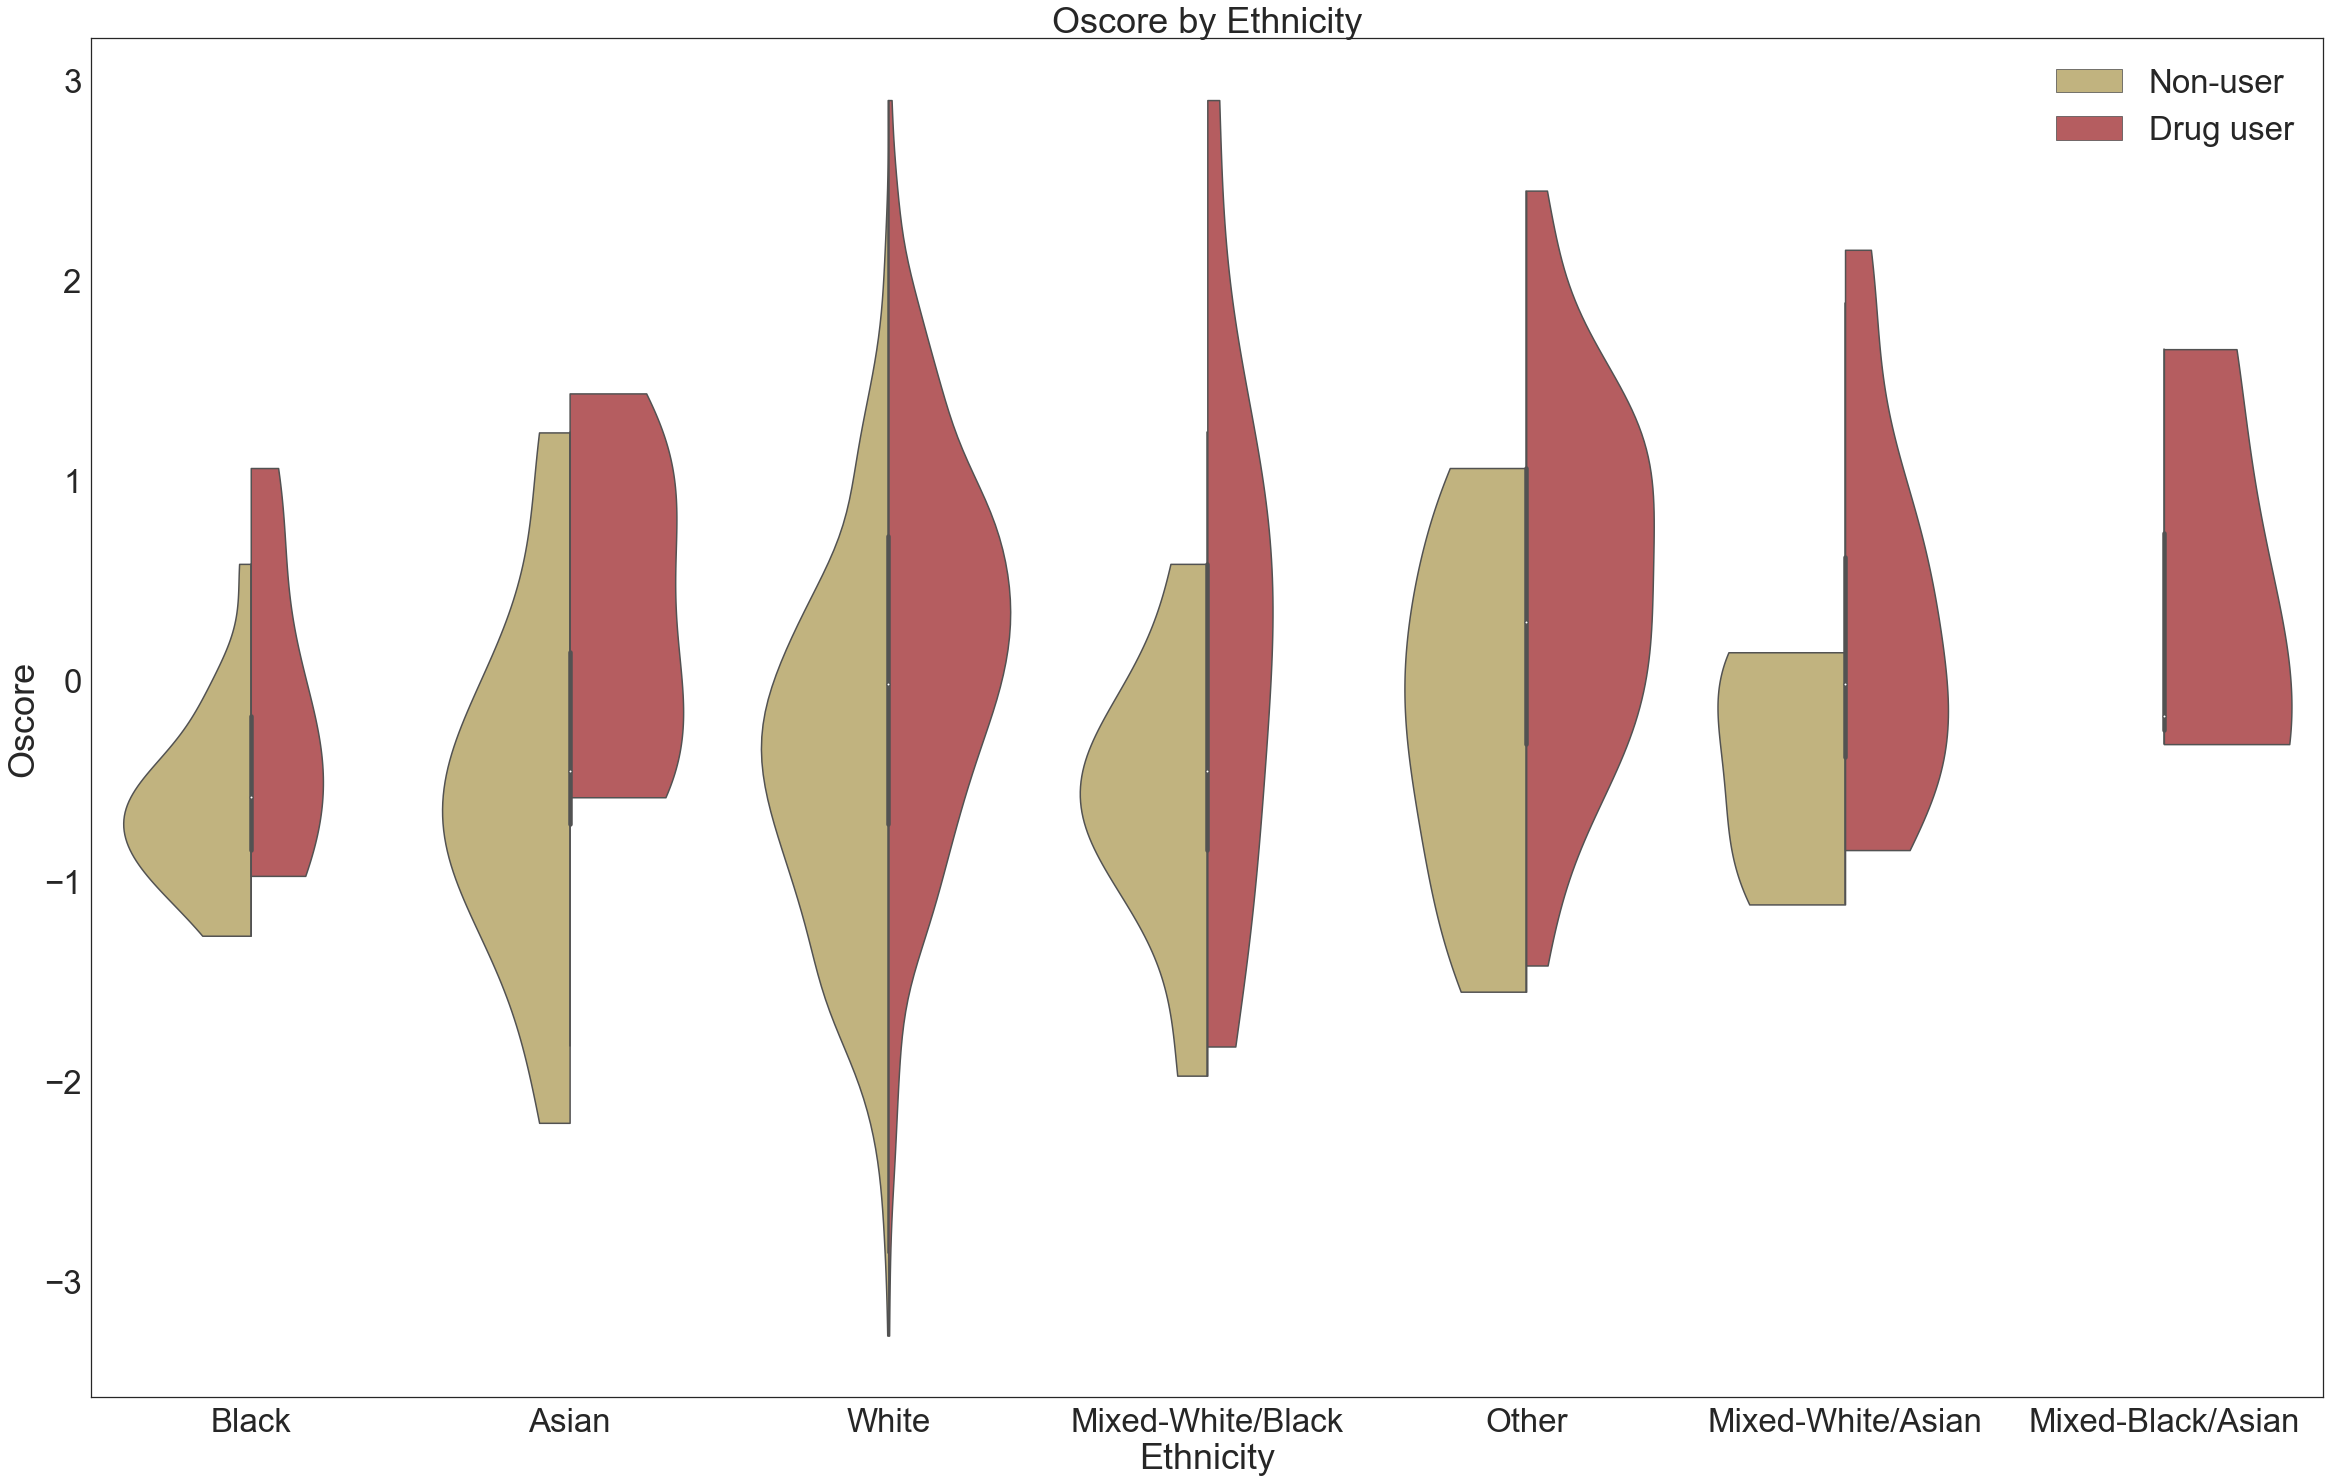

In [207]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Ethnicity", y="Oscore", data=df,hue='hard',split=True, legend=True, palette=["y","r"], cut=0)
g.set_xticklabels(ethnicity_lb)

g.set_ylabel("Oscore")
g.set_xlabel("Ethnicity")
g.set_title("Oscore by Ethnicity")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Oscore by ethnicity.png")
plt.show()

### AScore by User

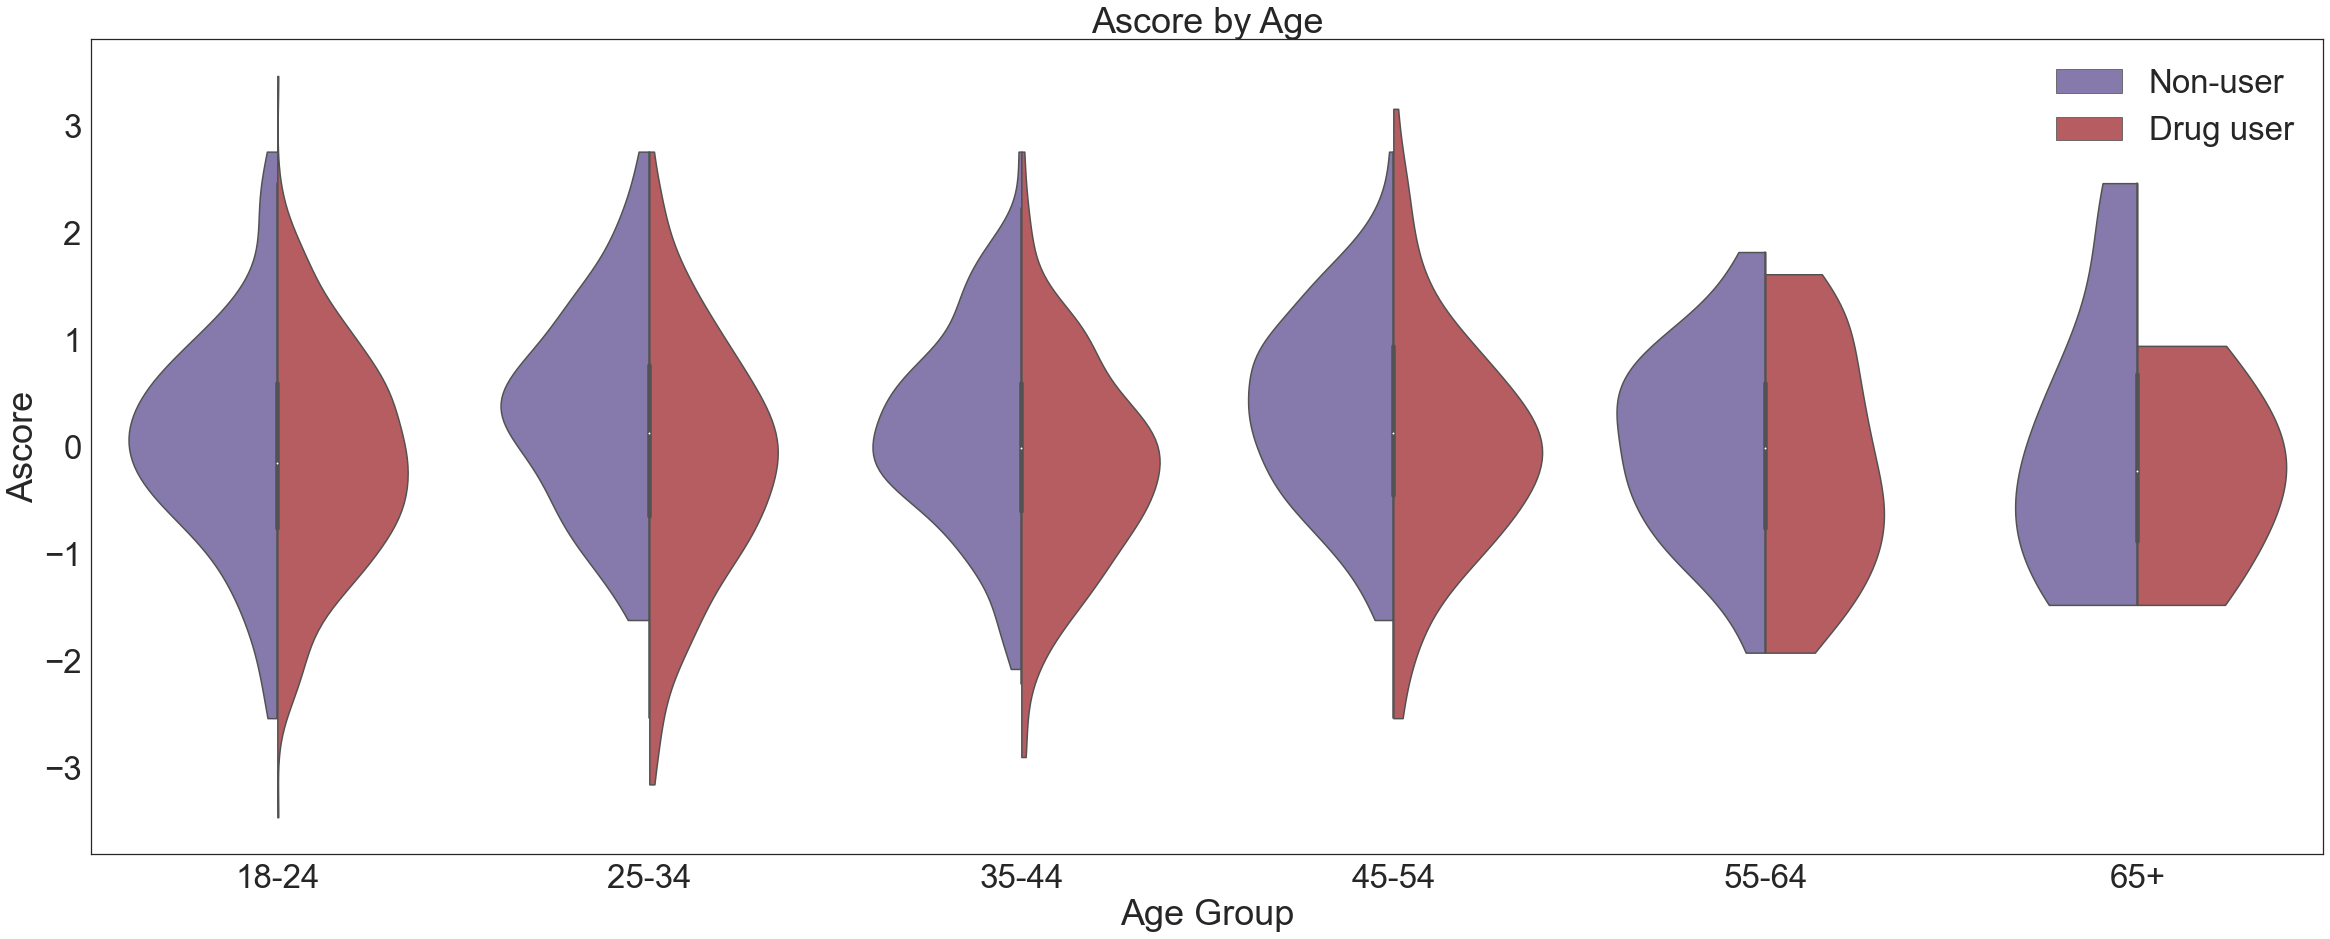

In [271]:
f, ax = plt.subplots(figsize=(40, 15))

g=sns.violinplot(x="Age", y="Ascore", data=df,hue='hard',split=True, legend=True, palette=["m","r"], cut=0)
g.set_xticklabels(age_lb)

g.set_ylabel("Ascore")
g.set_xlabel("Age Group")
g.set_title("Ascore by Age")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin AScore by age.png")
plt.show()

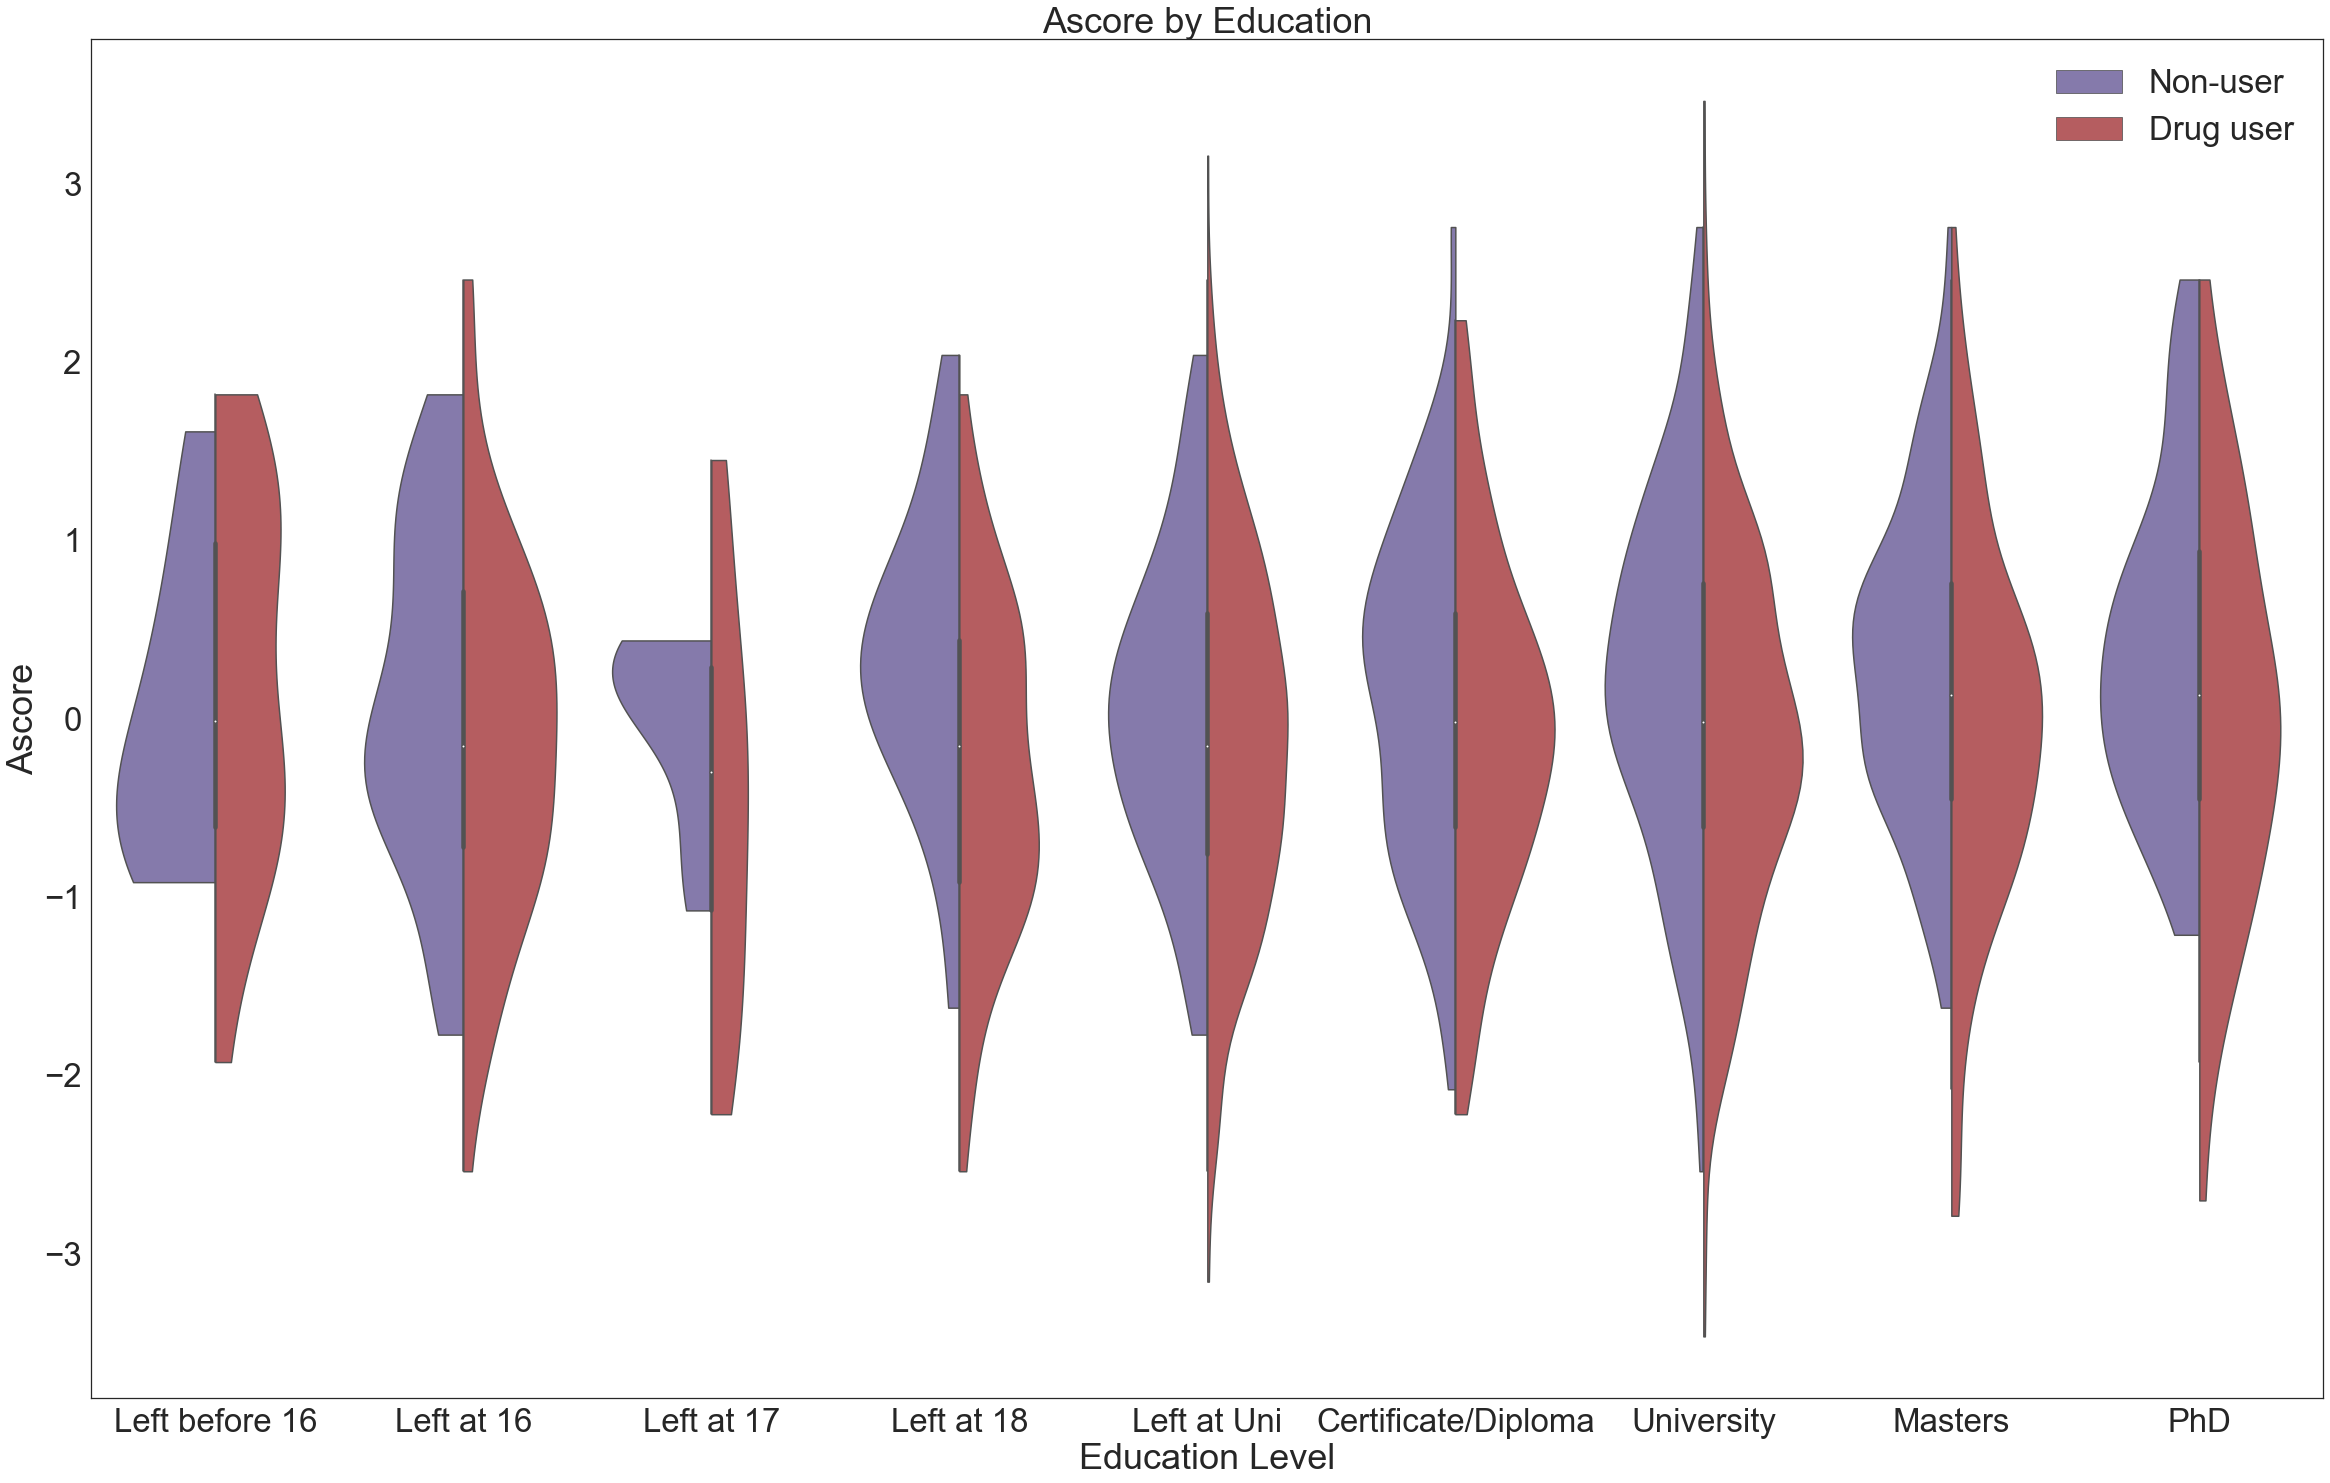

In [272]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Education", y="Ascore", data=df,hue='hard',split=True, legend=True, palette=["m","r"], cut=0)
g.set_xticklabels(education_lb)

g.set_ylabel("Ascore")
g.set_xlabel("Education Level")
g.set_title("Ascore by Education")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Ascore by education.png")
plt.show()

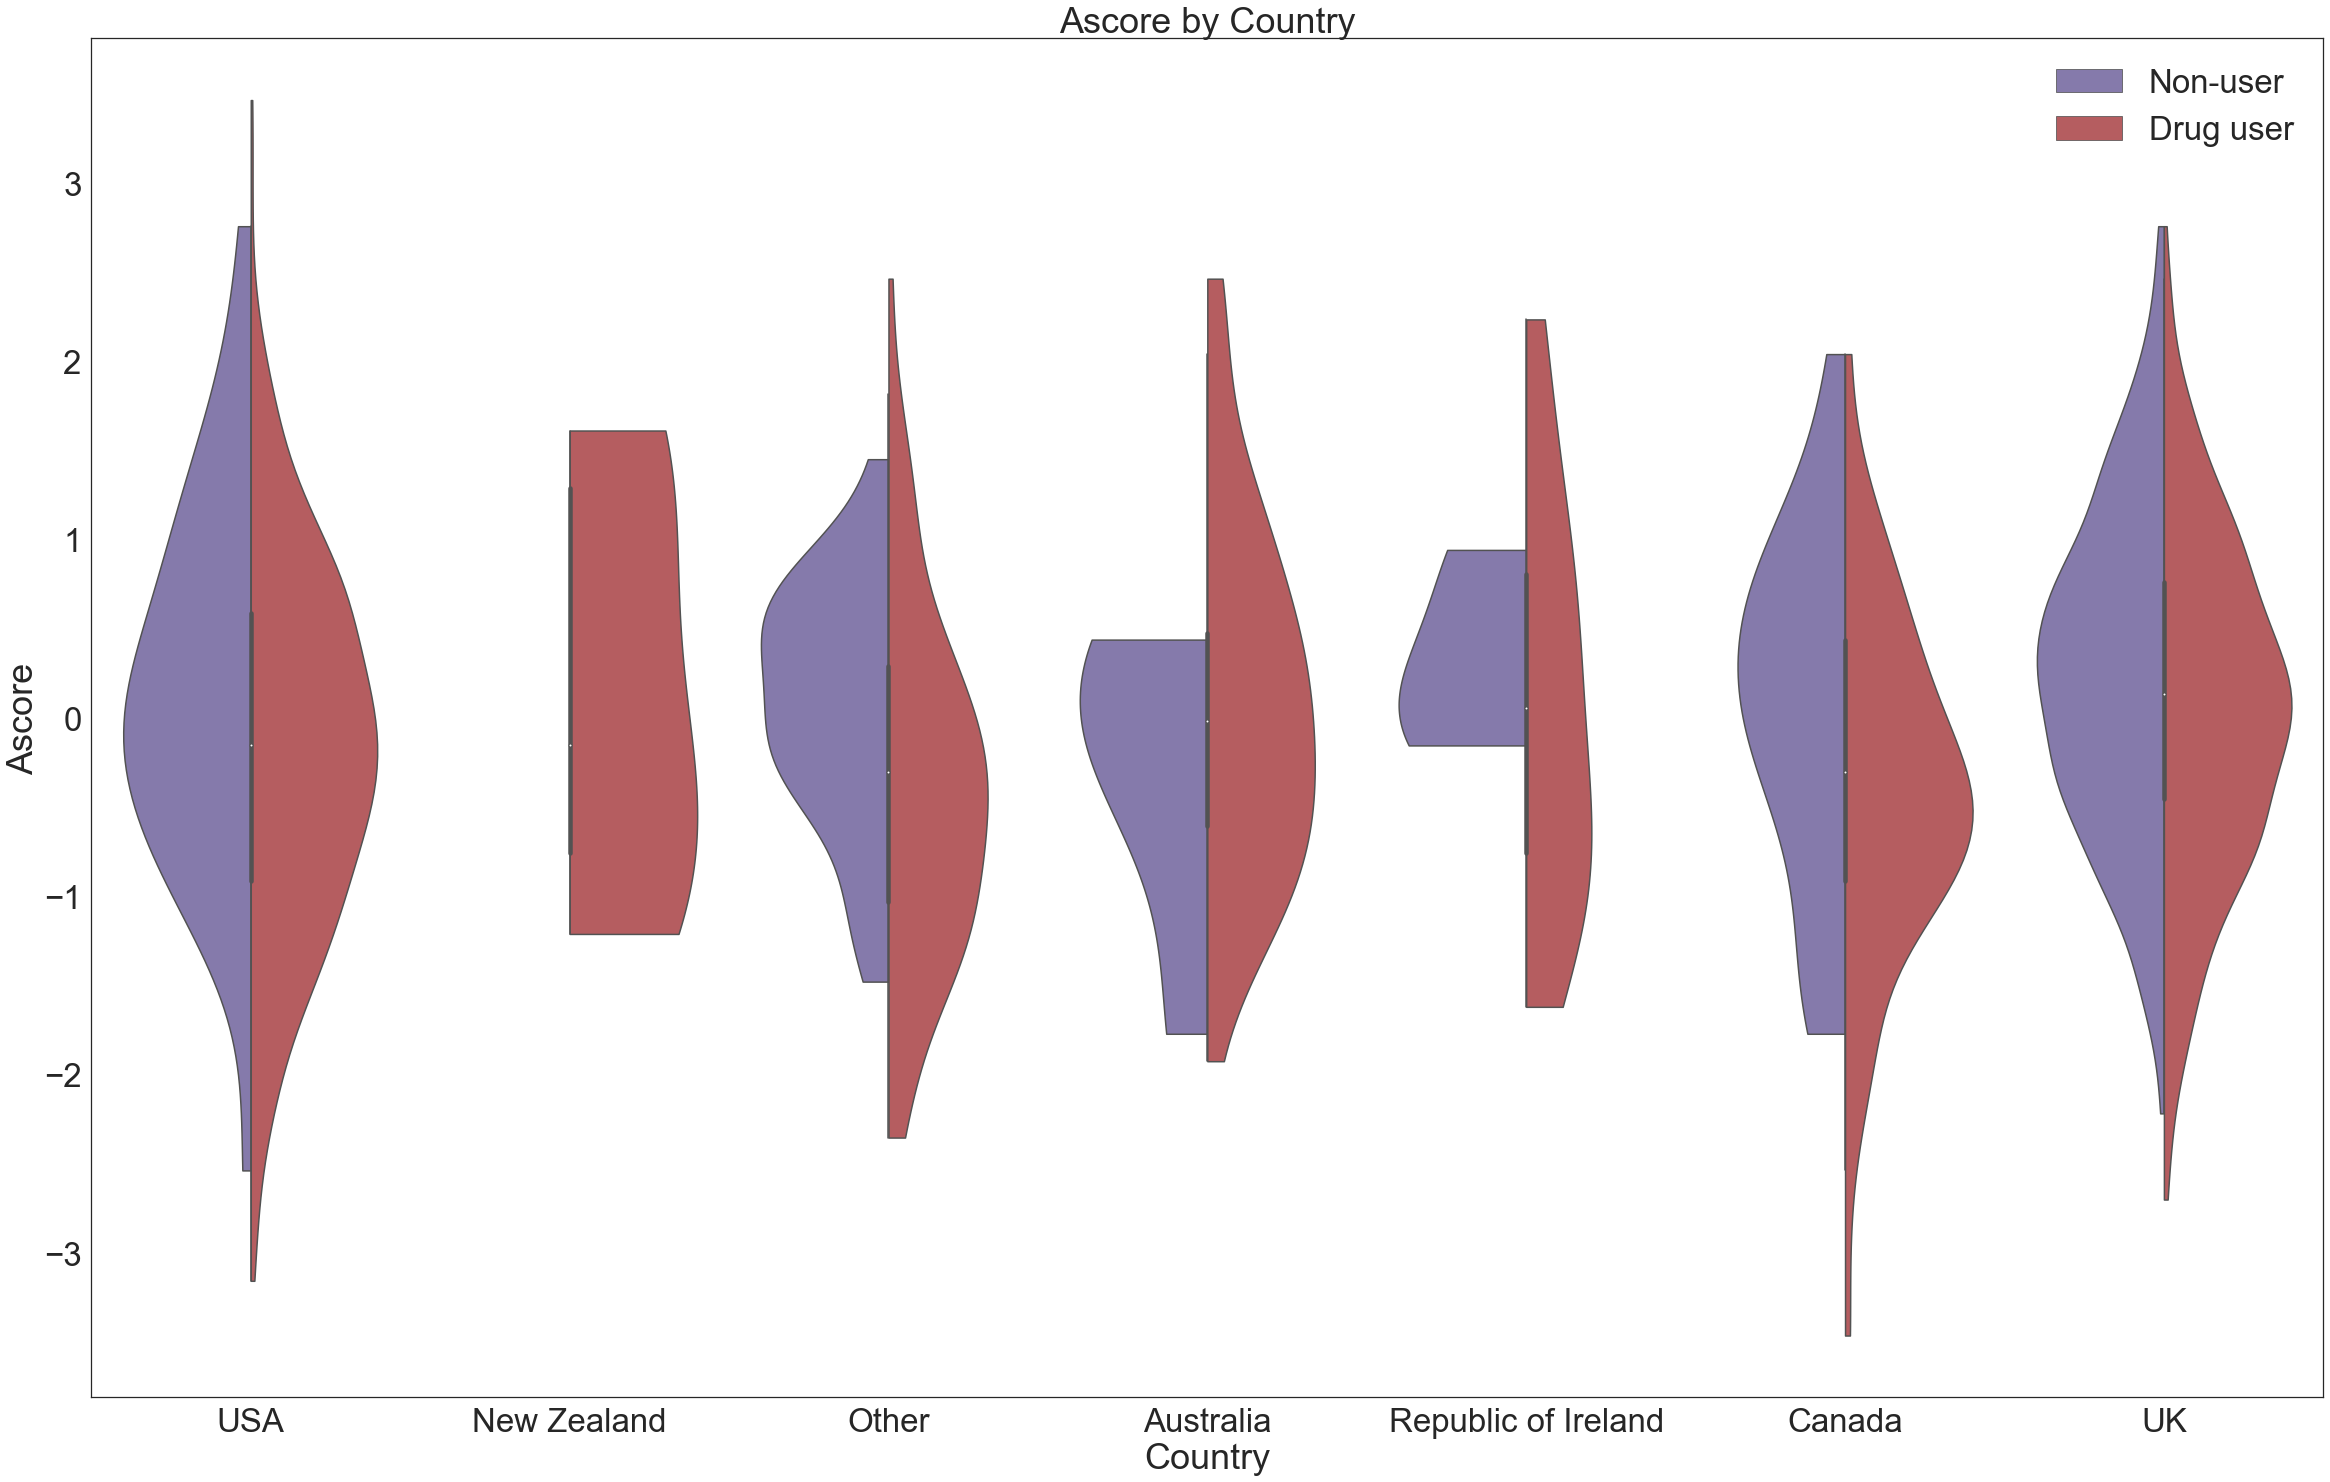

In [273]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Country", y="Ascore", data=df,hue='hard',split=True, legend=True, palette=["m","r"], cut=0)
g.set_xticklabels(country_lb)

g.set_ylabel("Ascore")
g.set_xlabel("Country")
g.set_title("Ascore by Country")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Ascore by country.png")
plt.show()

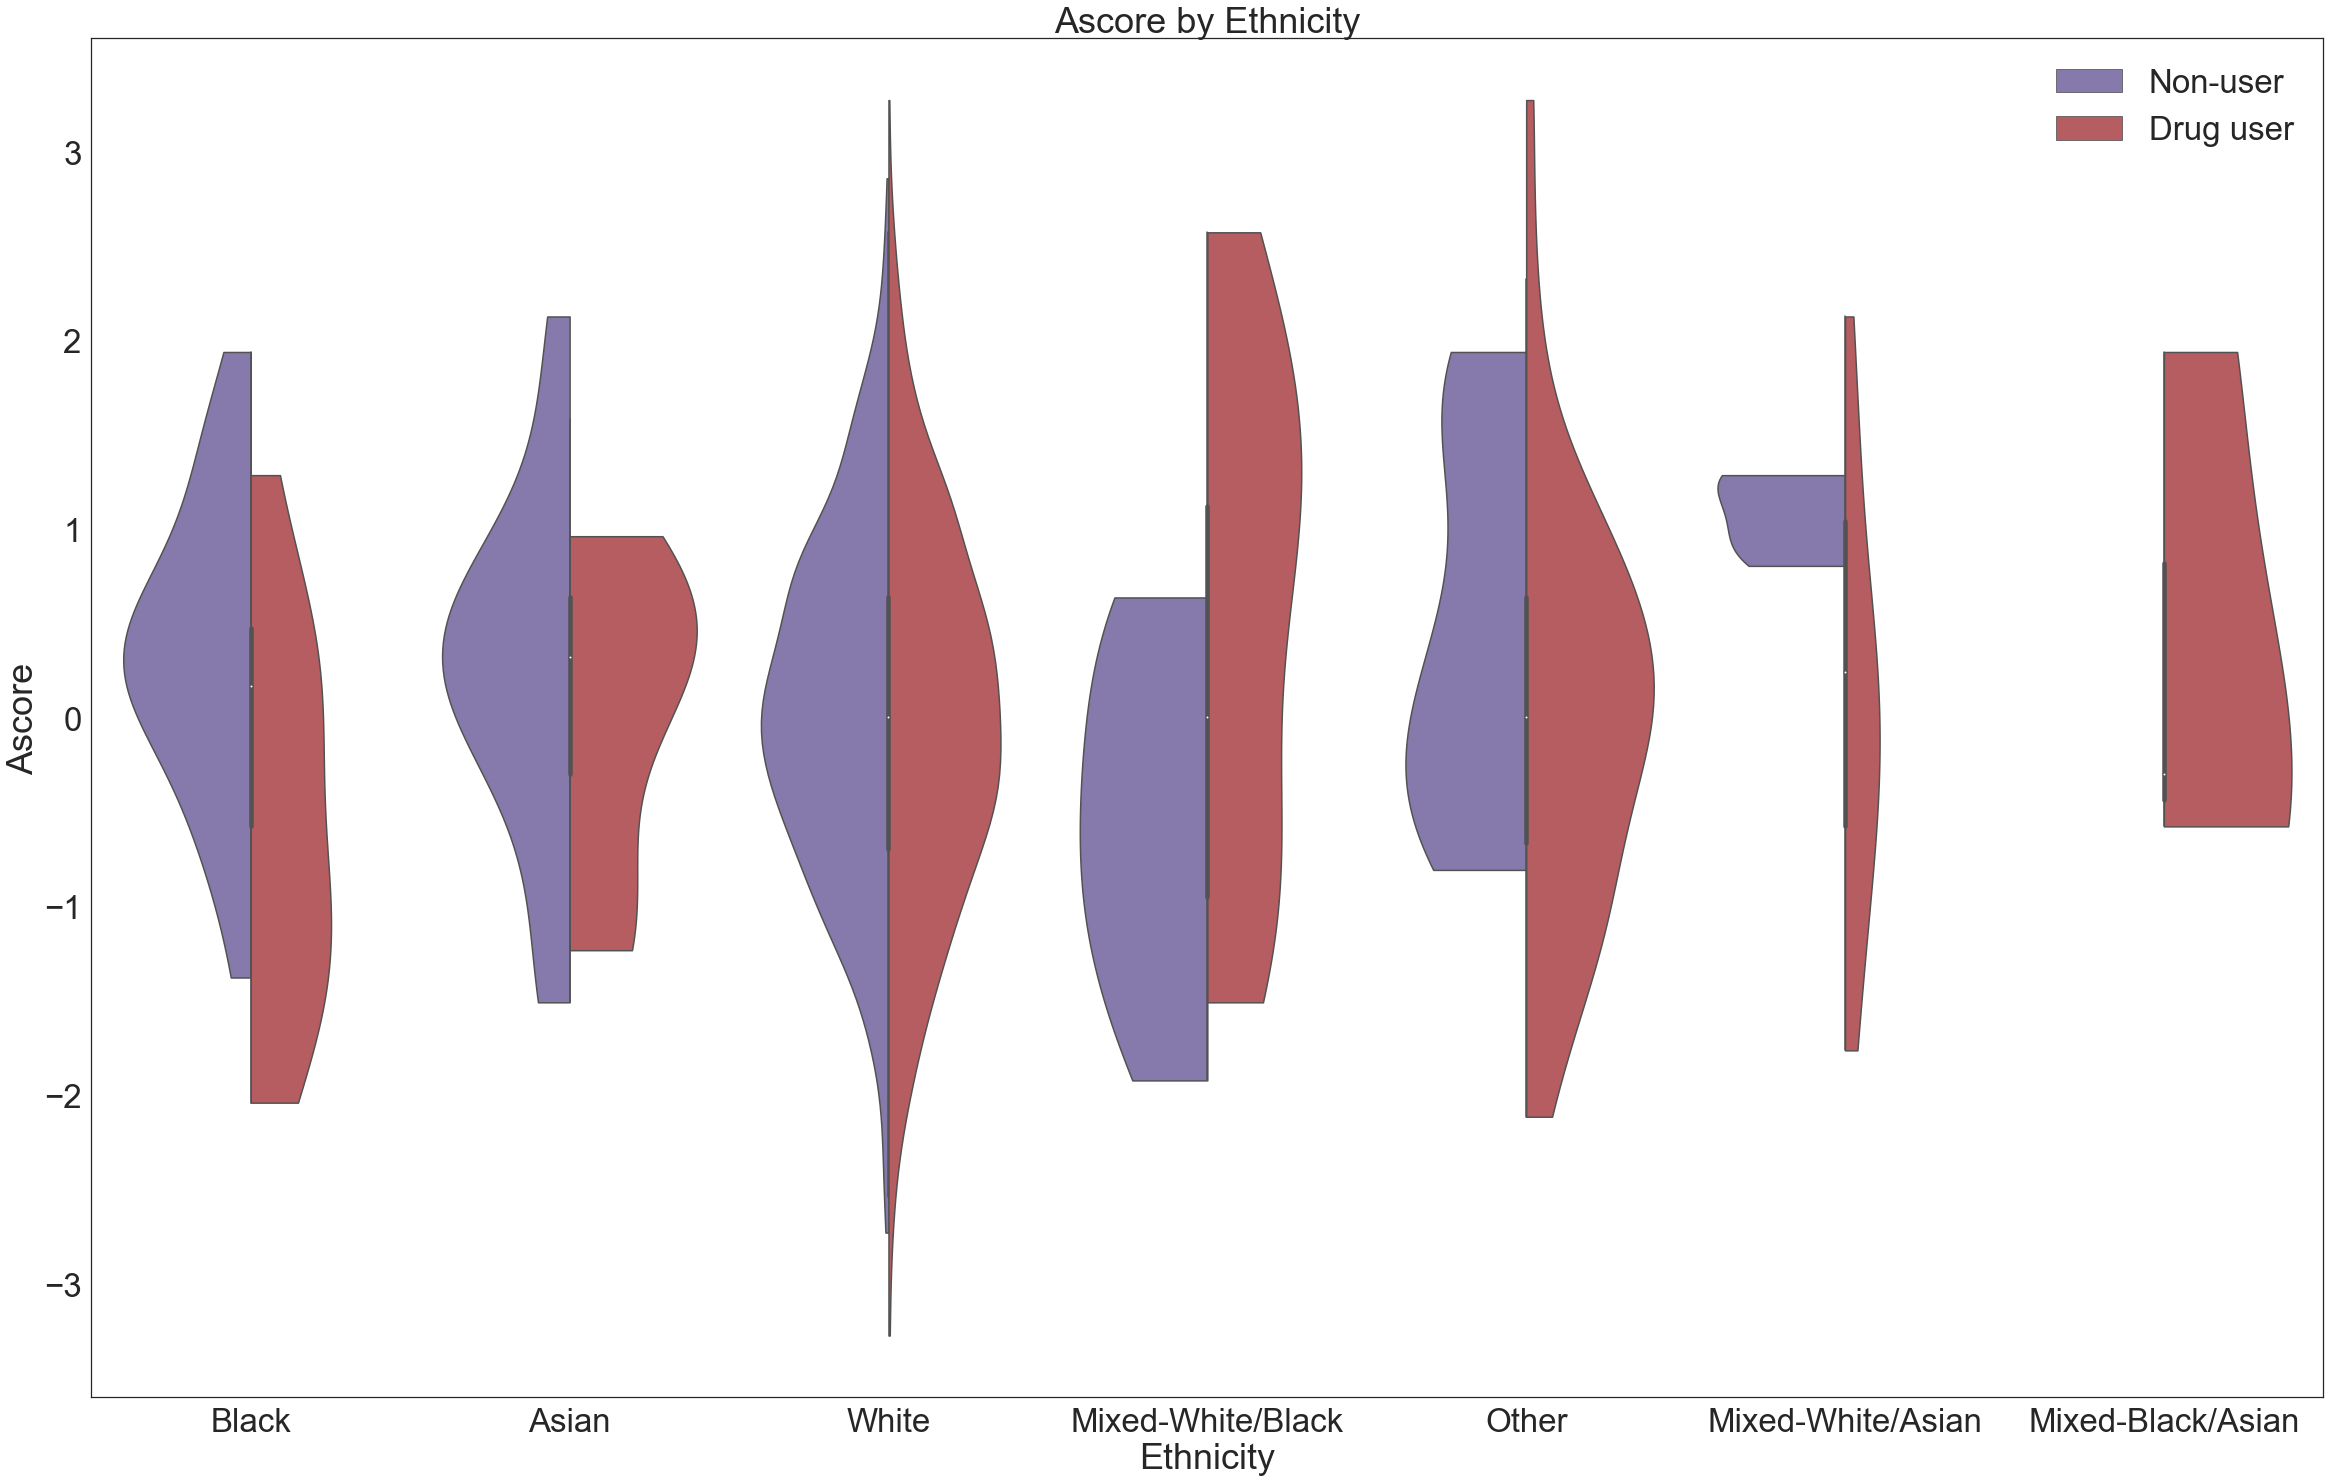

In [274]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Ethnicity", y="Escore", data=df,hue='hard',split=True, legend=True, palette=["m","r"], cut=0)
g.set_xticklabels(ethnicity_lb)

g.set_ylabel("Ascore")
g.set_xlabel("Ethnicity")
g.set_title("Ascore by Ethnicity")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Ascore by ethnicity.png")
plt.show()

### CScore by User

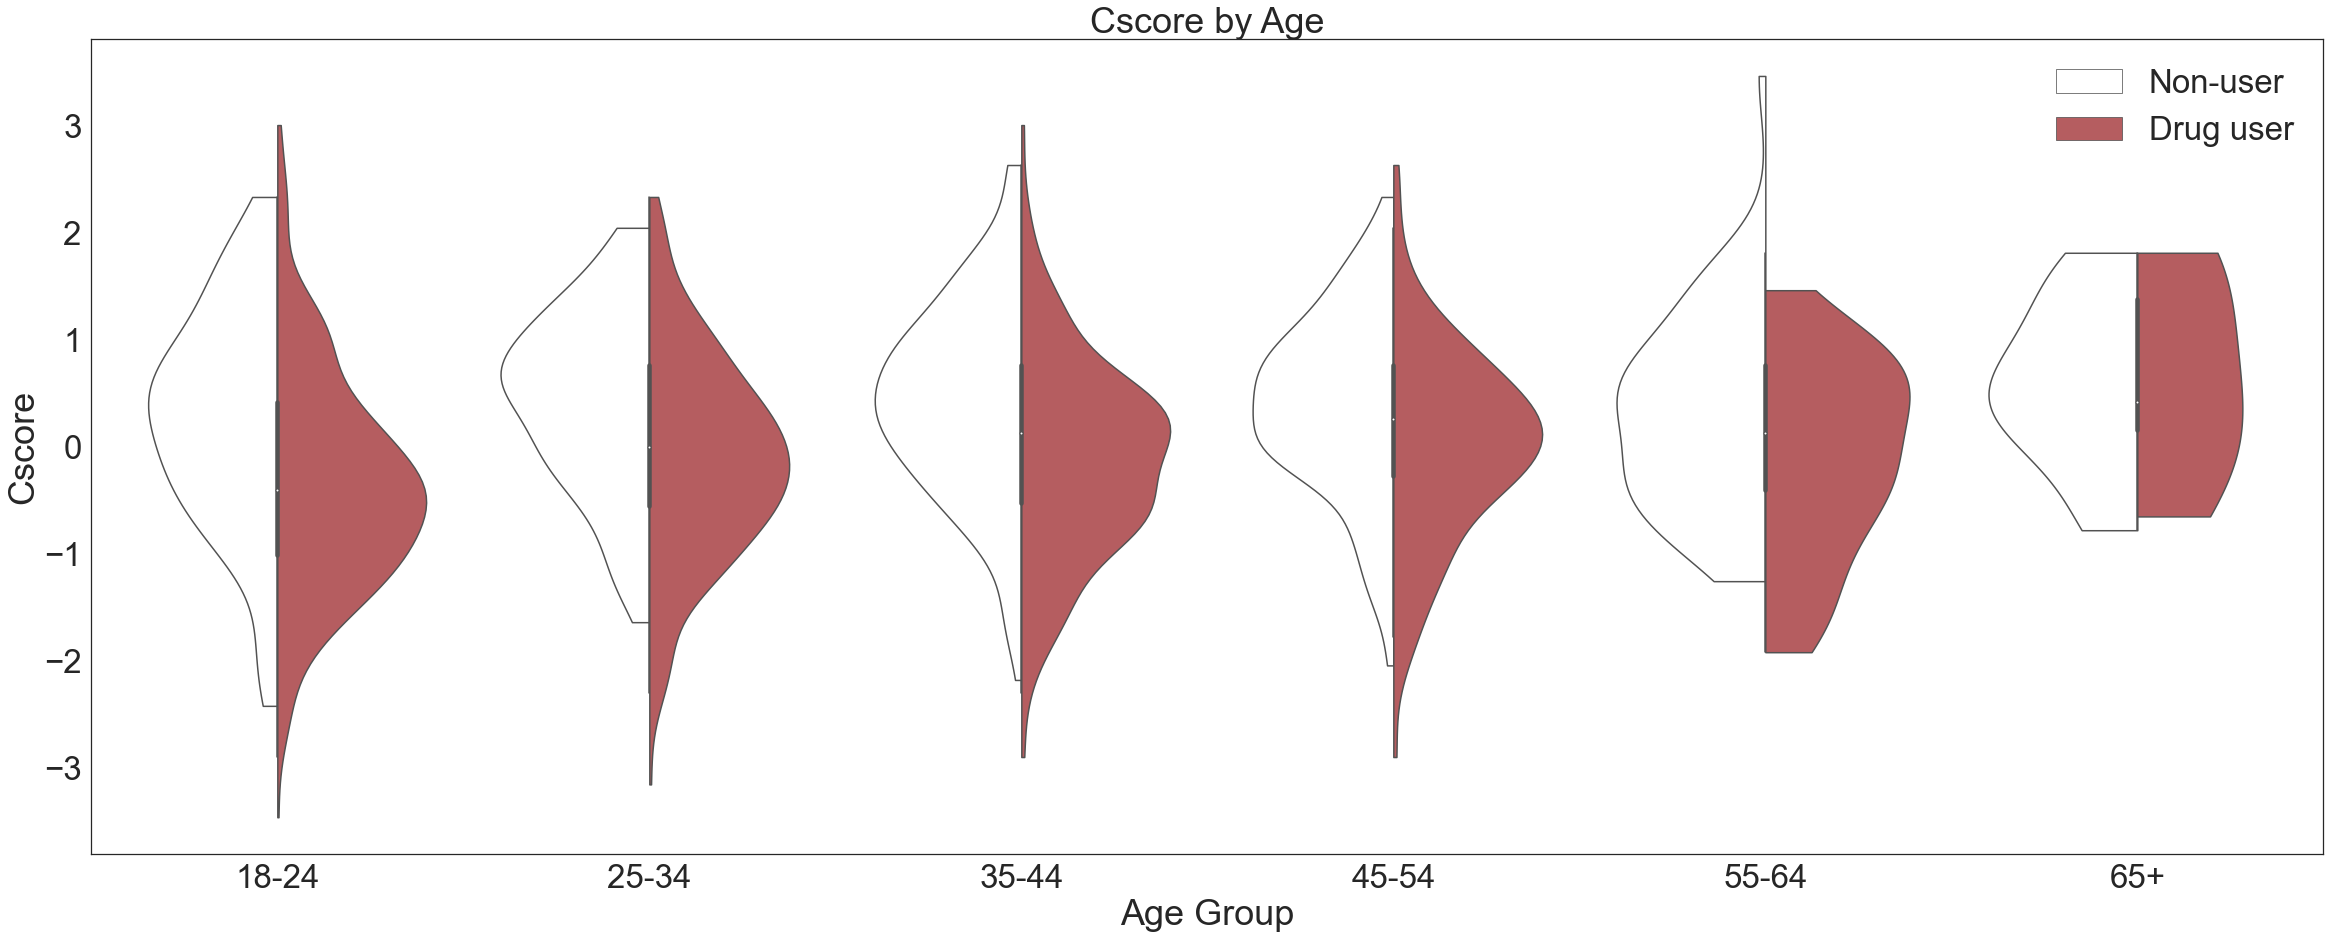

In [282]:
f, ax = plt.subplots(figsize=(40, 15))

g=sns.violinplot(x="Age", y="Cscore", data=df,hue='hard',split=True, legend=True, palette=["w","r"], cut=0)
g.set_xticklabels(age_lb)

g.set_ylabel("Cscore")
g.set_xlabel("Age Group")
g.set_title("Cscore by Age")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin CScore by age.png")
plt.show()

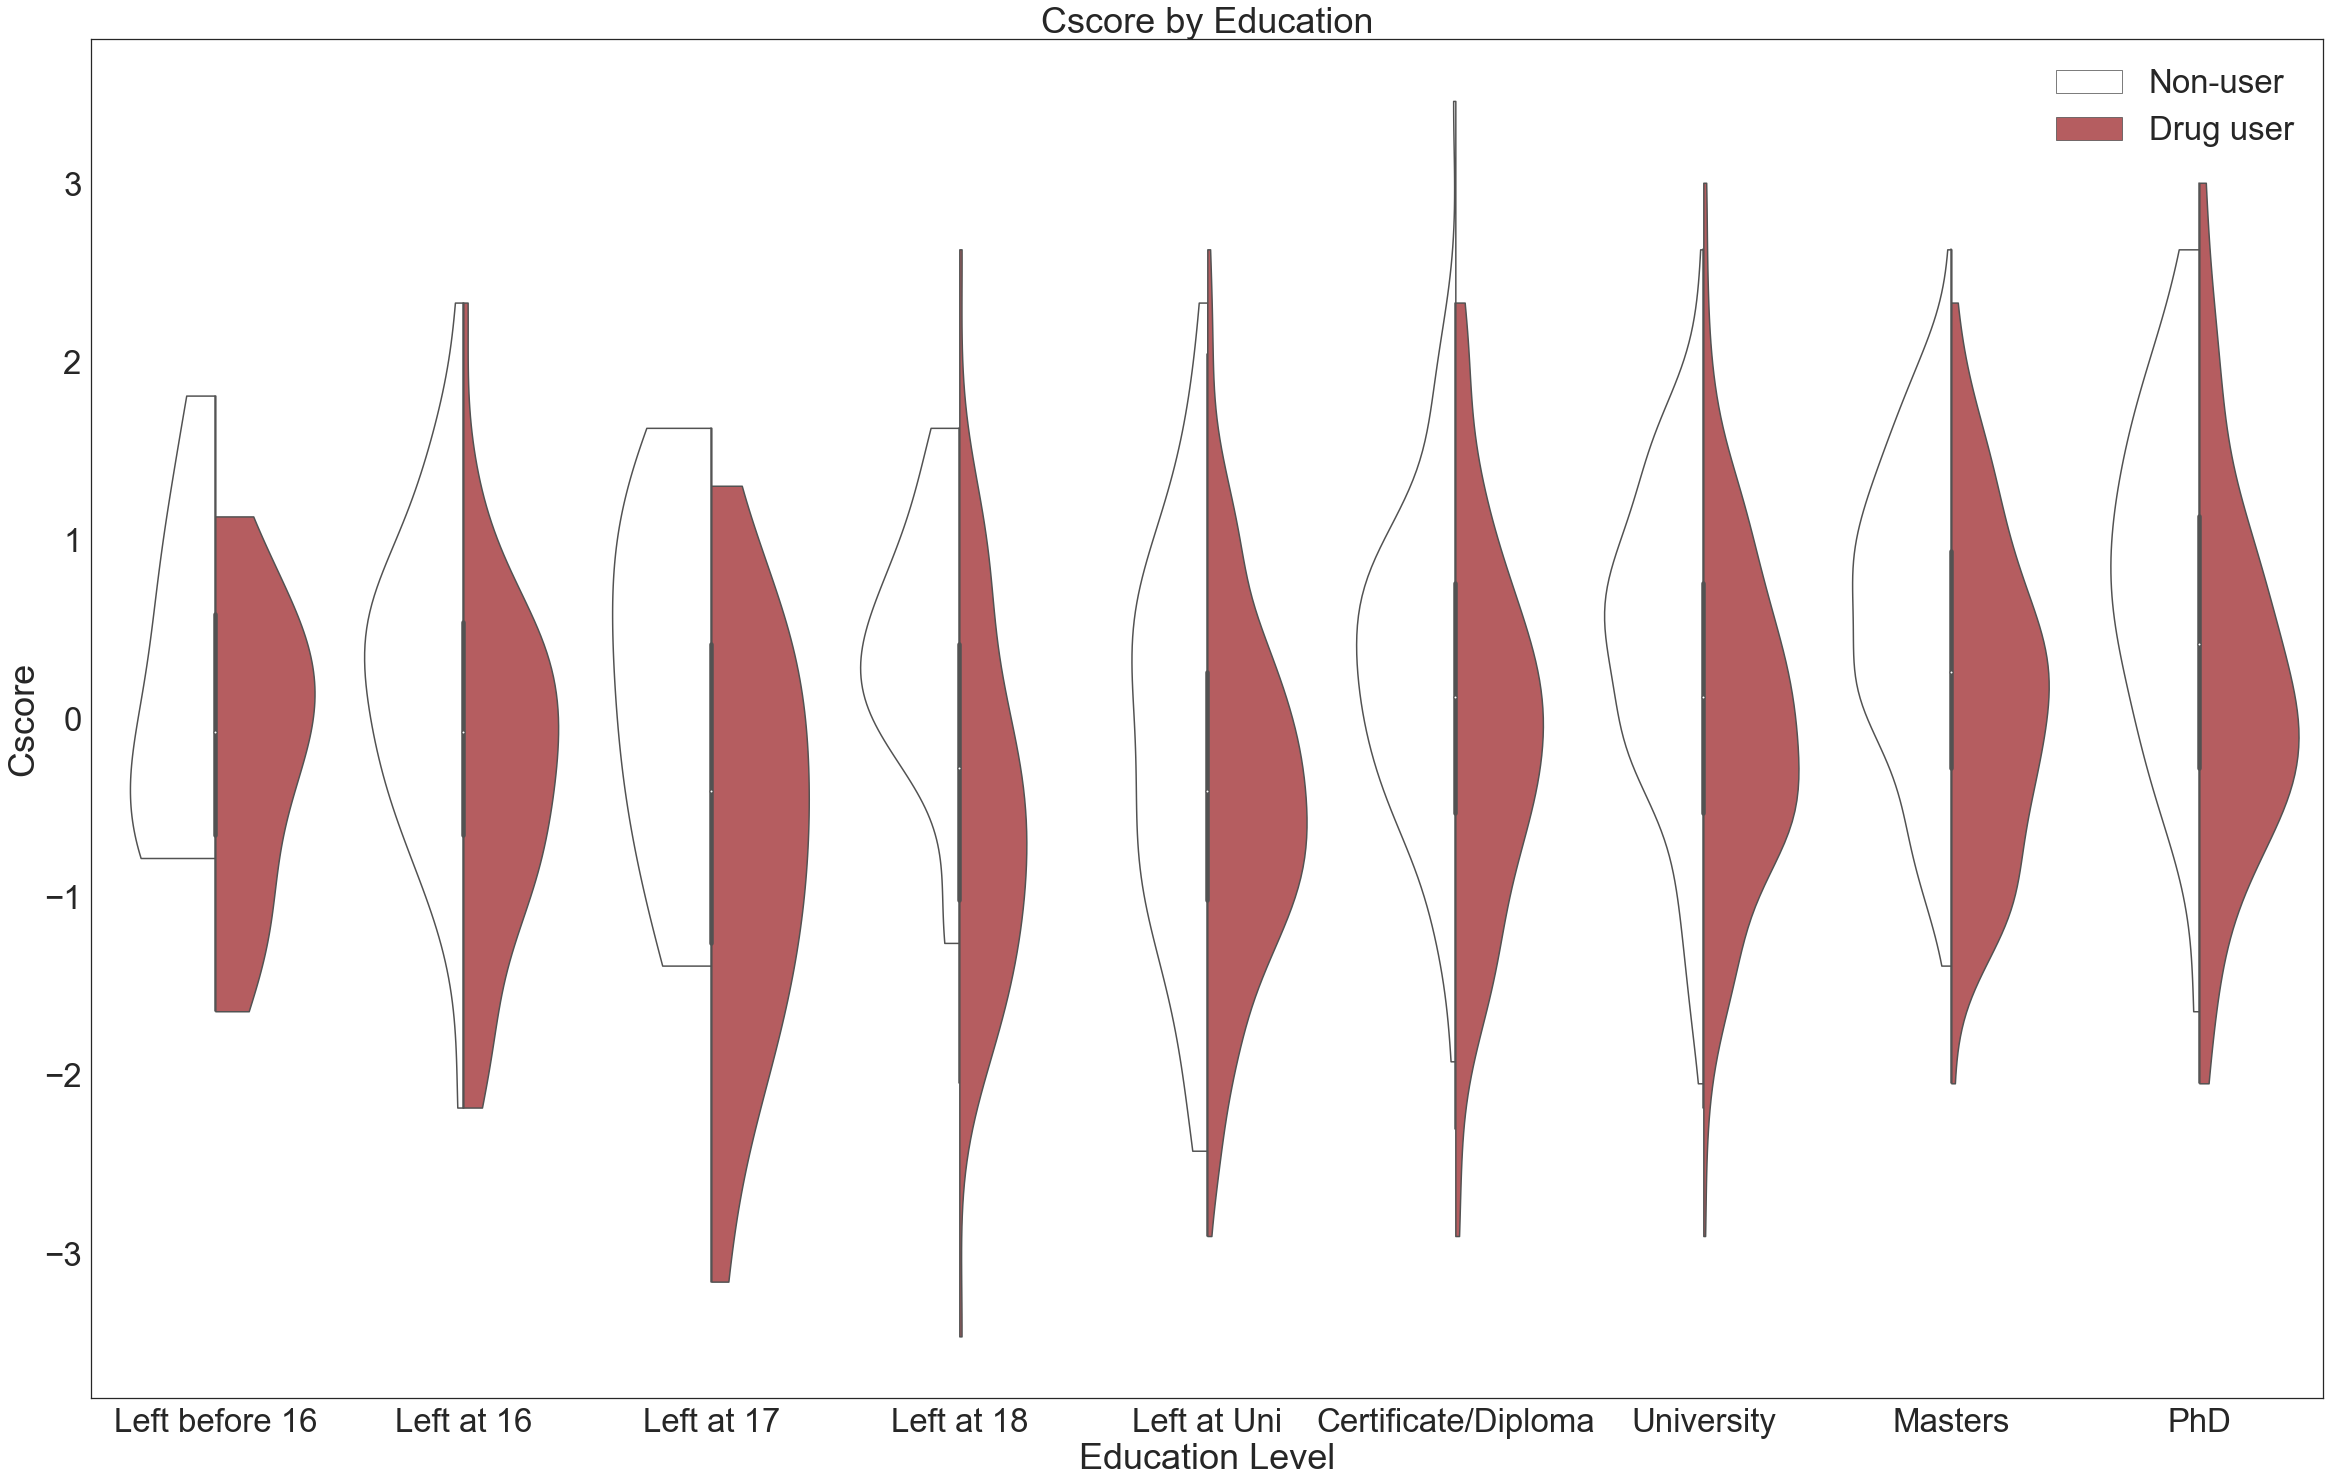

In [283]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Education", y="Cscore", data=df,hue='hard',split=True, legend=True, palette=["w","r"], cut=0)
g.set_xticklabels(education_lb)

g.set_ylabel("Cscore")
g.set_xlabel("Education Level")
g.set_title("Cscore by Education")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Cscore by education.png")
plt.show()

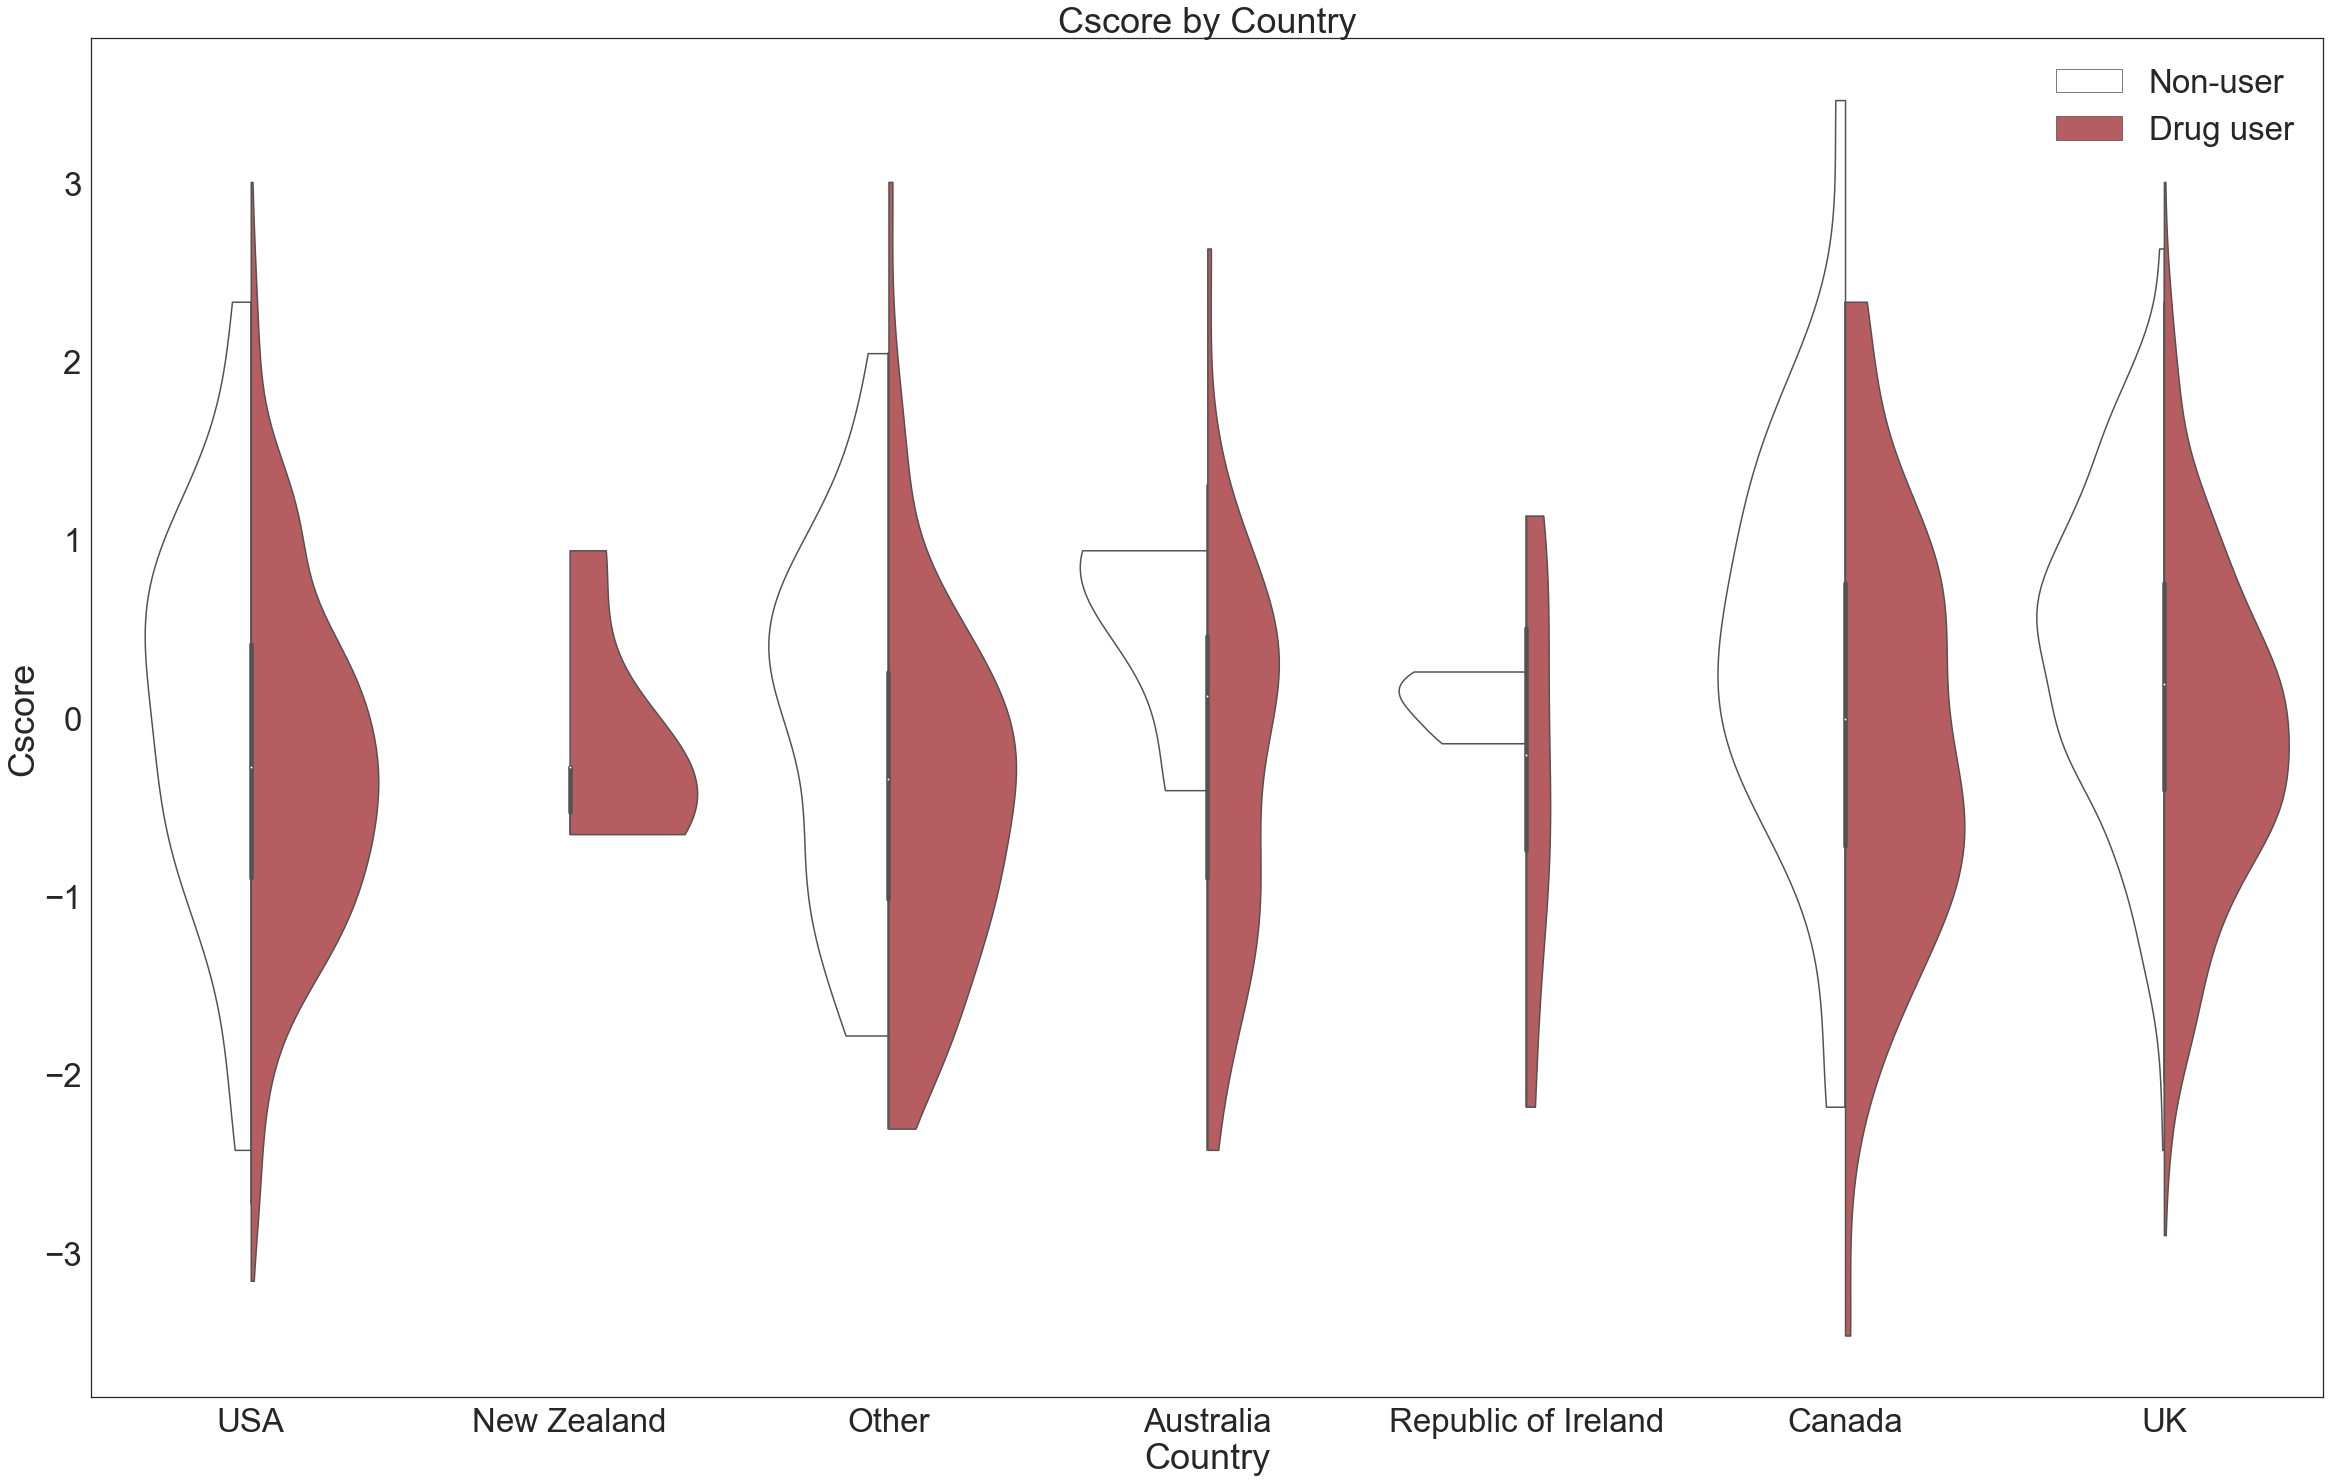

In [284]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Country", y="Cscore", data=df,hue='hard',split=True, legend=True, palette=["w","r"], cut=0)
g.set_xticklabels(country_lb)

g.set_ylabel("Cscore")
g.set_xlabel("Country")
g.set_title("Cscore by Country")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Cscore by country.png")
plt.show()

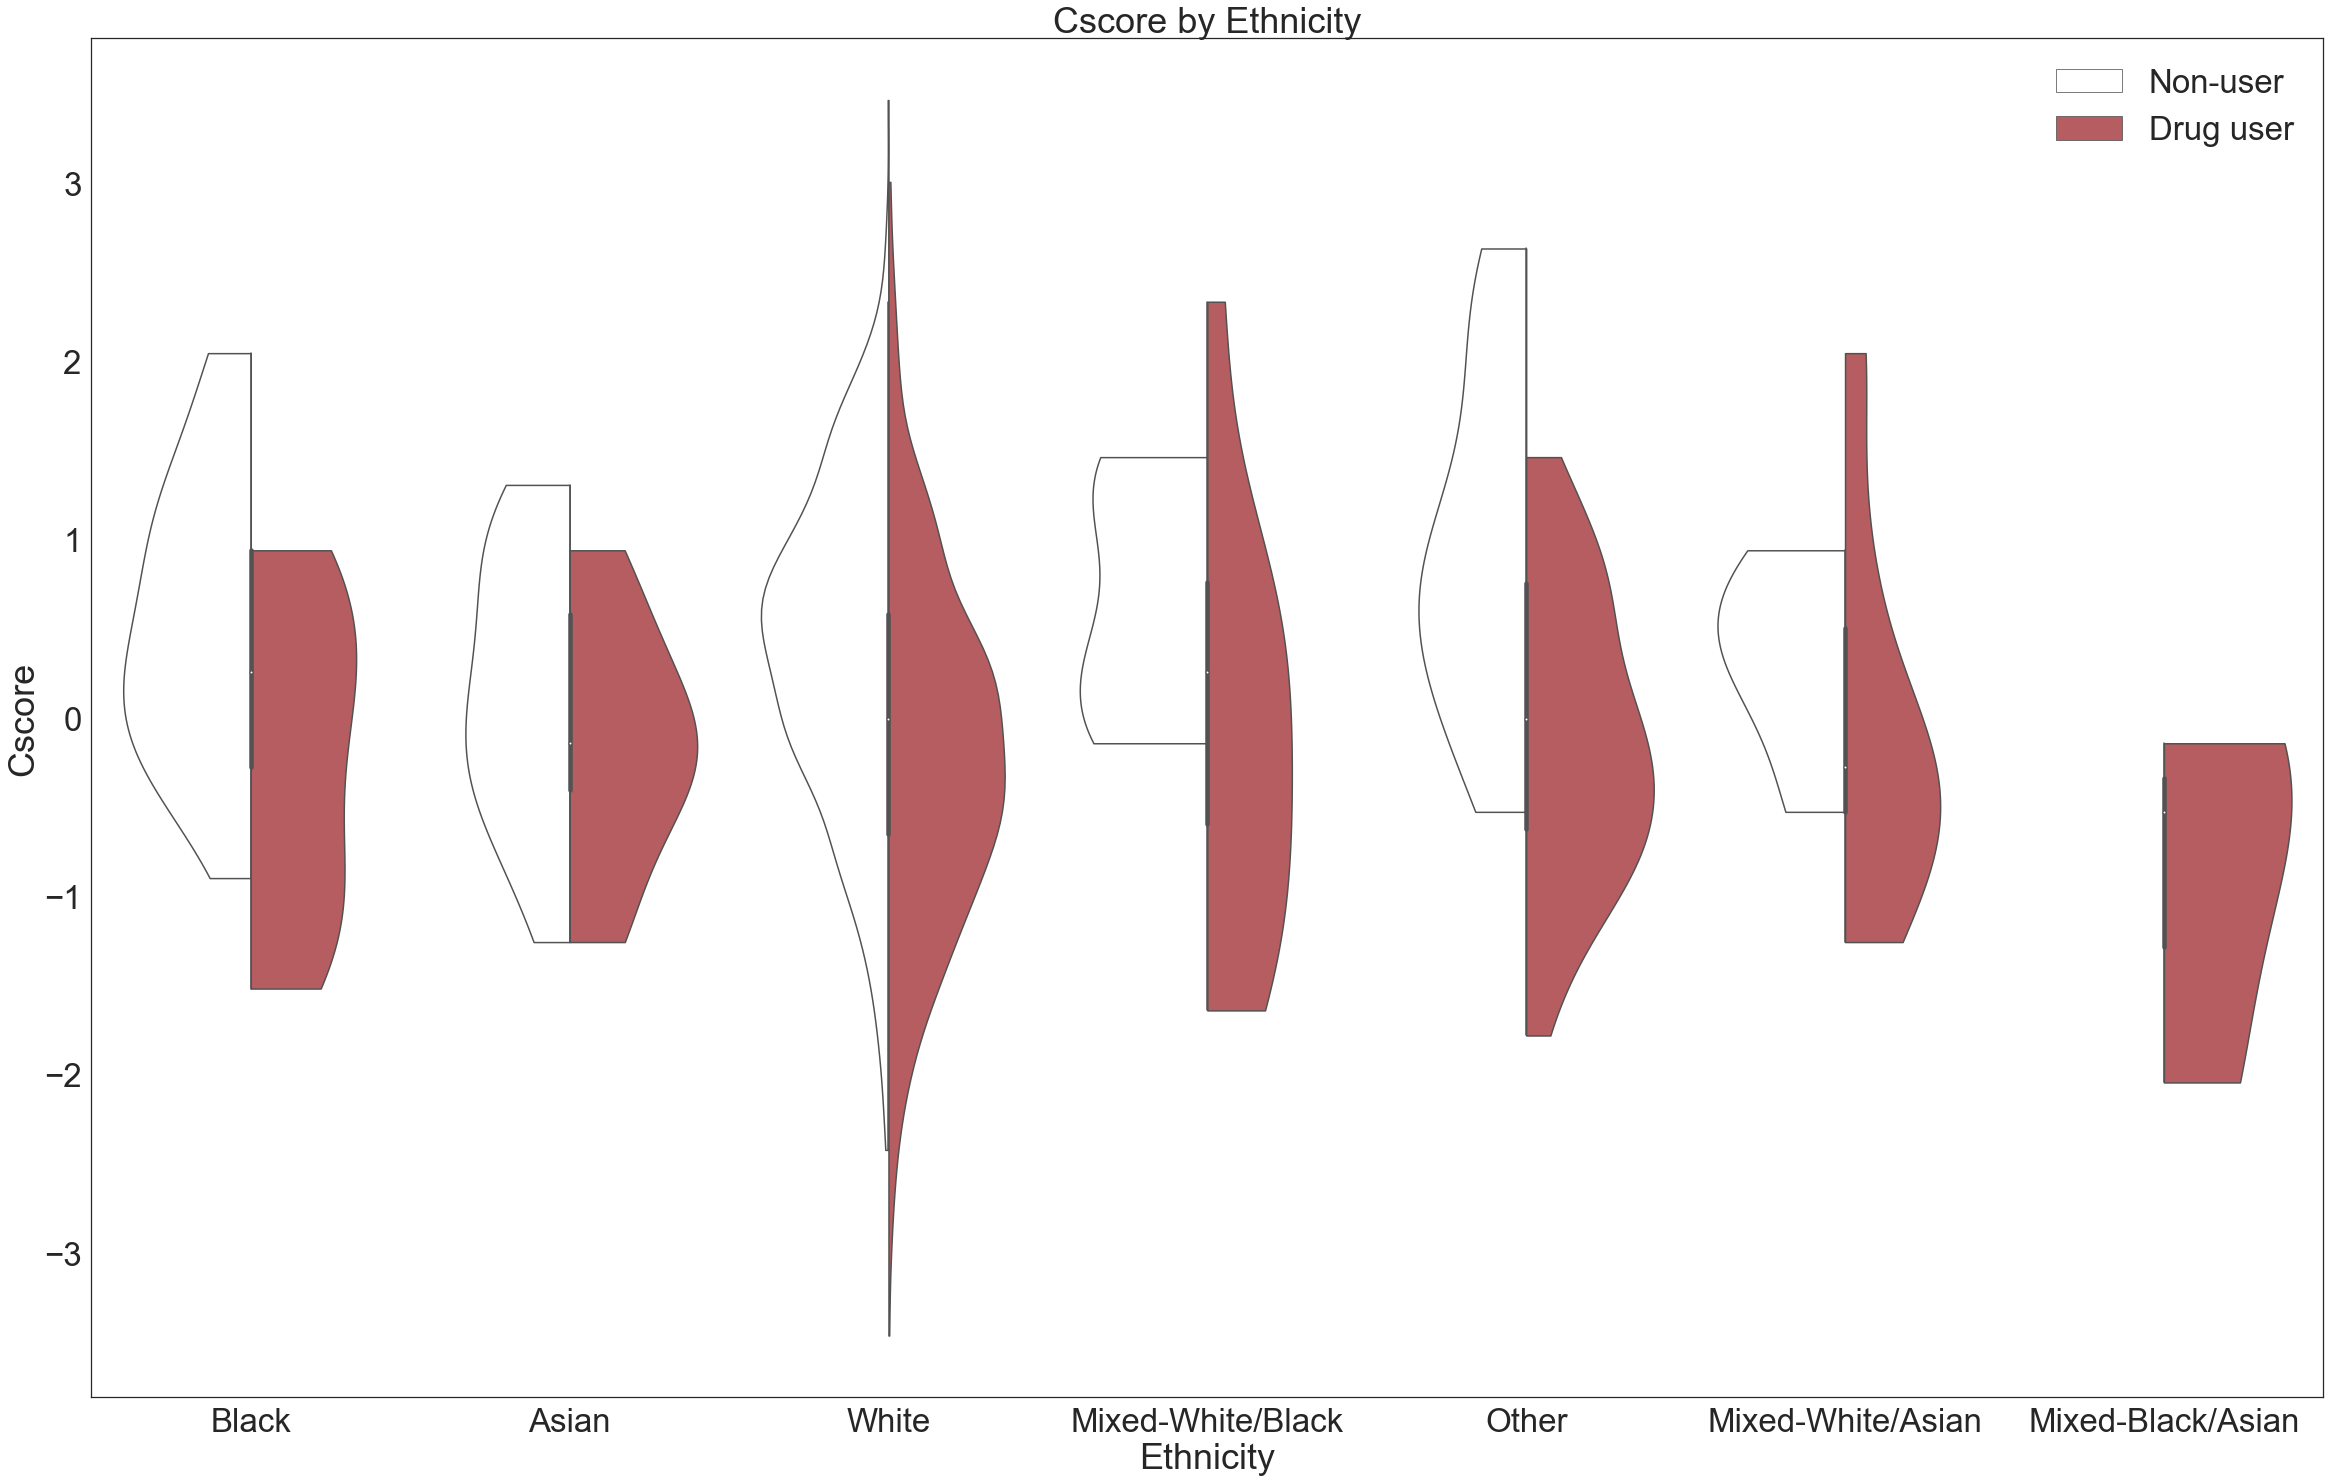

In [285]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Ethnicity", y="Cscore", data=df,hue='hard',split=True, legend=True, palette=["w","r"], cut=0)
g.set_xticklabels(ethnicity_lb)

g.set_ylabel("Cscore")
g.set_xlabel("Ethnicity")
g.set_title("Cscore by Ethnicity")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Cscore by ethnicity.png")
plt.show()

### Impulsive by User

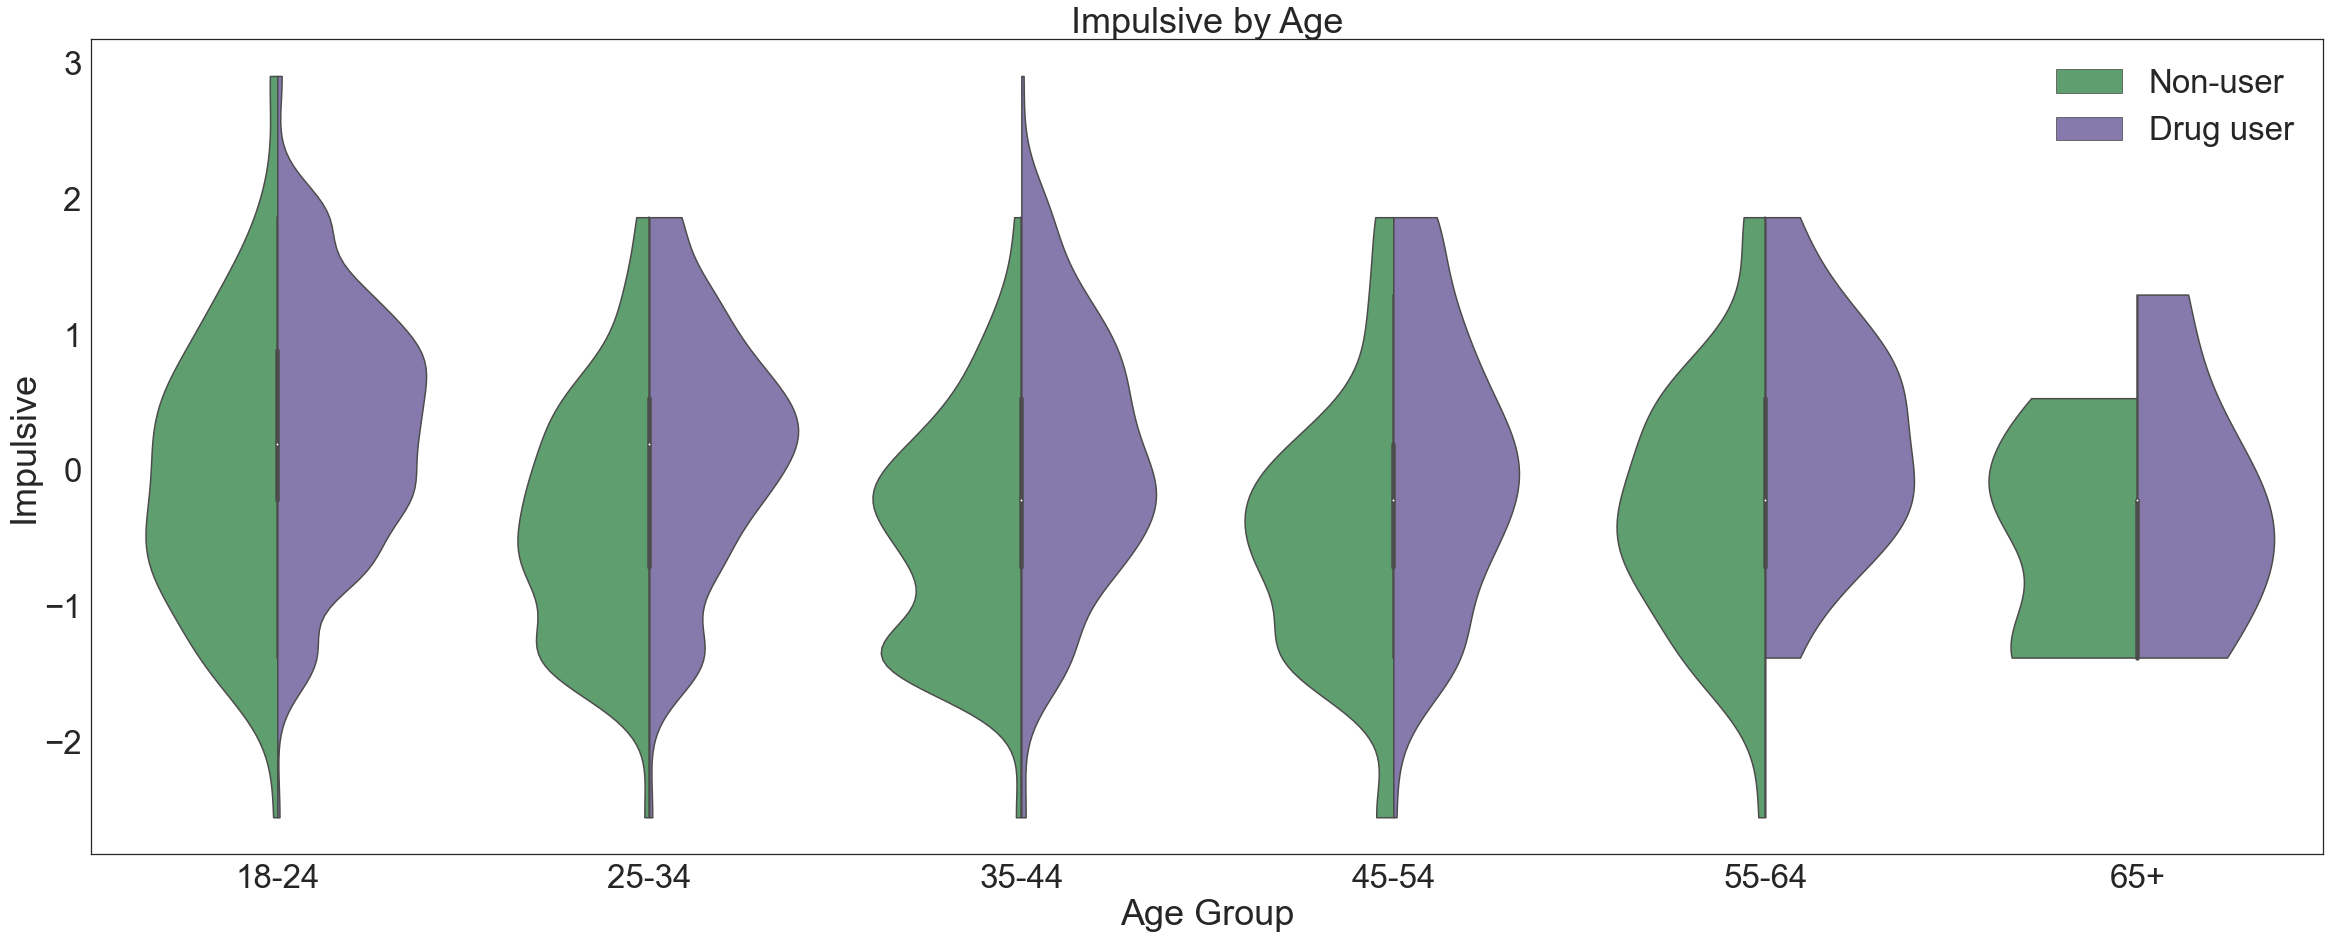

In [288]:
f, ax = plt.subplots(figsize=(40, 15))

g=sns.violinplot(x="Age", y="Impulsive", data=df,hue='hard',split=True, legend=True, palette=["g","m"], cut=0)
g.set_xticklabels(age_lb)

g.set_ylabel("Impulsive")
g.set_xlabel("Age Group")
g.set_title("Impulsive by Age")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Impulsive by age.png")
plt.show()

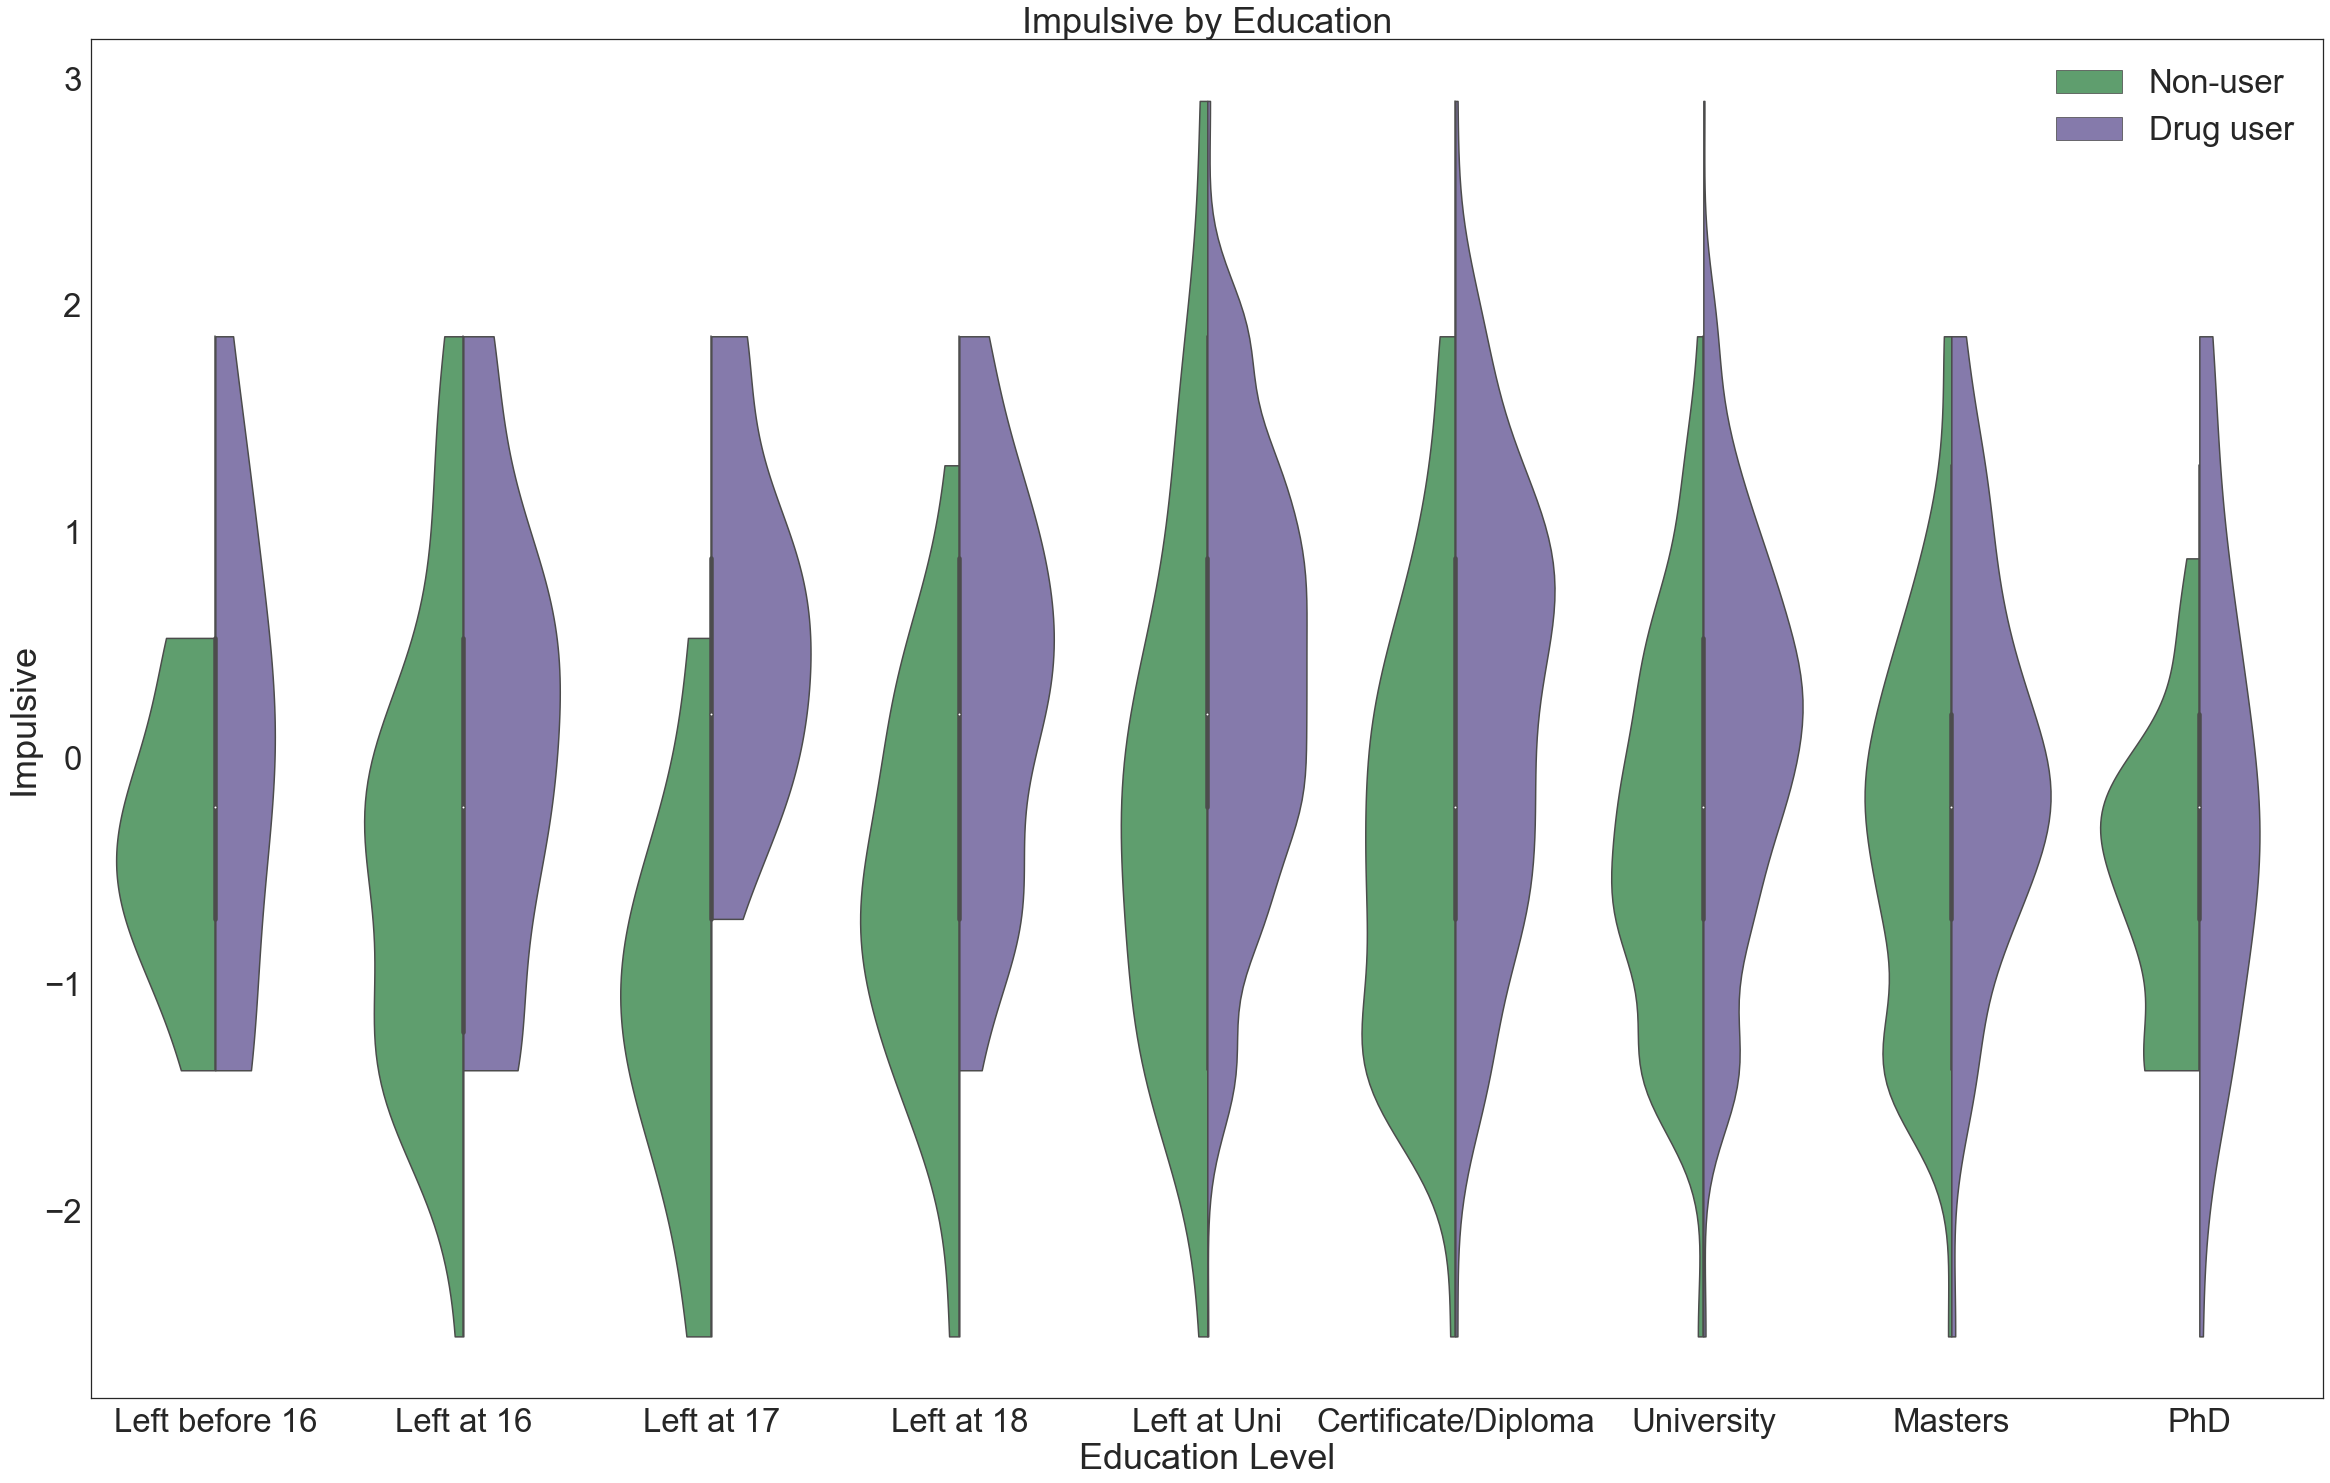

In [289]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Education", y="Impulsive", data=df,hue='hard',split=True, legend=True, palette=["g","m"], cut=0)
g.set_xticklabels(education_lb)

g.set_ylabel("Impulsive")
g.set_xlabel("Education Level")
g.set_title("Impulsive by Education")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Impulsive by education.png")
plt.show()

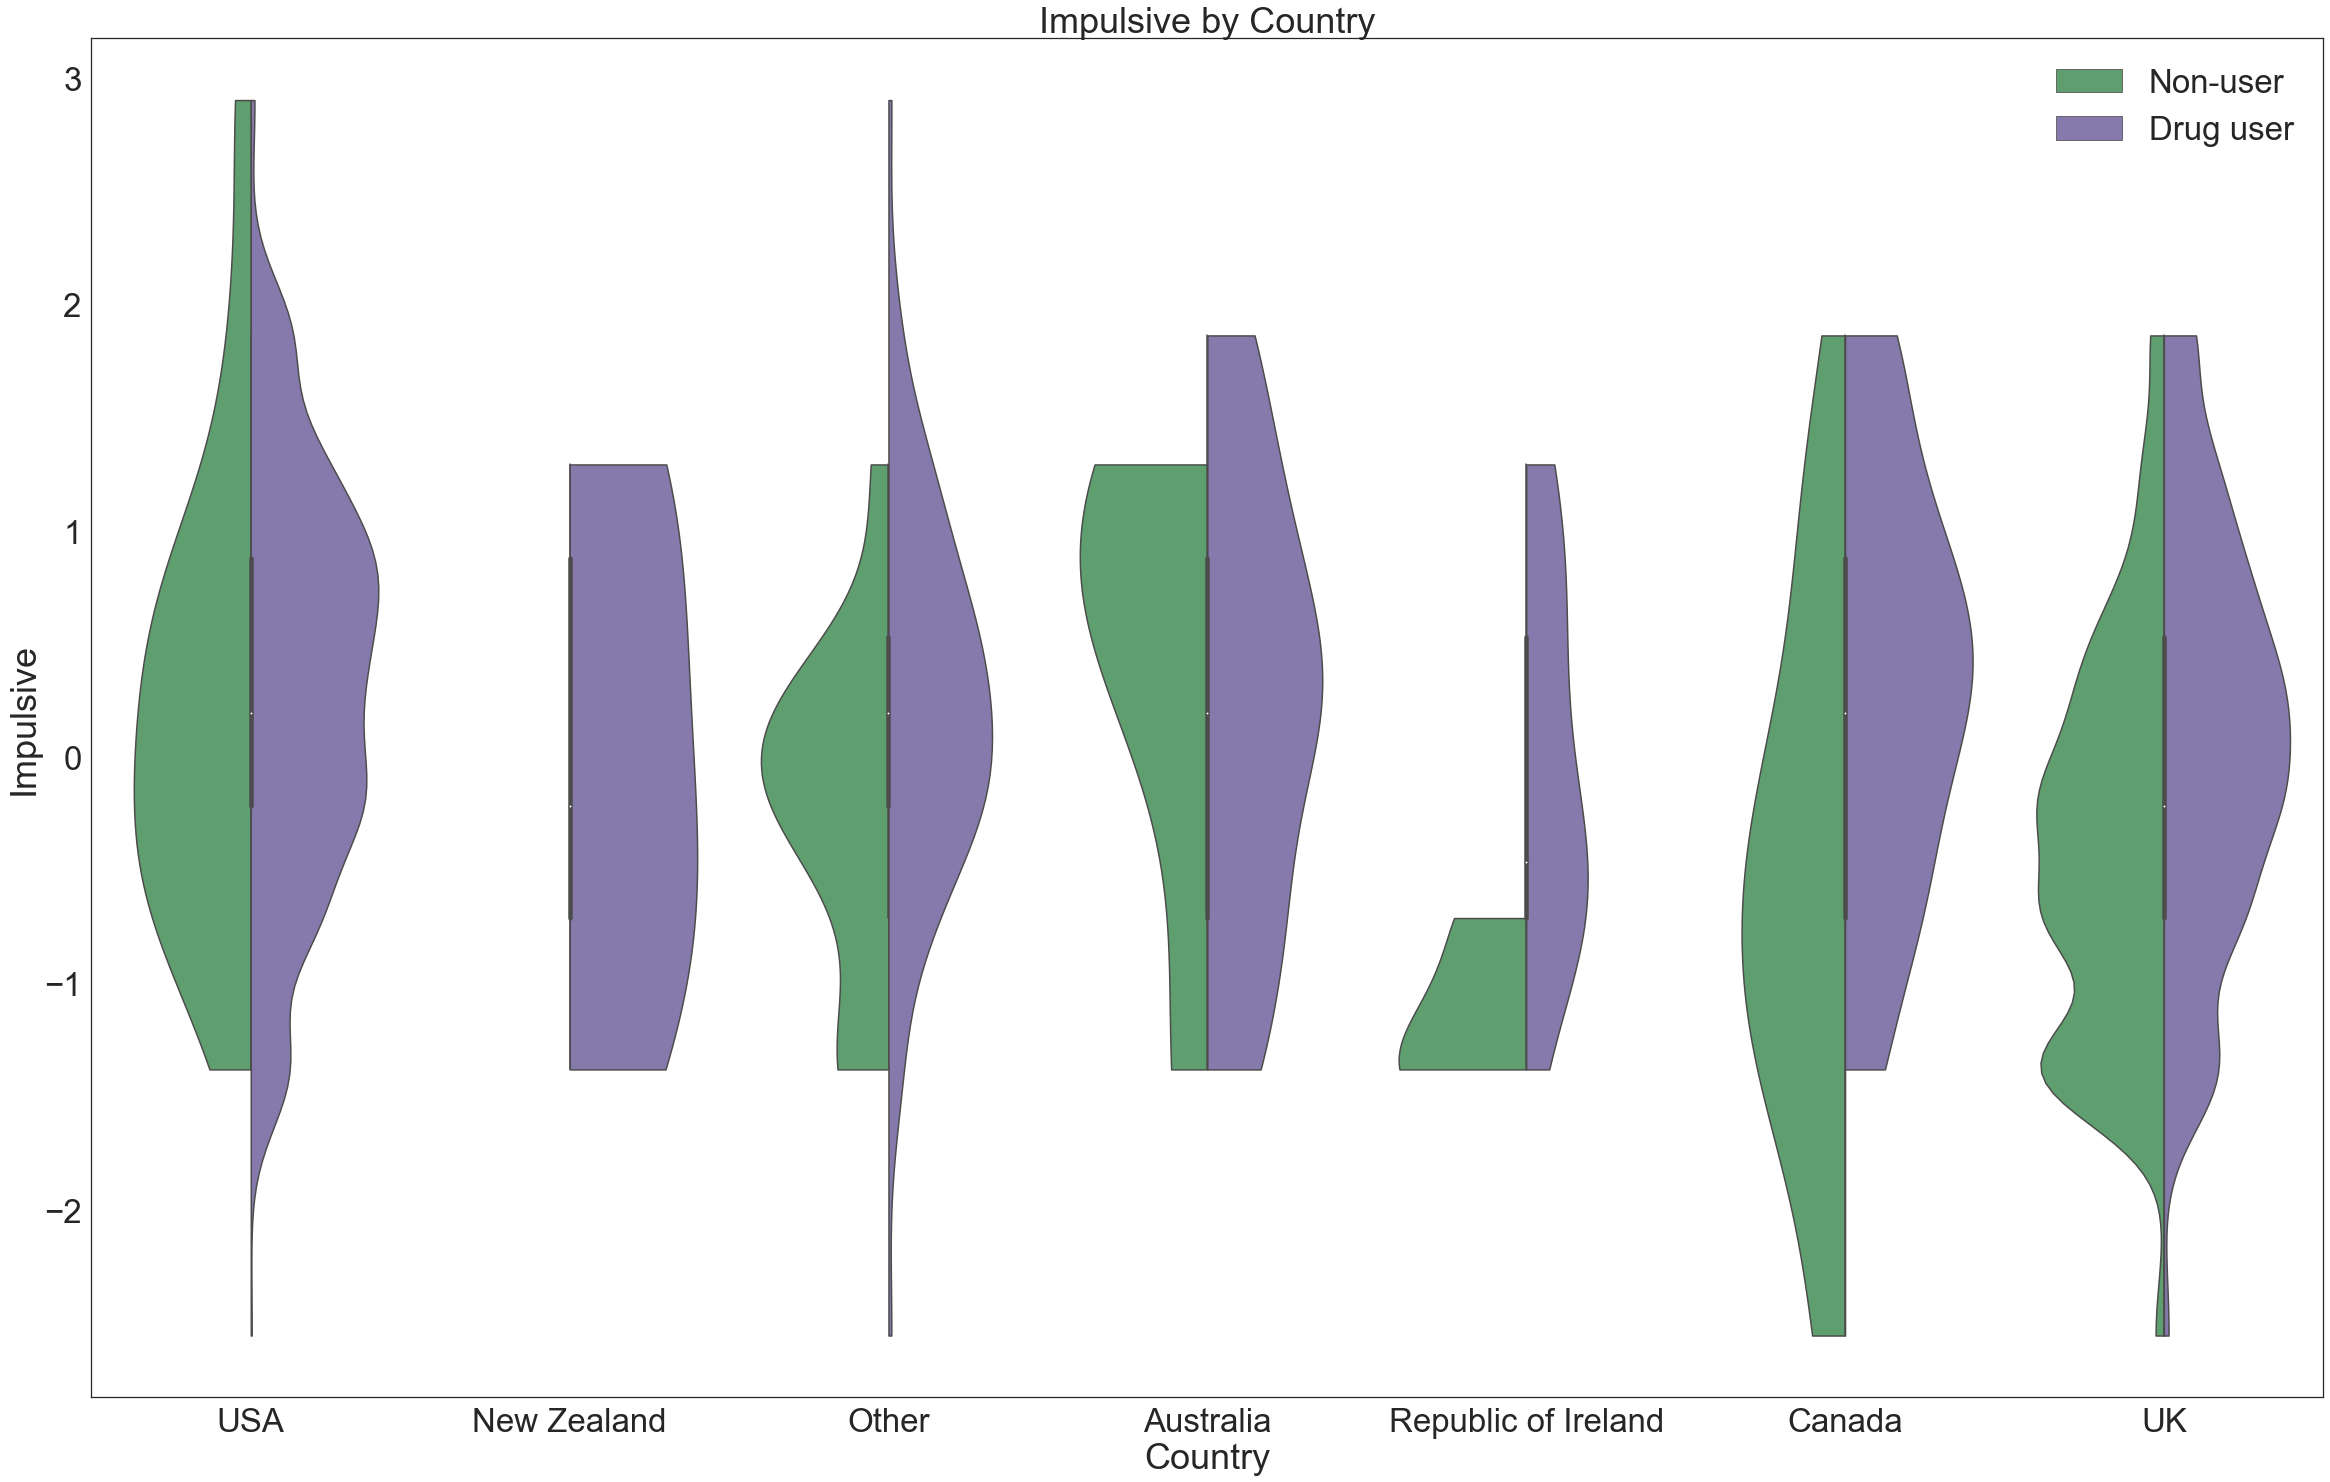

In [290]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Country", y="Impulsive", data=df,hue='hard',split=True, legend=True, palette=["g","m"], cut=0)
g.set_xticklabels(country_lb)

g.set_ylabel("Impulsive")
g.set_xlabel("Country")
g.set_title("Impulsive by Country")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Impulsive by country.png")
plt.show()

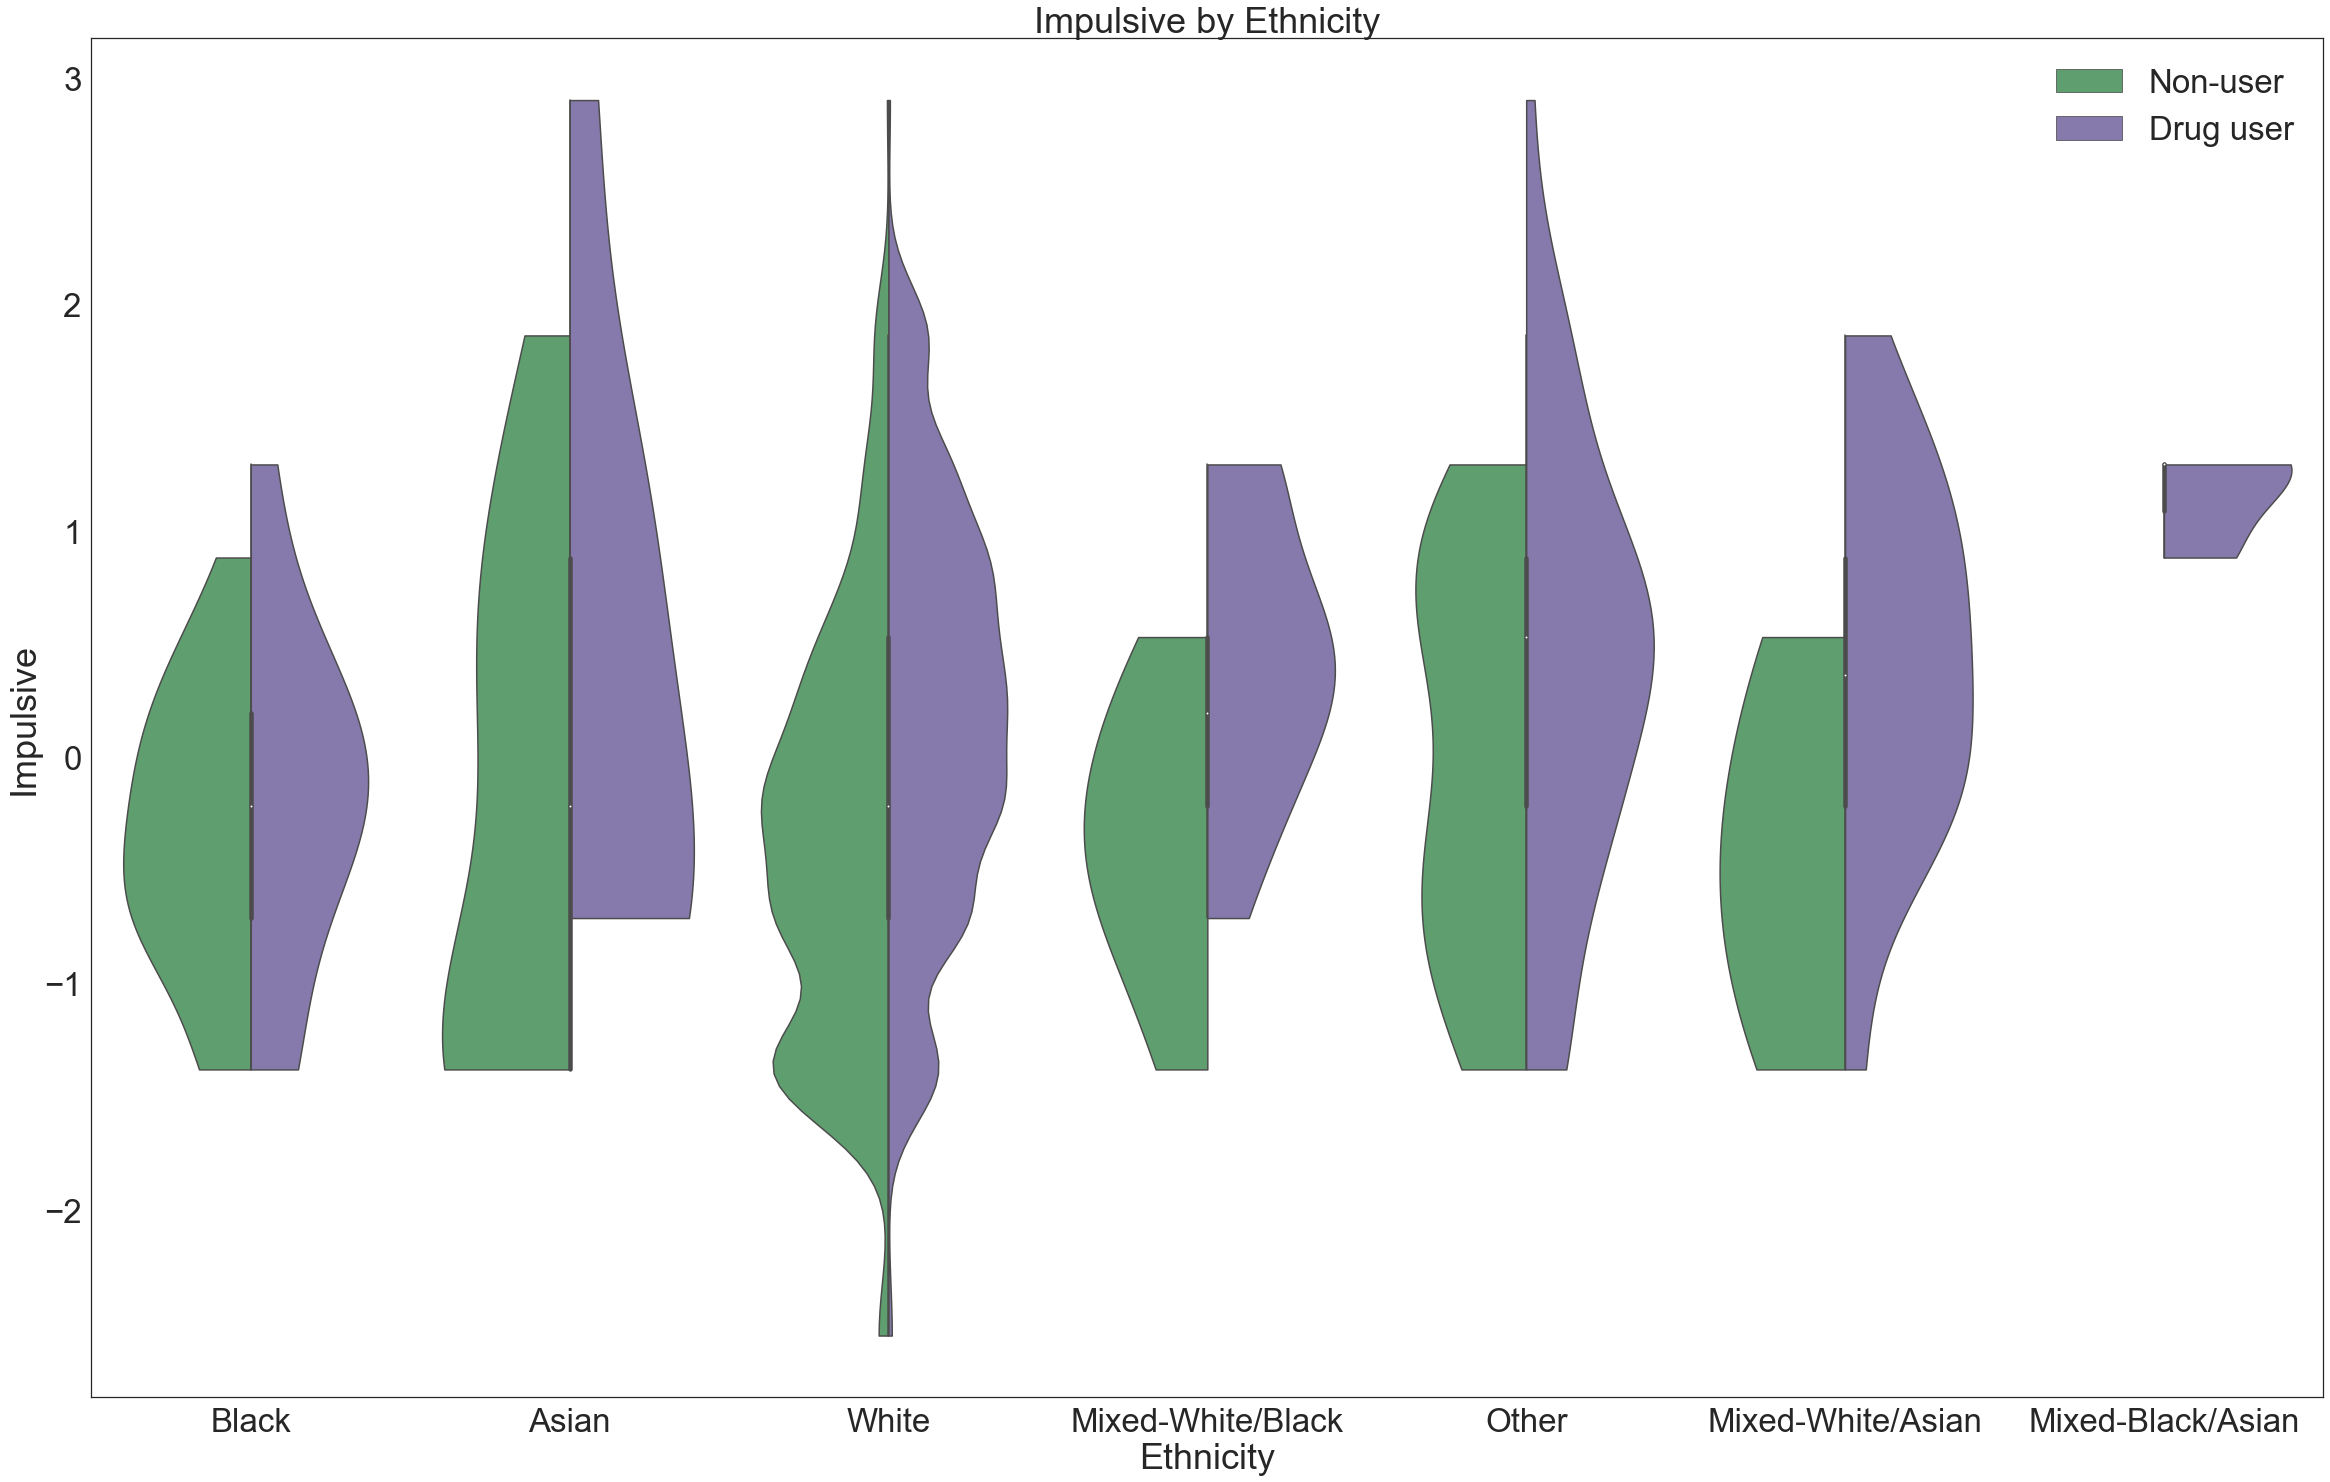

In [291]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Ethnicity", y="Impulsive", data=df,hue='hard',split=True, legend=True, palette=["g","m"], cut=0)
g.set_xticklabels(ethnicity_lb)

g.set_ylabel("Impulsive")
g.set_xlabel("Ethnicity")
g.set_title("Impulsive by Ethnicity")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Impulsive by ethnicity.png")
plt.show()

### SS by User

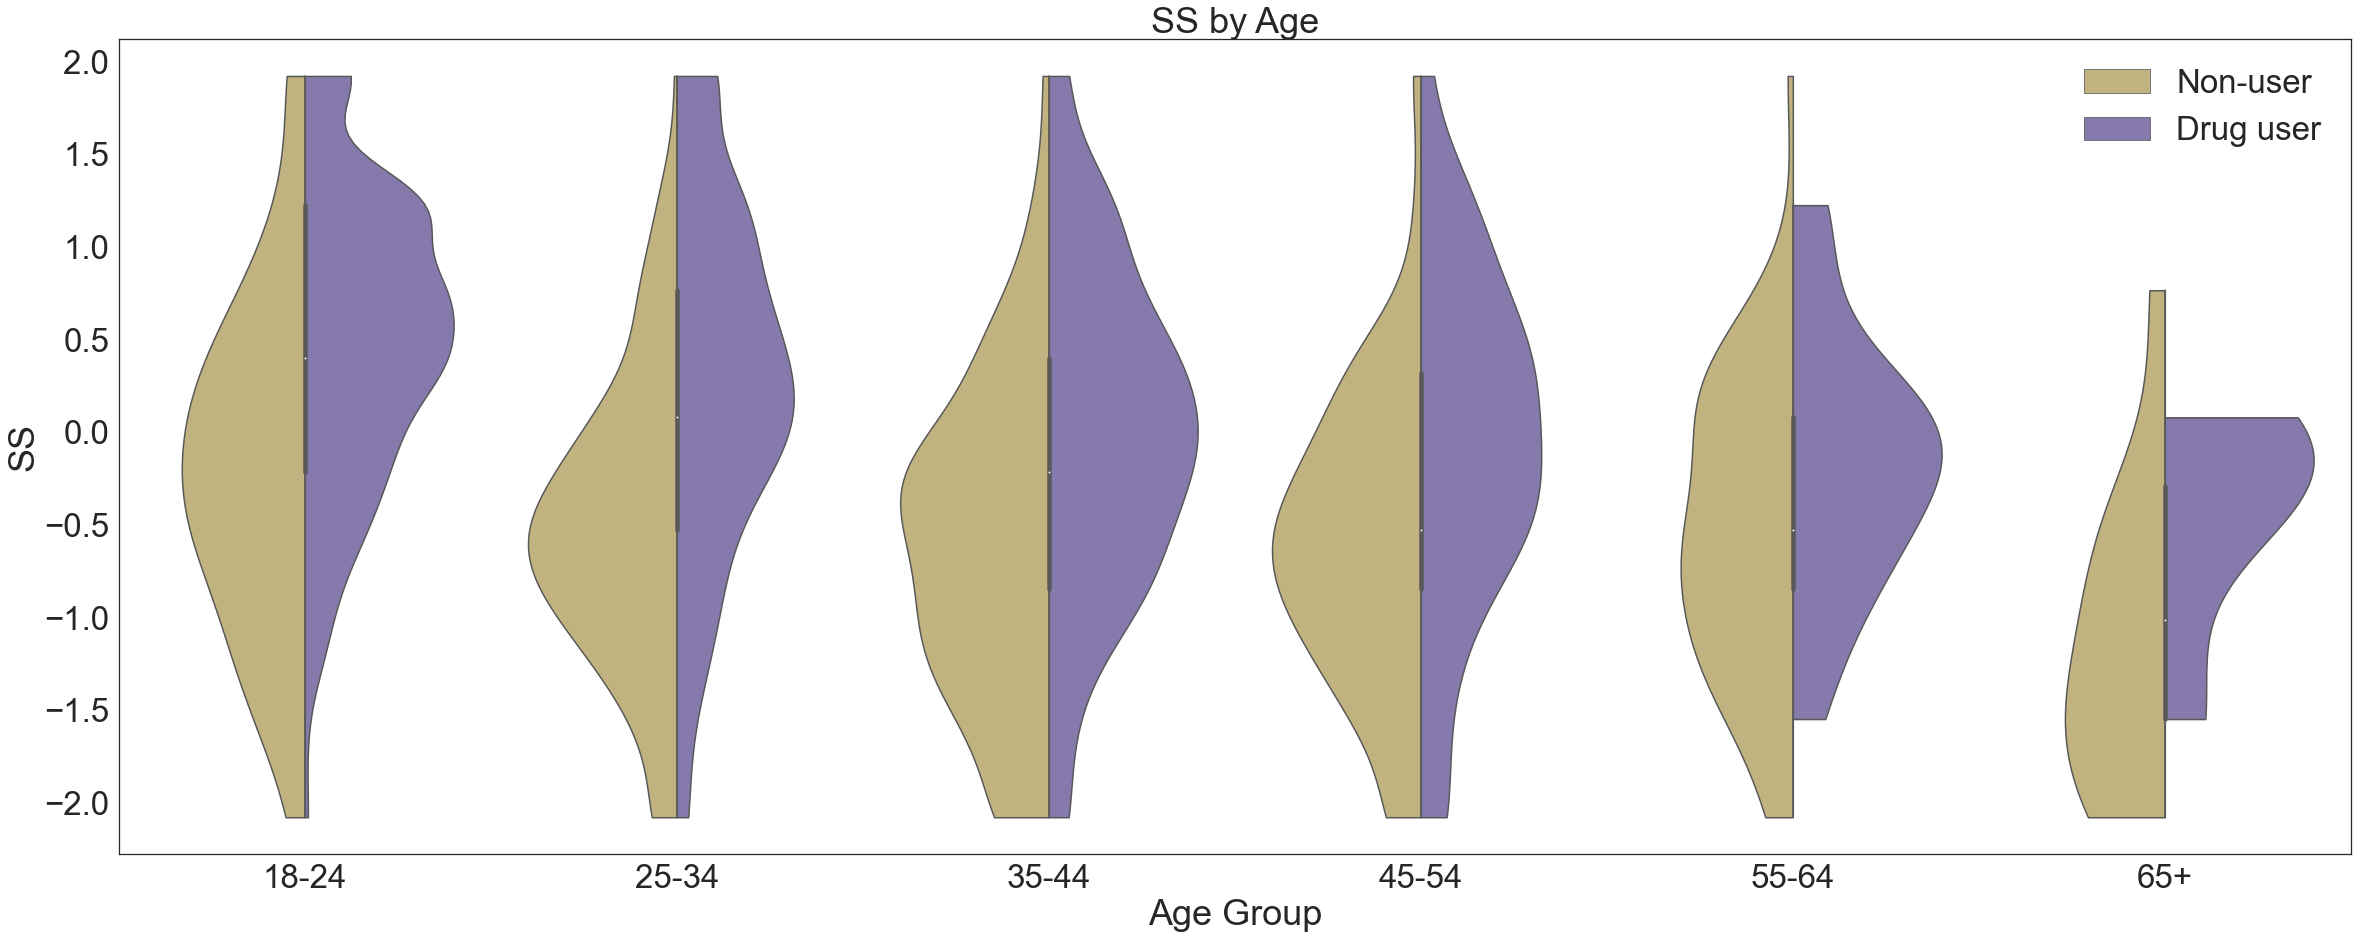

In [292]:
f, ax = plt.subplots(figsize=(40, 15))

g=sns.violinplot(x="Age", y="SS", data=df,hue='hard',split=True, legend=True, palette=["y","m"], cut=0)
g.set_xticklabels(age_lb)

g.set_ylabel("SS")
g.set_xlabel("Age Group")
g.set_title("SS by Age")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin SS by age.png")
plt.show()

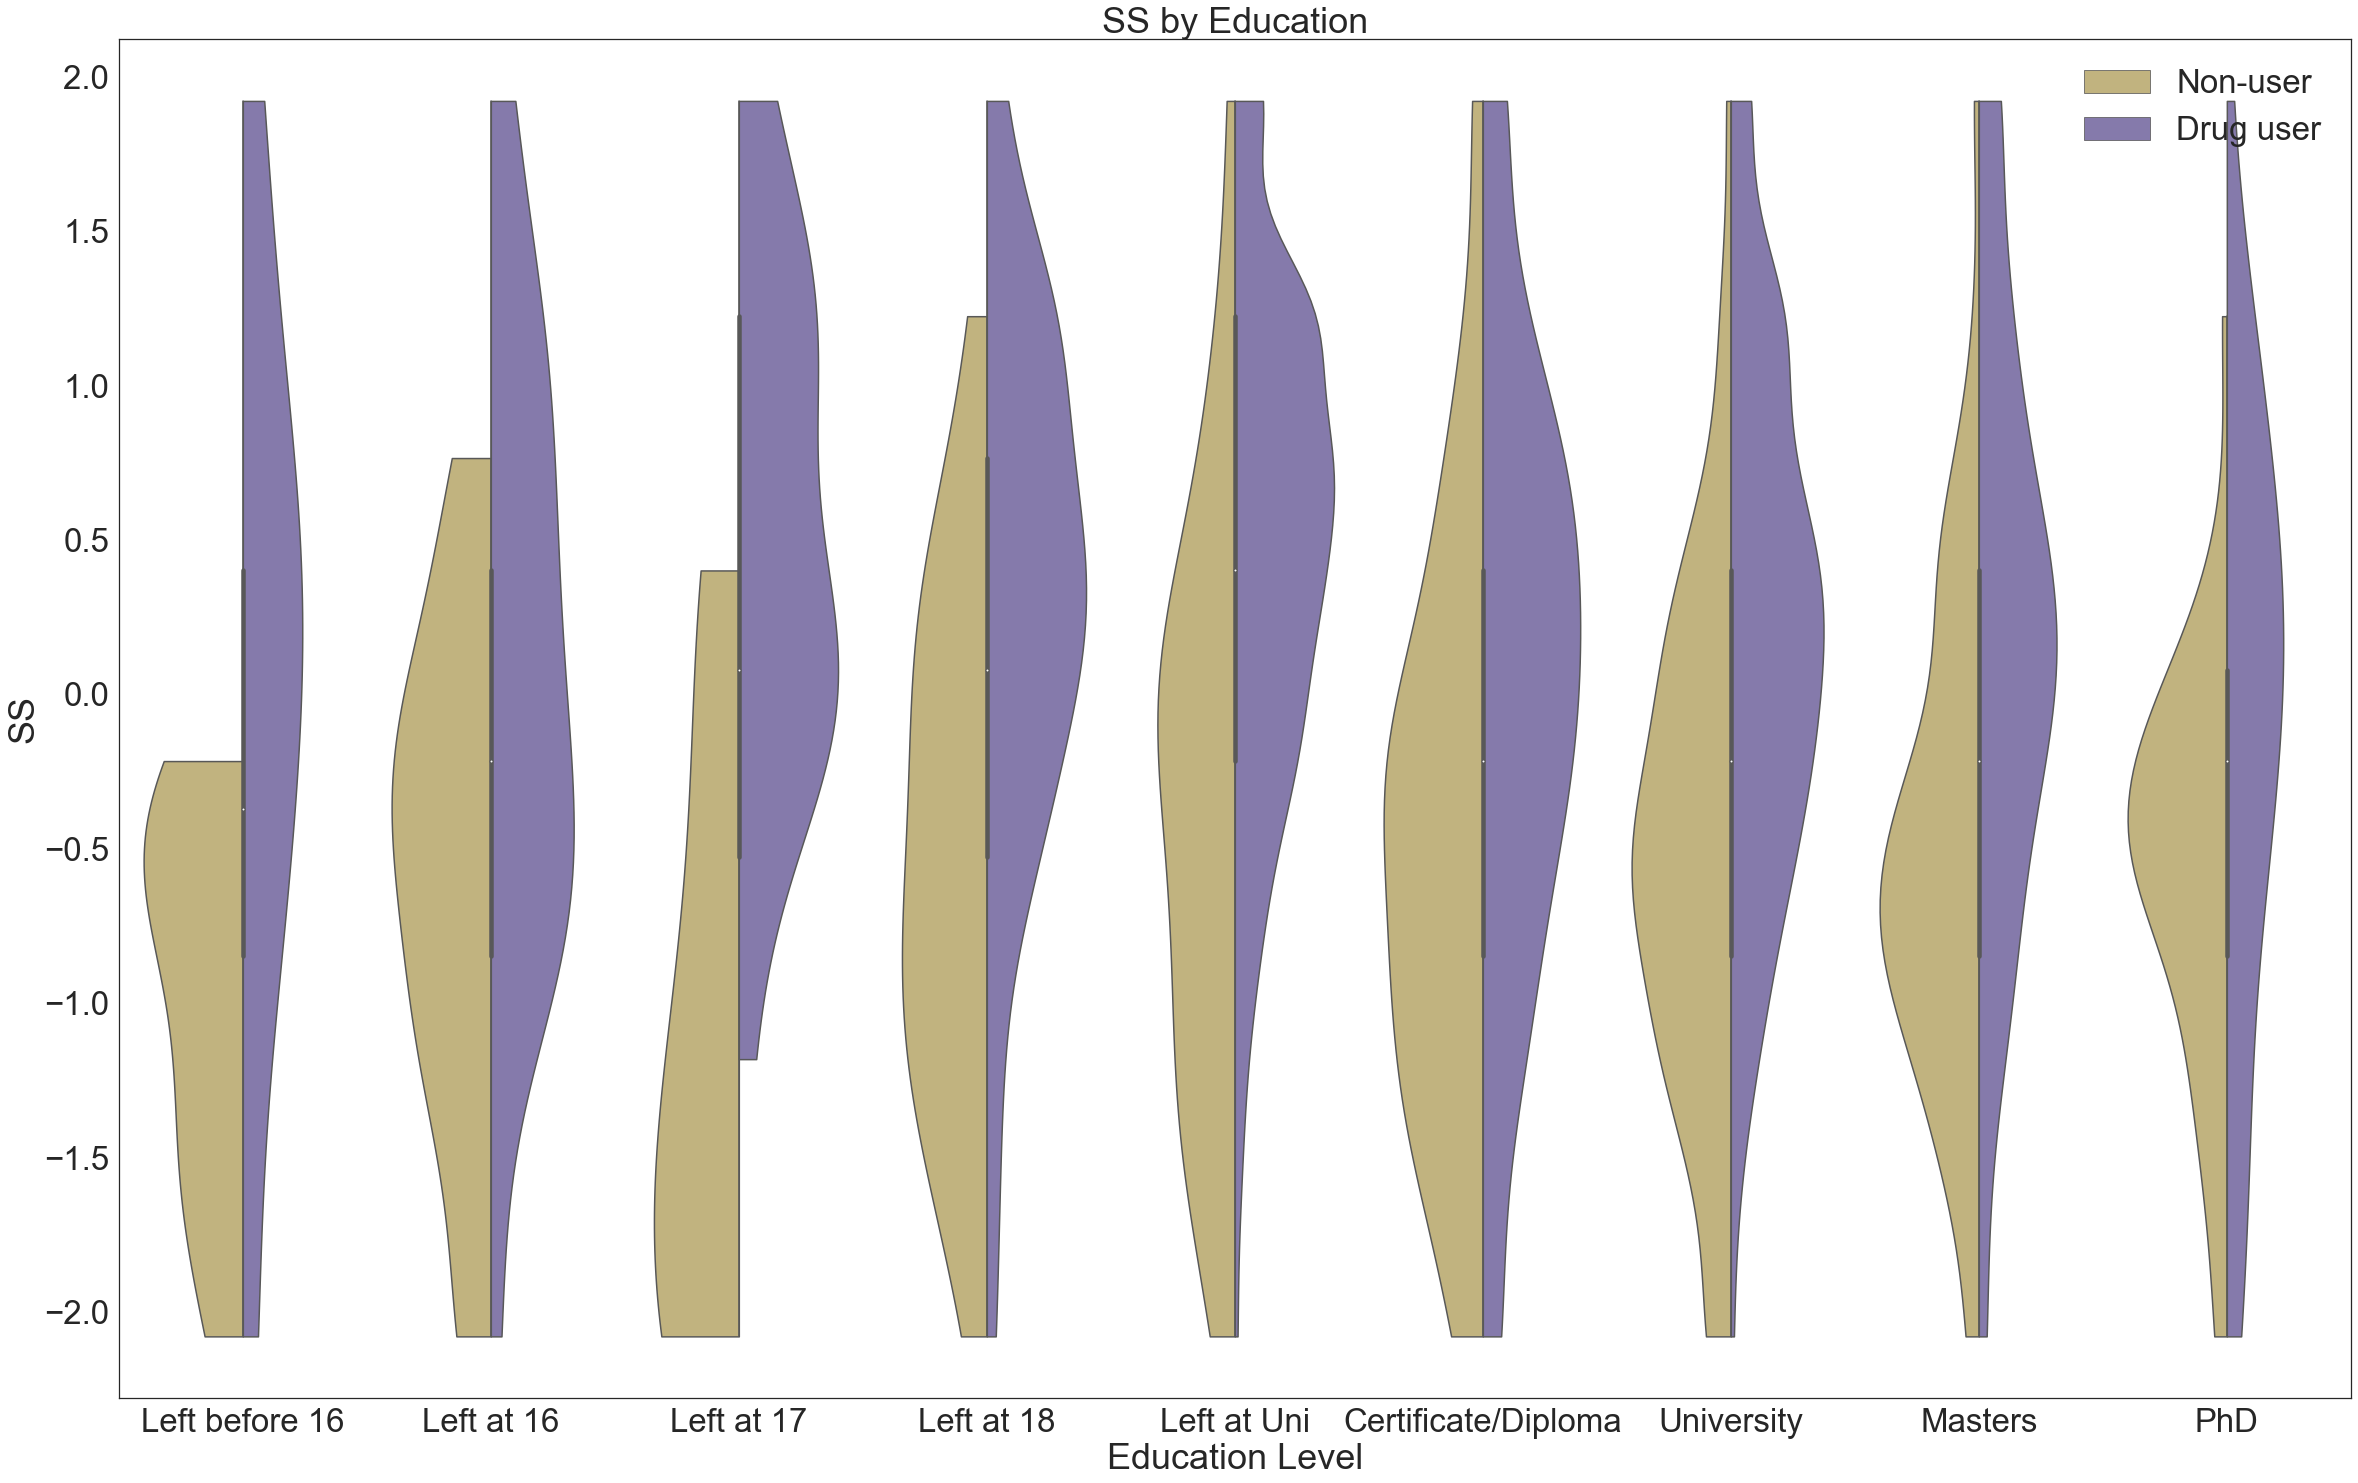

In [293]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Education", y="SS", data=df,hue='hard',split=True, legend=True, palette=["y","m"], cut=0)
g.set_xticklabels(education_lb)

g.set_ylabel("SS")
g.set_xlabel("Education Level")
g.set_title("SS by Education")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin SS by education.png")
plt.show()

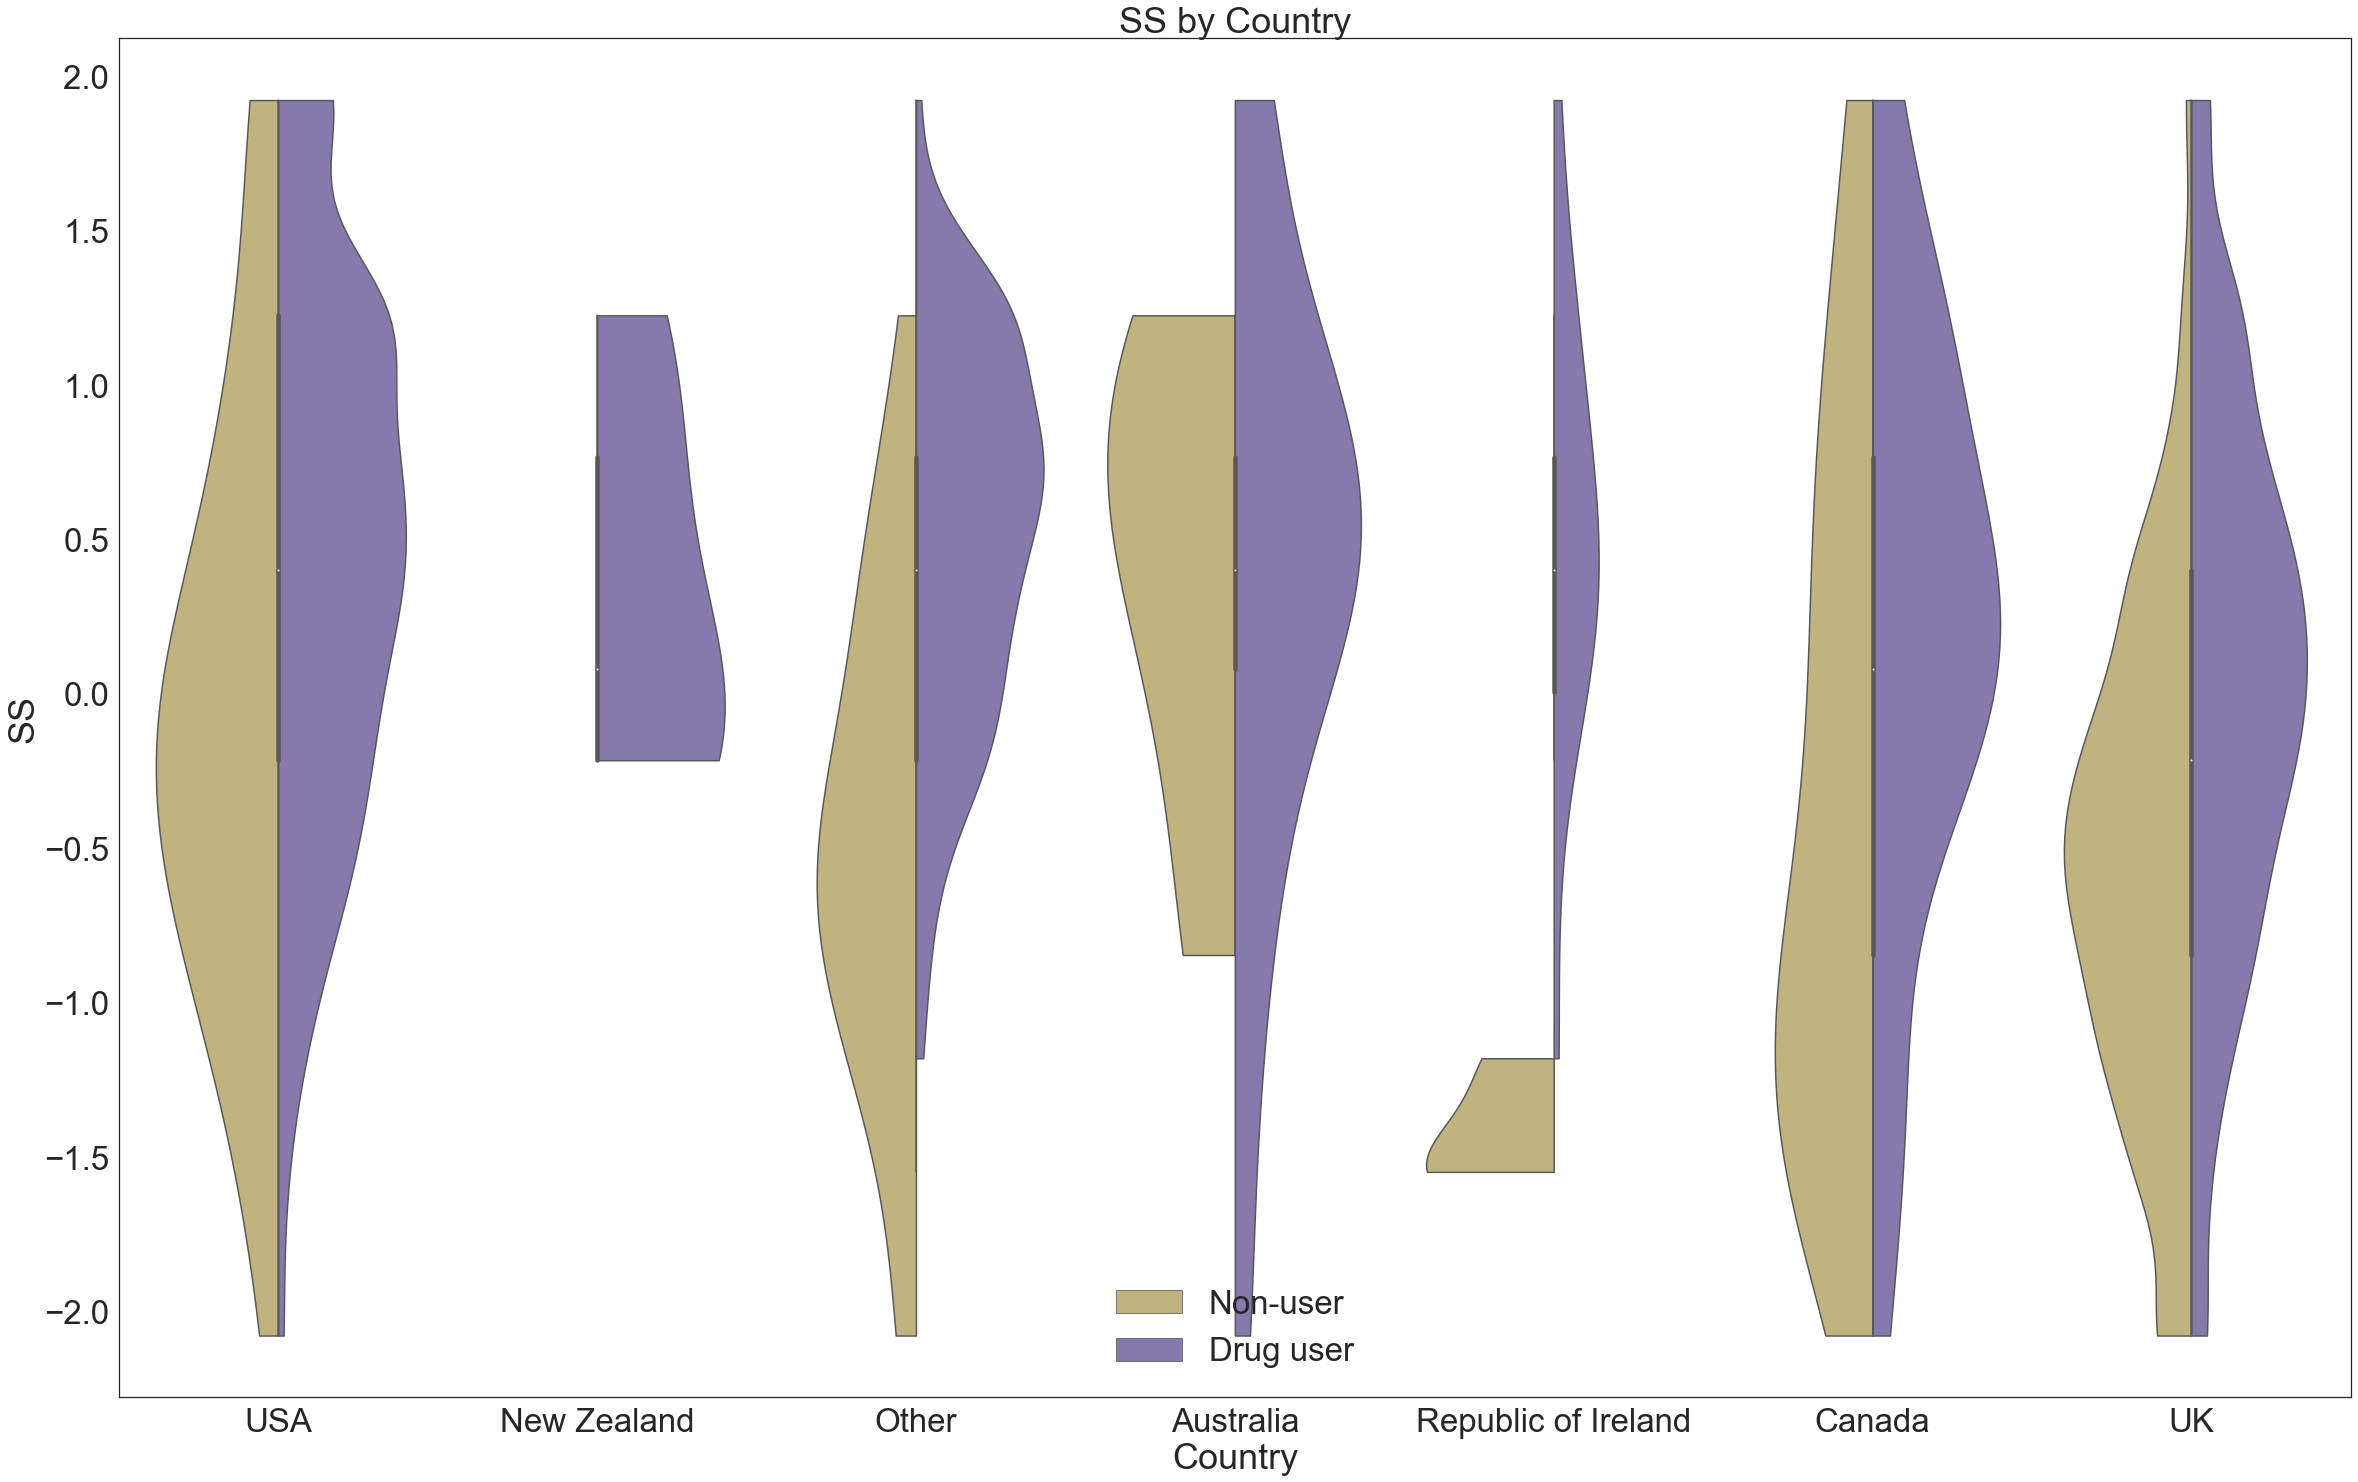

In [294]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Country", y="SS", data=df,hue='hard',split=True, legend=True, palette=["y","m"], cut=0)
g.set_xticklabels(country_lb)

g.set_ylabel("SS")
g.set_xlabel("Country")
g.set_title("SS by Country")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin SS by country.png")
plt.show()

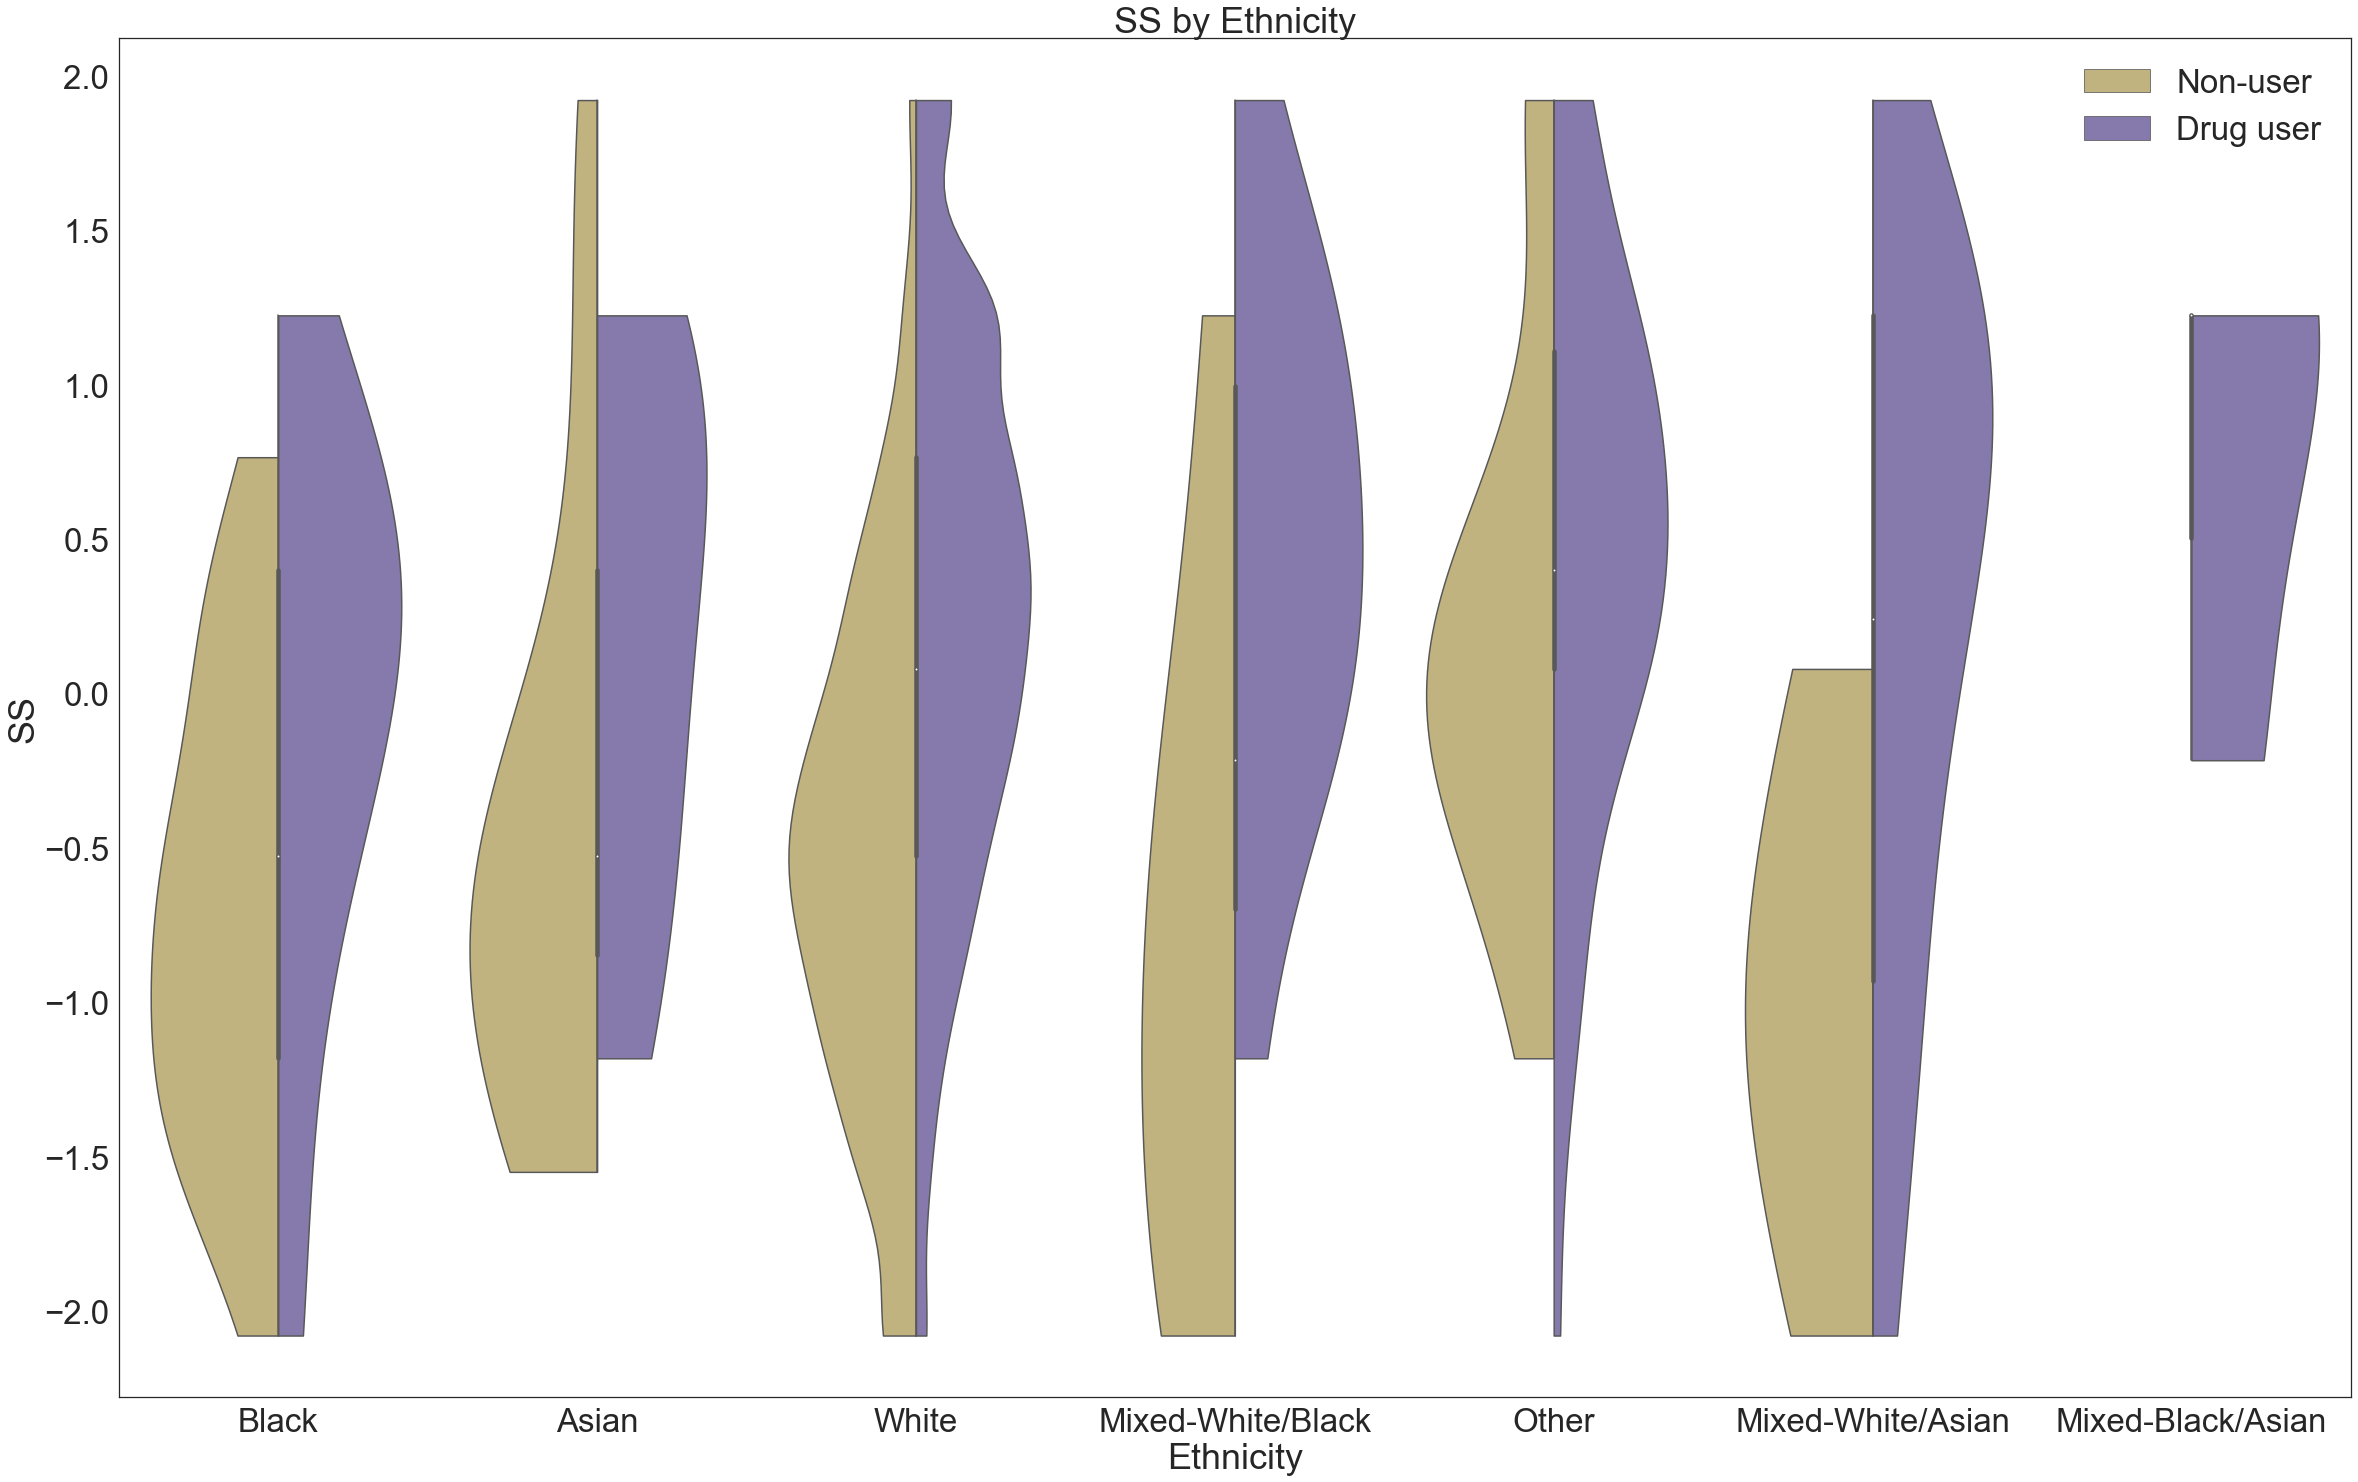

In [296]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Ethnicity", y="SS", data=df,hue='hard',split=True, legend=True, palette=["y","m"], cut=0)
g.set_xticklabels(ethnicity_lb)

g.set_ylabel("SS")
g.set_xlabel("Ethnicity")
g.set_title("SS by Ethnicity")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin SS by ethnicity.png")
plt.show()

In [433]:
# Drug Type vs Non-user/User
pivot=[]
for c in cat:
    x=df[c].value_counts()
    pivot.append(pd.Series(data=[c, x[x.index<2].sum(), x[x.index>=2].sum()]))
#pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User

In [436]:
x=pd.DataFrame(data=pivot)
x.set_index(0, drop=True, inplace=True)
x.columns=["Non-user", "User"]

## Hypothesis Testing
### Variety of Drug Type Used

In [131]:
# age
pg.welch_anova(dv='drug_use', between='Age', data=df)

Source  ddof1       ddof2           F         p-unc       np2
0    Age      5  209.552404  116.258358  1.911703e-58  0.140557

In [132]:
pair=pg.pairwise_gameshowell(data=df, dv='drug_use',between='Age')
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
0  -0.95197 -0.07854  3.368917  2.633333  0.735583  0.106851  two-sided   
1  -0.95197  0.49788  3.368917  1.673239  1.695677  0.103455  two-sided   
2  -0.95197  1.09449  3.368917  1.132653  2.236264  0.099898  two-sided   
3  -0.95197  1.82213  3.368917  0.935484  2.433433  0.131440  two-sided   
4  -0.95197  2.59171  3.368917  0.277778  3.091139  0.102274  two-sided   
5  -0.07854  0.49788  2.633333  1.673239  0.960094  0.114023  two-sided   
6  -0.07854  1.09449  2.633333  1.132653  1.500680  0.110806  two-sided   
7  -0.07854  1.82213  2.633333  0.935484  1.697849  0.139910  two-sided   
8  -0.07854  2.59171  2.633333  0.277778  2.355556  0.112952  two-sided   
9   0.49788  1.09449  1.673239  1.132653  0.540586  0.107535  two-sided   
10  0.49788  1.82213  1.673239  0.935484  0.737756  0.137333  two-sided   
11  0.49788  2.59171  1.673239  0.277778  1.395462  0.109745  two-sided   
13  1.09449  2.59171  1.132653  0.277778  0.854875  0.106399  two-sided   
14  1.82213  2.59171  0.935484  0.277778  0.657706  0.136446  two-sided   

            T          df      pval    hedges  
0    4.867864  996.059943  0.001000  0.294024  
1   11.589875  822.322933  0.001000  0.767046  
2   15.828880  749.069421  0.001000  1.115144  
3   13.091164  166.695331  0.001000  1.451713  
4   21.371743   52.583318  0.001000  5.102175  
5    5.953974  825.360349  0.001000  0.416413  
6    9.576548  759.628996  0.001000  0.708538  
7    8.580969  206.446666  0.001000  0.970913  
8   14.746288   75.843137  0.001000  3.534948  
9    3.554685  646.342907  0.005187  0.279983  
10   3.798584  190.787782  0.002196  0.441747  
11   8.991211   67.323850  0.001000  2.167918  
13   5.681324   59.657338  0.001000  1.376145  
14   3.408446   91.073335  0.009684  0.871635

In [133]:
# education
pg.welch_anova(dv='drug_use', between='Education', data=df)

Source  ddof1       ddof2          F         p-unc       np2
0  Education      8  247.968774  27.665282  1.606804e-30  0.108827

In [134]:
pair=pg.pairwise_gameshowell(data=df, dv='drug_use',between='Education')
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
9  -1.73790 -1.22751  1.959184  3.191919 -1.232736  0.247924  two-sided   
10 -1.73790 -0.61113  1.959184  3.495030 -1.535846  0.187474  two-sided   
22 -1.22751 -0.05921  3.191919  1.829630  1.362290  0.202399  two-sided   
23 -1.22751  0.45468  3.191919  1.966527  1.225392  0.193821  two-sided   
24 -1.22751  1.16365  3.191919  1.409894  1.782025  0.198483  two-sided   
25 -1.22751  1.98437  3.191919  1.707865  1.484054  0.243350  two-sided   
26 -0.61113 -0.05921  3.495030  1.829630  1.665400  0.121020  two-sided   
27 -0.61113  0.45468  3.495030  1.966527  1.528503  0.106052  two-sided   
28 -0.61113  1.16365  3.495030  1.409894  2.085136  0.114349  two-sided   
29 -0.61113  1.98437  3.495030  1.707865  1.787165  0.181382  two-sided   

            T          df      pval    hedges  
9   -3.515899  194.685995  0.014071 -0.499072  
10  -5.792835  138.135908  0.001000 -0.638833  
22   4.759327  155.079966  0.001000  0.558046  
23   4.470527  133.227052  0.001000  0.493001  
24   6.348568  144.800397  0.001000  0.739840  
25   4.312243  185.818736  0.001000  0.627354  
26   9.730791  599.711744  0.001000  0.733414  
27  10.191400  978.954782  0.001000  0.650485  
28  12.893957  671.598138  0.001000  0.957204  
29   6.967142  128.714281  0.001000  0.800173

In [135]:
# country
pg.welch_anova(dv='drug_use', between='Country', data=df)

Source  ddof1      ddof2          F         p-unc       np2
0  Country      6  47.186287  95.670353  1.050801e-24  0.256625

In [136]:
pair=pg.pairwise_gameshowell(data=df, dv='drug_use',between='Country')  
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
1  -0.57009 -0.28519  4.068966  2.610169  1.458796  0.162847  two-sided   
4  -0.57009  0.24923  4.068966  2.850575  1.218391  0.211879  two-sided   
5  -0.57009  0.96082  4.068966  1.316092  2.752874  0.081250  two-sided   
14 -0.28519  0.96082  2.610169  1.316092  1.294078  0.152976  two-sided   
17 -0.09765  0.96082  3.365385  1.316092  2.049293  0.207012  two-sided   
19  0.21128  0.96082  3.150000  1.316092  1.833908  0.303215  two-sided   
20  0.24923  0.96082  2.850575  1.316092  1.534483  0.204390  two-sided   

            T          df      pval    hedges  
1    6.334303  173.531374  0.001000  0.641810  
4    4.066149  107.897373  0.001145  0.468539  
5   23.957866  950.577135  0.001000  1.260950  
14   5.981658  136.477359  0.001000  0.580567  
17   6.999930   55.408646  0.001000  0.993915  
19   4.276730   19.740853  0.001203  0.964740  
20   5.308692   93.632578  0.001000  0.591998

In [137]:
# ethnicity
pg.welch_anova(dv='drug_use', between='Ethnicity', data=df)

Source  ddof1      ddof2         F     p-unc       np2
0  Ethnicity      6  23.430186  9.991659  0.000017  0.018404

In [138]:
pair=pg.pairwise_gameshowell(data=df, dv='drug_use',between='Ethnicity')  
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
1 -1.10702 -0.31685  0.818182  2.363265 -1.545083  0.169287  two-sided   
3 -1.10702  0.11440  0.818182  3.209677 -2.391496  0.287242  two-sided   
4 -1.10702  0.12600  0.818182  3.650000 -2.831818  0.488053  two-sided   
6 -0.50212 -0.31685  1.000000  2.363265 -1.363265  0.248420  two-sided   
8 -0.50212  0.11440  1.000000  3.209677 -2.209677  0.339945  two-sided   
9 -0.50212  0.12600  1.000000  3.650000 -2.650000  0.520817  two-sided   

          T         df      pval    hedges  
1 -6.453751  36.194348  0.001000 -1.133724  
3 -5.887169  92.873910  0.001000 -1.258315  
4 -4.102830  23.925024  0.001897 -1.145469  
6 -3.880416  25.389382  0.003973 -0.781382  
8 -4.596270  66.570478  0.001000 -1.079292  
9 -3.597874  29.445154  0.009433 -1.060426

### NScore

In [213]:
# age
pg.welch_anova(dv='Nscore', between='Age', data=df)

Source  ddof1       ddof2         F         p-unc       np2
0    Age      5  158.612159  8.674767  2.733635e-07  0.021567

In [214]:
pair=pg.pairwise_gameshowell(data=df, dv='Nscore',between='Age')
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
2  -0.95197  1.09449  0.116647 -0.204961  0.321608  0.047222  two-sided   
3  -0.95197  1.82213  0.116647 -0.377074  0.493722  0.073529  two-sided   
6  -0.07854  1.09449  0.070251 -0.204961  0.275212  0.049503  two-sided   
7  -0.07854  1.82213  0.070251 -0.377074  0.447326  0.075014  two-sided   
10  0.49788  1.82213 -0.015900 -0.377074  0.361174  0.076547  two-sided   

           T          df      pval    hedges  
2   4.815804  645.498082  0.001000  0.339273  
3   4.747983  128.326688  0.001000  0.526516  
6   3.931196  671.539628  0.001219  0.290856  
7   4.216640  138.260657  0.001000  0.477101  
10  3.336379  148.373587  0.011783  0.387996

In [215]:
# education
pg.welch_anova(dv='Nscore', between='Education', data=df)

Source  ddof1      ddof2         F     p-unc       np2
0  Education      8  249.76353  3.912661  0.000226  0.017943

In [216]:
pair=pg.pairwise_gameshowell(data=df, dv='Nscore',between='Education')
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
19 -1.43719  1.16365  0.540247 -0.171995  0.712241  0.146583  two-sided   
20 -1.43719  1.98437  0.540247 -0.302828  0.843075  0.159252  two-sided   
29 -0.61113  1.98437  0.124096 -0.302828  0.426924  0.081868  two-sided   

           T          df      pval    hedges  
19  3.435800   32.947093  0.025132  0.668283  
20  3.743403   44.809225  0.008428  0.795226  
29  3.687431  126.919639  0.008050  0.423500

In [217]:
# country
pg.welch_anova(dv='Nscore', between='Country', data=df)

Source  ddof1      ddof2        F     p-unc       np2
0  Country      6  47.311106  6.38008  0.000057  0.022321

In [218]:
pair=pg.pairwise_gameshowell(data=df, dv='Nscore',between='Country')  
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
5 -0.57009  0.96082  0.217179 -0.113275  0.330454  0.037546  two-sided   

        T           df   pval    hedges  
5  6.2235  1029.408974  0.001  0.327555

### EScore

In [221]:
# age
pg.welch_anova(dv='Escore', between='Age', data=df)

Source  ddof1       ddof2         F     p-unc       np2
0    Age      5  164.005827  3.114353  0.010316  0.004588

In [222]:
pair=pg.pairwise_gameshowell(data=df, dv='Escore',between='Age')
pair[pair.pval<0.05]

A        B   mean(A)  mean(B)      diff        se       tail  \
4  -0.95197  2.59171  0.013748 -0.44466  0.458408  0.100313  two-sided   
8  -0.07854  2.59171  0.058146 -0.44466  0.502806  0.101454  two-sided   
13  1.09449  2.59171  0.017184 -0.44466  0.461844  0.102596  two-sided   

           T         df      pval    hedges  
4   3.231328  20.487519  0.023609  0.771430  
8   3.504405  21.430303  0.010364  0.840068  
13  3.183092  22.394707  0.026218  0.771017

In [223]:
# education
pg.welch_anova(dv='Escore', between='Education', data=df)

Source  ddof1       ddof2         F     p-unc       np2
0  Education      8  252.503181  4.201339  0.000096  0.016681

In [224]:
pair=pg.pairwise_gameshowell(data=df, dv='Escore',between='Education')
pair[pair.pval<0.05]

A        B  mean(A)   mean(B)      diff        se       tail  \
19 -1.43719  1.16365 -0.46388  0.201926 -0.665807  0.138955  two-sided   
20 -1.43719  1.98437 -0.46388  0.207116 -0.670996  0.148471  two-sided   

           T         df      pval    hedges  
19 -3.388117  32.989999  0.028929 -0.659008  
20 -3.195684  42.257204  0.047089 -0.678872

In [225]:
# country
pg.welch_anova(dv='Escore', between='Country', data=df)

Source  ddof1      ddof2         F     p-unc       np2
0  Country      6  48.143674  6.455138  0.000048  0.016588

In [226]:
pair=pg.pairwise_gameshowell(data=df, dv='Escore',between='Country')  
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
5  -0.57009  0.96082 -0.146883  0.096193 -0.243076  0.039018  two-sided   
7  -0.46841 -0.09765 -0.685344  0.067104 -0.752448  0.162831  two-sided   
8  -0.46841  0.21128 -0.685344  0.331121 -1.016465  0.216910  two-sided   
10 -0.46841  0.96082 -0.685344  0.096193 -0.781537  0.134674  two-sided   

           T          df      pval    hedges  
5  -4.405171  972.052488  0.001000 -0.231853  
7  -3.267571    8.786685  0.044965 -1.508987  
8  -3.313584   17.885746  0.027390 -1.602172  
10 -4.103467    4.191060  0.016305 -1.838197

### OScore

In [229]:
# age
pg.welch_anova(dv='Oscore', between='Age', data=df)

Source  ddof1       ddof2          F         p-unc       np2
0    Age      5  157.657204  24.743167  2.376281e-18  0.062409

In [230]:
pair=pg.pairwise_gameshowell(data=df, dv='Oscore',between='Age')
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
0 -0.95197 -0.07854  0.315165 -0.032590  0.347755  0.043015  two-sided   
1 -0.95197  0.49788  0.315165 -0.270379  0.585544  0.044253  two-sided   
2 -0.95197  1.09449  0.315165 -0.225633  0.540797  0.044733  two-sided   
3 -0.95197  1.82213  0.315165 -0.177488  0.492652  0.074102  two-sided   
4 -0.95197  2.59171  0.315165 -0.685602  1.000766  0.218375  two-sided   
5 -0.07854  0.49788 -0.032590 -0.270379  0.237789  0.048287  two-sided   

          T          df      pval    hedges  
0  5.716651  995.776162  0.001000  0.345291  
1  9.356177  757.759820  0.001000  0.619215  
2  8.548461  635.775047  0.001000  0.602239  
3  4.701037  122.383601  0.001000  0.521310  
4  3.240521   17.538882  0.024454  0.773625  
5  3.482112  801.370242  0.006709  0.243534

In [231]:
# education
pg.welch_anova(dv='Oscore', between='Education', data=df)

Source  ddof1       ddof2          F         p-unc       np2
0  Education      8  250.060736  17.393925  1.544212e-20  0.066481

In [232]:
pair=pg.pairwise_gameshowell(data=df, dv='Oscore',between='Education')
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
9  -1.73790 -1.22751 -0.638455 -0.089370 -0.549085  0.106551  two-sided   
10 -1.73790 -0.61113 -0.638455  0.307473 -0.945928  0.069289  two-sided   
11 -1.73790 -0.05921 -0.638455 -0.292339 -0.346117  0.074995  two-sided   
12 -1.73790  0.45468 -0.638455 -0.028938 -0.609518  0.069649  two-sided   
13 -1.73790  1.16365 -0.638455  0.001153 -0.639609  0.071430  two-sided   
14 -1.73790  1.98437 -0.638455  0.249240 -0.887695  0.091163  two-sided   
16 -1.43719 -0.61113 -0.320551  0.307473 -0.628023  0.110577  two-sided   
20 -1.43719  1.98437 -0.320551  0.249240 -0.569790  0.125447  two-sided   
26 -0.61113 -0.05921  0.307473 -0.292339  0.599811  0.052238  two-sided   
27 -0.61113  0.45468  0.307473 -0.028938  0.336410  0.044221  two-sided   
28 -0.61113  1.16365  0.307473  0.001153  0.306319  0.046975  two-sided   
32 -0.05921  1.98437 -0.292339  0.249240 -0.541578  0.078984  two-sided   

           T          df      pval    hedges  
9  -3.643891  177.197301  0.009057 -0.517240  
10 -9.653416  149.206130  0.001000 -1.064577  
11 -3.263417  192.420242  0.032217 -0.384070  
12 -6.188082  152.039839  0.001000 -0.685287  
13 -6.331717  164.506831  0.001000 -0.740657  
14 -6.885434  182.256099  0.001000 -1.004101  
16 -4.016012   32.918750  0.003760 -0.765866  
20 -3.211724   51.960772  0.043287 -0.682279  
26  8.119231  550.157653  0.001000  0.611950  
27  5.379337  976.444021  0.001000  0.343346  
28  4.610972  659.446237  0.001000  0.342303  
32 -4.848480  163.516310  0.001000 -0.591374

In [233]:
# country
pg.welch_anova(dv='Oscore', between='Country', data=df)

Source  ddof1      ddof2          F         p-unc       np2
0  Country      6  47.727651  40.453656  4.382874e-17  0.117543

In [234]:
pair=pg.pairwise_gameshowell(data=df, dv='Oscore',between='Country')  
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
4  -0.57009  0.24923  0.449361 -0.083659  0.533019  0.089927  two-sided   
5  -0.57009  0.96082  0.449361 -0.289304  0.738664  0.035020  two-sided   
13 -0.28519  0.24923  0.388739 -0.083659  0.472398  0.097993  two-sided   
14 -0.28519  0.96082  0.388739 -0.289304  0.678043  0.052366  two-sided   
17 -0.09765  0.96082  0.164134 -0.289304  0.453438  0.099097  two-sided   

            T           df      pval    hedges  
4    4.191205   105.944569  0.001000  0.482949  
5   14.914879  1110.348468  0.001000  0.785000  
13   3.408769   139.241216  0.012683  0.479915  
14   9.155752   162.351974  0.001000  0.888638  
17   3.235489    55.636273  0.024732  0.459405

In [235]:
# ethnicity
pg.welch_anova(dv='Oscore', between='Ethnicity', data=df)

Source  ddof1      ddof2         F    p-unc       np2
0  Ethnicity      6  23.237764  4.822009  0.00249  0.009229

In [236]:
pair=pg.pairwise_gameshowell(data=df, dv='Oscore',between='Ethnicity')  
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
1 -1.10702 -0.31685 -0.472086 -0.004957 -0.467129  0.072471  two-sided   
3 -1.10702  0.11440 -0.472086  0.343342 -0.815428  0.109031  two-sided   

          T         df   pval    hedges  
1 -4.557833  35.877632  0.001 -0.800670  
3 -5.288353  90.846447  0.001 -1.130325

### AScore

In [237]:
# age
pg.welch_anova(dv='Ascore', between='Age', data=df)

Source  ddof1       ddof2        F     p-unc       np2
0    Age      5  158.215625  3.78489  0.002893  0.009745

In [238]:
pair=pg.pairwise_gameshowell(data=df, dv='Ascore',between='Age')
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
2 -0.95197  1.09449 -0.095034  0.197321 -0.292355  0.048333  two-sided   
9  0.49788  1.09449 -0.024349  0.197321 -0.221669  0.052647  two-sided   

          T          df      pval    hedges  
2 -4.277094  593.936412  0.001000 -0.301321  
9 -2.977244  618.362858  0.034968 -0.234501

In [239]:
# education
pg.welch_anova(dv='Ascore', between='Education', data=df)

Source  ddof1       ddof2         F     p-unc       np2
0  Education      8  249.972735  3.280852  0.001407  0.013769

In [241]:
# country
pg.welch_anova(dv='Ascore', between='Country', data=df)

Source  ddof1      ddof2         F     p-unc       np2
0  Country      6  47.261994  8.849977  0.000002  0.029216

In [242]:
pair=pg.pairwise_gameshowell(data=df, dv='Ascore',between='Country')  
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
5  -0.57009  0.96082 -0.168417  0.142034 -0.310451  0.037939  two-sided   
14 -0.28519  0.96082 -0.299548  0.142034 -0.441582  0.064024  two-sided   
20  0.24923  0.96082 -0.282535  0.142034 -0.424569  0.077756  two-sided   

           T           df      pval    hedges  
5  -5.786202  1020.590779  0.001000 -0.304539  
14 -4.876991   145.797524  0.001000 -0.473351  
20 -3.861009    99.621839  0.002609 -0.430560

### CScore

In [245]:
# age
pg.welch_anova(dv='Cscore', between='Age', data=df)

Source  ddof1      ddof2          F         p-unc       np2
0    Age      5  159.70266  15.294375  2.841878e-12  0.040457

In [246]:
pair=pg.pairwise_gameshowell(data=df, dv='Cscore',between='Age')
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
0 -0.95197 -0.07854 -0.265446  0.068363 -0.333809  0.042644  two-sided   
1 -0.95197  0.49788 -0.265446  0.136945 -0.402390  0.046636  two-sided   
2 -0.95197  1.09449 -0.265446  0.216192 -0.481637  0.047000  two-sided   
3 -0.95197  1.82213 -0.265446  0.136921 -0.402366  0.074346  two-sided   
4 -0.95197  2.59171 -0.265446  0.590322 -0.855768  0.141902  two-sided   

          T           df      pval    hedges  
0 -5.535115  1075.678100  0.001000 -0.334326  
1 -6.101142   785.390810  0.001000 -0.403788  
2 -7.246163   664.775267  0.001000 -0.510492  
3 -3.826900   128.671935  0.002051 -0.424375  
4 -4.264339    18.559674  0.001000 -1.018045

In [247]:
# education
pg.welch_anova(dv='Cscore', between='Education', data=df)

Source  ddof1       ddof2          F         p-unc       np2
0  Education      8  249.449489  21.771635  5.024382e-25  0.087843

In [248]:
pair=pg.pairwise_gameshowell(data=df, dv='Cscore',between='Education')
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
10 -1.73790 -0.61113 -0.066840 -0.388384  0.321544  0.072449  two-sided   
13 -1.73790  1.16365 -0.066840  0.369039 -0.435879  0.075102  two-sided   
14 -1.73790  1.98437 -0.066840  0.487473 -0.554313  0.100338  two-sided   
19 -1.43719  1.16365 -0.435462  0.369039 -0.804501  0.155288  two-sided   
20 -1.43719  1.98437 -0.435462  0.487473 -0.922935  0.168943  two-sided   
22 -1.22751 -0.05921 -0.301294  0.088360 -0.389654  0.083503  two-sided   
23 -1.22751  0.45468 -0.301294  0.153949 -0.455243  0.078454  two-sided   
24 -1.22751  1.16365 -0.301294  0.369039 -0.670333  0.081142  two-sided   
25 -1.22751  1.98437 -0.301294  0.487473 -0.788767  0.104935  two-sided   
26 -0.61113 -0.05921 -0.388384  0.088360 -0.476744  0.051967  two-sided   
27 -0.61113  0.45468 -0.388384  0.153949 -0.542333  0.043391  two-sided   
28 -0.61113  1.16365 -0.388384  0.369039 -0.757423  0.048081  two-sided   
29 -0.61113  1.98437 -0.388384  0.487473 -0.875857  0.082092  two-sided   
32 -0.05921  1.98437  0.088360  0.487473 -0.399114  0.086714  two-sided   

            T          df      pval    hedges  
10   3.138282  143.903116  0.047842  0.346089  
13  -4.103952  162.229186  0.001571 -0.480062  
14  -3.906399  178.094903  0.003406 -0.569669  
19  -3.663301   31.412715  0.012694 -0.712533  
20  -3.862913   43.137052  0.005644 -0.820614  
22  -3.299595  167.289045  0.029001 -0.386888  
23  -4.103110  134.744433  0.001623 -0.452483  
24  -5.841582  151.649280  0.001000 -0.680758  
25  -5.315114  184.027049  0.001000 -0.773253  
26  -6.487034  556.880269  0.001000 -0.488931  
27  -8.837964  978.969743  0.001000 -0.564100  
28 -11.139193  642.774446  0.001000 -0.826936  
29  -7.544251  119.096161  0.001000 -0.866454  
32  -3.254572  144.690337  0.033734 -0.396963

In [249]:
# country
pg.welch_anova(dv='Cscore', between='Country', data=df)

Source  ddof1      ddof2          F         p-unc      np2
0  Country      6  47.525843  14.859077  1.776062e-09  0.04841

In [250]:
pair=pg.pairwise_gameshowell(data=df, dv='Cscore',between='Country')  
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
5  -0.57009  0.96082 -0.262325  0.185405 -0.447730  0.036375  two-sided   
14 -0.28519  0.96082 -0.338918  0.185405 -0.524322  0.068053  two-sided   

           T           df   pval    hedges  
5  -8.703656  1066.447421  0.001 -0.458091  
14 -5.447974   141.626667  0.001 -0.528769

### Impulsive

In [253]:
# age
pg.welch_anova(dv='Impulsive', between='Age', data=df)

Source  ddof1       ddof2          F         p-unc       np2
0    Age      5  159.105232  17.173938  1.439963e-13  0.044885

In [254]:
pair=pg.pairwise_gameshowell(data=df, dv='Impulsive',between='Age')
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
0 -0.95197 -0.07854  0.264757 -0.024936  0.289693  0.039396  two-sided   
1 -0.95197  0.49788  0.264757 -0.168902  0.433659  0.043473  two-sided   
2 -0.95197  1.09449  0.264757 -0.247053  0.511810  0.048582  two-sided   
3 -0.95197  1.82213  0.264757 -0.070132  0.334889  0.070603  two-sided   
4 -0.95197  2.59171  0.264757 -0.423812  0.688569  0.139741  two-sided   
6 -0.07854  1.09449 -0.024936 -0.247053  0.222117  0.050630  two-sided   

          T           df      pval    hedges  
0  5.199632  1036.908397  0.001000  0.314063  
1  7.053644   730.642558  0.001000  0.466827  
2  7.449347   534.903249  0.001000  0.524806  
3  3.354014   122.609295  0.011272  0.371935  
4  3.484248    18.237440  0.011939  0.831811  
6  3.102142   581.133321  0.023927  0.229517

In [255]:
# education
pg.welch_anova(dv='Impulsive', between='Education', data=df)

Source  ddof1       ddof2          F         p-unc       np2
0  Education      8  249.433668  10.444997  1.290355e-12  0.042917

In [256]:
pair=pg.pairwise_gameshowell(data=df, dv='Impulsive',between='Education')
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
10 -1.73790 -0.61113 -0.139642  0.294190 -0.433831  0.078435  two-sided   
25 -1.22751  1.98437  0.118793 -0.333060  0.451853  0.091691  two-sided   
26 -0.61113 -0.05921  0.294190 -0.019617  0.313807  0.052849  two-sided   
27 -0.61113  0.45468  0.294190 -0.093530  0.387720  0.041930  two-sided   
28 -0.61113  1.16365  0.294190 -0.201579  0.495769  0.047763  two-sided   
29 -0.61113  1.98437  0.294190 -0.333060  0.627250  0.070237  two-sided   

           T          df      pval    hedges  
10 -3.911052  133.610946  0.003478 -0.431310  
25  3.484626  185.990734  0.015710  0.506950  
26  4.198691  531.914843  0.001000  0.316457  
27  6.538557  978.236898  0.001000  0.417336  
28  7.339603  633.013656  0.001000  0.544867  
29  6.314778  132.134641  0.001000  0.725249

In [257]:
# country
pg.welch_anova(dv='Impulsive', between='Country', data=df)

Source  ddof1      ddof2          F         p-unc       np2
0  Country      6  47.295789  17.356915  1.732540e-10  0.055423

In [258]:
pair=pg.pairwise_gameshowell(data=df, dv='Impulsive',between='Country')  
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
5  -0.57009  0.96082  0.315990 -0.181237  0.497226  0.034287  two-sided   
14 -0.28519  0.96082  0.109104 -0.181237  0.290341  0.058080  two-sided   
17 -0.09765  0.96082  0.237238 -0.181237  0.418474  0.098657  two-sided   

            T           df      pval    hedges  
5   10.254272  1132.044910  0.001000  0.539703  
14   3.534793   151.597210  0.008170  0.343080  
17   2.999350    55.615305  0.049024  0.425875

In [259]:
# ethnicity
pg.welch_anova(dv='Impulsive', between='Ethnicity', data=df)

Source  ddof1      ddof2          F     p-unc       np2
0  Ethnicity      6  24.013827  12.124741  0.000003  0.007751

In [260]:
pair=pg.pairwise_gameshowell(data=df, dv='Impulsive',between='Ethnicity')  
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
3  -1.10702  0.11440 -0.291656  0.275442 -0.567098  0.121086  two-sided   
5  -1.10702  1.90725 -0.291656  1.155183 -1.446839  0.127851  two-sided   
10 -0.50212  1.90725 -0.058596  1.155183 -1.213779  0.196763  two-sided   
14 -0.31685  1.90725 -0.004244  1.155183 -1.159427  0.098254  two-sided   
17 -0.22166  1.90725  0.143228  1.155183 -1.011955  0.153735  two-sided   
19  0.11440  1.90725  0.275442  1.155183 -0.879741  0.130738  two-sided   
20  0.12600  1.90725  0.251948  1.155183 -0.903235  0.168785  two-sided   

           T         df      pval    hedges  
3  -3.311676  86.478346  0.018317 -0.707833  
5  -8.002034   5.861789  0.001000 -4.718177  
10 -4.361949  18.758289  0.001000 -2.587568  
14 -8.344067   2.114812  0.001000 -4.819553  
17 -4.654521  10.092905  0.001000 -2.781861  
19 -4.758166   6.486132  0.001625 -2.779187  
20 -3.784017  12.827364  0.009027 -2.258153

### SS

In [261]:
# age
pg.welch_anova(dv='SS', between='Age', data=df)

Source  ddof1       ddof2          F         p-unc      np2
0    Age      5  159.214605  53.527308  2.204679e-32  0.11748

In [262]:
pair=pg.pairwise_gameshowell(data=df, dv='SS',between='Age')
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
0  -0.95197 -0.07854  0.395553  0.009599  0.385954  0.039588  two-sided   
1  -0.95197  0.49788  0.395553 -0.298946  0.694499  0.042408  two-sided   
2  -0.95197  1.09449  0.395553 -0.373103  0.768656  0.043940  two-sided   
3  -0.95197  1.82213  0.395553 -0.400817  0.796370  0.062648  two-sided   
4  -0.95197  2.59171  0.395553 -0.965851  1.361404  0.141093  two-sided   
5  -0.07854  0.49788  0.009599 -0.298946  0.308545  0.047078  two-sided   
6  -0.07854  1.09449  0.009599 -0.373103  0.382702  0.048462  two-sided   
7  -0.07854  1.82213  0.009599 -0.400817  0.410416  0.065899  two-sided   
8  -0.07854  2.59171  0.009599 -0.965851  0.975450  0.142566  two-sided   
11  0.49788  2.59171 -0.298946 -0.965851  0.666905  0.143375  two-sided   

            T          df      pval    hedges  
0    6.893796  953.493672  0.001000  0.416392  
1   11.579948  680.932542  0.001000  0.766389  
2   12.369712  548.560861  0.001000  0.871445  
3    8.988563  125.732878  0.001000  0.996765  
4    6.822876   18.025226  0.001000  1.628857  
5    4.634295  781.271113  0.001000  0.324116  
6    5.583944  661.960425  0.001000  0.413138  
7    4.403812  152.025748  0.001000  0.498279  
8    4.838093   18.788646  0.001000  1.159777  
11   3.289095   19.216732  0.020565  0.793051

In [263]:
# education
pg.welch_anova(dv='SS', between='Education', data=df)

Source  ddof1      ddof2          F         p-unc       np2
0  Education      8  248.03393  16.659904  1.024107e-19  0.063954

In [264]:
pair=pg.pairwise_gameshowell(data=df, dv='SS',between='Education')
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
10 -1.73790 -0.61113 -0.210690  0.366335 -0.577025  0.075084  two-sided   
24 -1.22751  1.16365  0.135414 -0.208283  0.343697  0.077169  two-sided   
25 -1.22751  1.98437  0.135414 -0.316526  0.451939  0.092891  two-sided   
26 -0.61113 -0.05921  0.366335 -0.190839  0.557174  0.051412  two-sided   
27 -0.61113  0.45468  0.366335 -0.097445  0.463780  0.040798  two-sided   
28 -0.61113  1.16365  0.366335 -0.208283  0.574618  0.047983  two-sided   
29 -0.61113  1.98437  0.366335 -0.316526  0.682860  0.070540  two-sided   

           T          df      pval    hedges  
10 -5.434146  129.830311  0.001000 -0.599276  
24  3.149315  170.128513  0.045878  0.367010  
25  3.440276  185.863021  0.018239  0.500498  
26  7.663207  493.622015  0.001000  0.577579  
27  8.038167  970.713157  0.001000  0.513051  
28  8.467892  560.558462  0.001000  0.628628  
29  6.845080  122.822868  0.001000  0.786154

In [265]:
# country
pg.welch_anova(dv='SS', between='Country', data=df)

Source  ddof1      ddof2         F         p-unc       np2
0  Country      6  47.500626  40.04605  5.920570e-17  0.118927

In [266]:
pair=pg.pairwise_gameshowell(data=df, dv='SS',between='Country')  
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
4  -0.57009  0.24923  0.421939  0.038964  0.382976  0.084159  two-sided   
5  -0.57009  0.96082  0.421939 -0.294735  0.716674  0.033552  two-sided   
14 -0.28519  0.96082  0.274223 -0.294735  0.568958  0.054670  two-sided   
17 -0.09765  0.96082  0.374218 -0.294735  0.668953  0.095818  two-sided   

            T           df      pval    hedges  
4    3.217759   106.821651  0.024083  0.370780  
5   15.103916  1124.192514  0.001000  0.794949  
14   7.358953   154.527042  0.001000  0.714244  
17   4.936656    55.638029  0.001000  0.700952

In [267]:
# ethnicity
pg.welch_anova(dv='SS', between='Ethnicity', data=df)

Source  ddof1     ddof2         F     p-unc      np2
0  Ethnicity      6  23.17809  4.145469  0.005683  0.01271

In [268]:
pair=pg.pairwise_gameshowell(data=df, dv='SS',between='Ethnicity')  
pair[pair.pval<0.05]

A        B   mean(A)   mean(B)      diff        se       tail  \
1  -1.10702 -0.31685 -0.488828 -0.012285 -0.476543  0.108199  two-sided   
3  -1.10702  0.11440 -0.488828  0.417476 -0.906304  0.133189  two-sided   
12 -0.31685  0.11440 -0.012285  0.417476 -0.429761  0.081028  two-sided   

           T         df      pval    hedges  
1  -3.114317  33.508474  0.038803 -0.547089  
3  -4.811601  66.381465  0.001000 -1.028425  
12 -3.750398  66.268768  0.004289 -0.484629

### Non-user vs Drug user

In [298]:
st.ttest_ind(df[df.hard==True]["Nscore"], df[df.hard==False]["Nscore"], equal_var=False)

Ttest_indResult(statistic=7.638946837103309, pvalue=3.8582417674494065e-14)

In [299]:
st.ttest_ind(df[df.hard==True]["Escore"], df[df.hard==False]["Escore"], equal_var=False)

Ttest_indResult(statistic=-2.408340736266128, pvalue=0.01614198195329007)

In [300]:
st.ttest_ind(df[df.hard==True]["Oscore"], df[df.hard==False]["Oscore"], equal_var=False)

Ttest_indResult(statistic=14.991695219620725, pvalue=1.9746145150740212e-47)

In [301]:
st.ttest_ind(df[df.hard==True]["Ascore"], df[df.hard==False]["Ascore"], equal_var=False)

Ttest_indResult(statistic=-7.596416552825155, pvalue=5.3076998225602465e-14)

In [302]:
st.ttest_ind(df[df.hard==True]["Cscore"], df[df.hard==False]["Cscore"], equal_var=False)

Ttest_indResult(statistic=-13.281847039746362, pvalue=3.921799215478889e-38)

In [304]:
st.ttest_ind(df[df.hard==True]["Impulsive"], df[df.hard==False]["Impulsive"], equal_var=False)

Ttest_indResult(statistic=12.948953522872605, pvalue=2.4938977026649432e-36)

In [311]:
st.ttest_ind(df[df.hard==True]["SS"], df[df.hard==False]["SS"], equal_var=False)

Ttest_indResult(statistic=19.38194216758407, pvalue=9.524884442813363e-75)

In [378]:
# gender
x=pd.crosstab(df.Gender, df.hard)
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(127.68338579297455, 1.3165602711085033e-29)

In [379]:
# age
x=pd.crosstab(df.Age, df.hard)
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(214.83740987882598, 1.8953225411918823e-44)

In [380]:
# education
x=pd.crosstab(df.Education, df.hard)
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(192.65985576993884, 2.244761921246952e-37)

In [381]:
# country
x=pd.crosstab(df.Country, df.hard)
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(409.74192899810436, 2.2482316913155818e-85)

In [382]:
# ethnicity
x=pd.crosstab(df.Ethnicity, df.hard)
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(29.664113199096477, 4.552956842125792e-05)

In [386]:
# Nicotine addition
x=pd.crosstab(df.Nicotine, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(296.36479004123515, 2.0406900243132276e-66)

In [387]:
# Alcohol addition
x=pd.crosstab(df.Alcohol, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(17.908990924837223, 2.3172381759406186e-05)

In [388]:
# Caffeine addition
x=pd.crosstab(df.Caff, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(12.329441058012712, 0.00044586989341117793)

In [389]:
# Chocolate addition
x=pd.crosstab(df.Choc, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(0.6499477141217471, 0.4201313737340393)

In [390]:
# Mushrooms addition
x=pd.crosstab(df.Mushrooms, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(505.3557619357653, 6.496461574855125e-112)

In [391]:
# VSA addition
x=pd.crosstab(df.VSA, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(103.90663447993091, 2.12078116818943e-24)

## Regression

In [139]:
from statsmodels.api import OLS, add_constant

In [140]:
X=df.loc[:, "Age": "SS"]
y=df.drug_use

In [141]:
OLS(y,add_constant(X)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               drug_use   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     103.1
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          6.08e-196
Time:                        10:16:36   Log-Likelihood:                -3854.4
No. Observations:                1877   AIC:                             7735.
Df Residuals:                    1864   BIC:                             7807.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7937      0.095     29.408      0.000       2.607       2.980
Age           -0.3714      0.056     -6.686      0.000      -0.480      -0.262
Gender        -0.6203      0.100     -6.215      0.000      -0.816      -0.425
Education     -0.1803      0.050     -3.641      0.000      -0.277      -0.083
Country       -0.9477      0.075    -12.672      0.000      -1.094      -0.801
Ethnicity      0.2484      0.266      0.933      0.351      -0.274       0.770
Nscore         0.2312      0.053      4.330      0.000       0.126       0.336
Escore         0.0005      0.055      0.008      0.993      -0.107       0.108
Oscore         0.2590      0.053      4.928      0.000       0.156       0.362
Ascore        -0.0772      0.048     -1.610      0.107      -0.171       0.017
Cscore        -0.1510      0.053     -2.844      0.004      -0.255      -0.047
Impulsive      0.0777      0.061      1.264      0.206      -0.043       0.198
SS             0.4284      0.066      6.521      0.000       0.300       0.557
==============================================================================
Omnibus:                       58.603   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.384
Skew:                           0.446   Prob(JB):                     1.72e-14
Kurtosis:                       3.128   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
def func(column, X=X,y=y):
    if column:
        X=X.drop(column, axis=1)
    
    #buildthemodel
    model=OLS(y,add_constant(X))
    model_fit=model.fit()
    display(model_fit.summary())
    return X

In [142]:
X=func('Ethnicity',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               drug_use   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     112.4
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          8.63e-197
Time:                        10:17:01   Log-Likelihood:                -3854.8
No. Observations:                1877   AIC:                             7734.
Df Residuals:                    1865   BIC:                             7800.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7189      0.051     53.328      0.000       2.619       2.819
Age           -0.3718      0.056     -6.694      0.000      -0.481      -0.263
Gender        -0.6171      0.100     -6.187      0.000      -0.813      -0.421
Education     -0.1810      0.050     -3.654      0.000      -0.278      -0.084
Country       -0.9536      0.075    -12.795      0.000      -1.100      -0.807
Nscore         0.2326      0.053      4.358      0.000       0.128       0.337
Escore         0.0014      0.055      0.026      0.979      -0.106       0.109
Oscore         0.2602      0.053      4.952      0.000       0.157       0.363
Ascore        -0.0781      0.048     -1.629      0.104      -0.172       0.016
Cscore        -0.1502      0.053     -2.831      0.005      -0.254      -0.046
Impulsive      0.0789      0.061      1.284      0.199      -0.042       0.199
SS             0.4299      0.066      6.547      0.000       0.301       0.559
==============================================================================
Omnibus:                       59.607   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.579
Skew:                           0.450   Prob(JB):                     9.48e-15
Kurtosis:                       3.123   Cond. No.                         3.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
import Assumptions as ass

Fitting linear regression

R^2: 0.3985848419661203 

Coefficients
-------------------------------------
Intercept: 2.718877028422611
Age: -0.37
Gender: -0.62
Education: -0.18
Country: -0.95
Nscore: 0.23
Escore: 0.0
Oscore: 0.26
Ascore: -0.08
Cscore: -0.15
Impulsive: 0.08
SS: 0.43

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


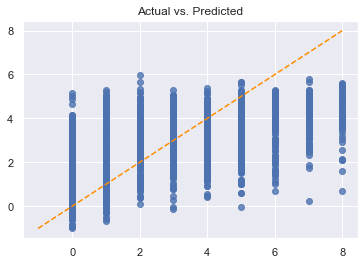

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with drug_use


Education   -0.224220
Nscore       0.199759
Escore      -0.041632
Ascore      -0.189936
Name: drug_use, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with drug_use


Age         -0.368331
Country     -0.496727
Oscore       0.325622
Cscore      -0.285526
Impulsive    0.329801
SS           0.440127
Name: drug_use, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


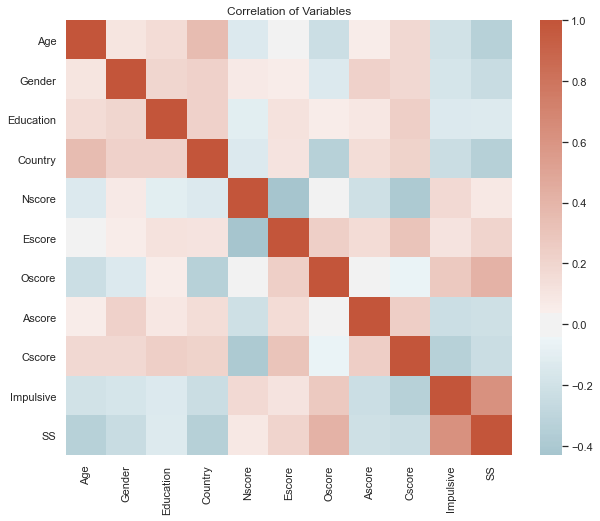

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
SS: 2.082645867948271
Impulsive: 1.7999039199713138
Escore: 1.5554181041299997
Nscore: 1.4872626552316826
Cscore: 1.4677596457586513
Oscore: 1.40248933745074
Country: 1.323681309324016
Age: 1.2408857347002276
Gender: 1.2114752280547745
Ascore: 1.1946667896078238
Education: 1.1498758908229847

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9931668953302775
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative con

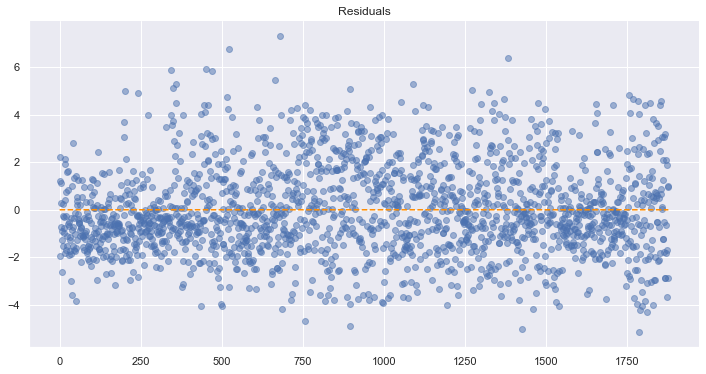

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 210.69572341537938,
 'pvalue for LM': 9.439348947210868e-40,
 'F stats': 21.449657698278667,
 'pvalue for Fstats': 1.4078243743857436e-41}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 7.142951151404801e-28
Residuals are not normally distributed


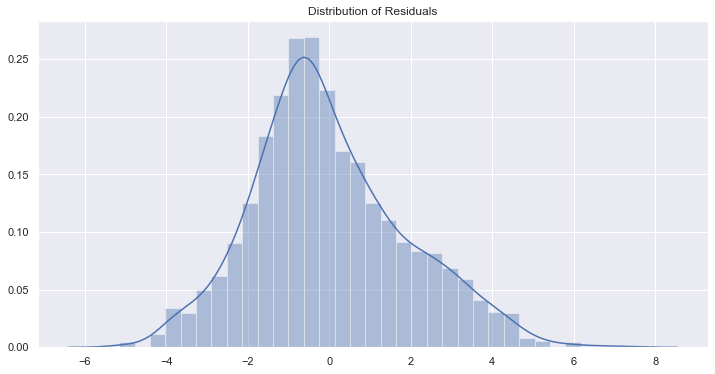


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


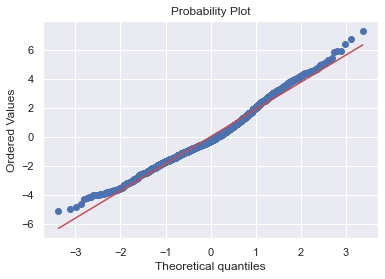

Assumption can be considered as satisfied.


{'Satisfied': ['Multicollinearity', 'Autocorrelation', 'Sub-Normality'],
 'Potentially': ['Linearity', 'Autocorrelation'],
 'Violated': ['Normality']}

In [143]:
tester=ass.Assumption_Tester_OLS(X,y)
tester.run_all()

## Modelling

### Hard Drugs
#### Train & Test Data

In [144]:
iv = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
dv = ['hard']
X_train, X_test,y_train,y_test = train_test_split(df[iv], df[dv], test_size= 0.3, random_state=17, stratify=df[dv])

#### Logistic Regression

In [145]:
y_train=y_train.values.astype(bool).ravel()
y_test=y_test.values.astype(bool).ravel()

In [146]:
model1=LogisticRegression(max_iter=1e8)
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test,y_pred1)
display(conf1)
acc1=accuracy_score(y_test,y_pred1)
rec1=recall_score(y_test,y_pred1)
pr1=precision_score(y_test,y_pred1)
f11=f1_score(y_test,y_pred1)
print(acc1,pr1,rec1,f11)

array([[131,  72],
       [ 51, 310]], dtype=int64)

0.7819148936170213 0.8115183246073299 0.8587257617728532 0.8344549125168237


#### Logistic Regression balanced

In [147]:
model2=LogisticRegression(max_iter=1e8, class_weight='balanced')
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
conf2=confusion_matrix(y_test,y_pred2)
display(conf2)
acc2=accuracy_score(y_test,y_pred2)
rec2=recall_score(y_test,y_pred2)
pr2=precision_score(y_test,y_pred2)
f12=f1_score(y_test,y_pred2)
print(acc2,pr2,rec2,f12)

array([[157,  46],
       [ 77, 284]], dtype=int64)

0.7819148936170213 0.8606060606060606 0.7867036011080333 0.8219971056439942


#### Support Vector Machine

In [148]:
model3=SVC()
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
conf3=confusion_matrix(y_test,y_pred3)
display(conf3)
acc3=accuracy_score(y_test,y_pred3)
rec3=recall_score(y_test,y_pred3)
pr3=precision_score(y_test,y_pred3)
f13=f1_score(y_test,y_pred3)
print(acc3,pr3,rec3,f13)

array([[128,  75],
       [ 48, 313]], dtype=int64)

0.7819148936170213 0.8067010309278351 0.8670360110803325 0.835781041388518


#### Nu-Support Vector Machine

In [149]:
model4=NuSVC(nu=0.1)
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
conf4=confusion_matrix(y_test,y_pred4)
display(conf4)
acc4=accuracy_score(y_test,y_pred4)
rec4=recall_score(y_test,y_pred4)
pr4=precision_score(y_test,y_pred4)
f14=f1_score(y_test,y_pred4)
print(acc4,pr4,rec4,f14)

array([[106,  97],
       [ 71, 290]], dtype=int64)

0.7021276595744681 0.7493540051679587 0.8033240997229917 0.7754010695187167


#### Gaussian Naive Bayes

In [150]:
model5=GaussianNB()
model5.fit(X_train,y_train)
y_pred5=model5.predict(X_test)
conf5=confusion_matrix(y_test,y_pred5)
display(conf5)
acc5=accuracy_score(y_test,y_pred5)
rec5=recall_score(y_test,y_pred5)
pr5=precision_score(y_test,y_pred5)
f15=f1_score(y_test,y_pred5)
print(acc5,pr5,rec5,f15)

array([[144,  59],
       [ 75, 286]], dtype=int64)

0.7624113475177305 0.8289855072463768 0.7922437673130194 0.8101983002832861


#### Decision Trees

In [151]:
model6=DecisionTreeClassifier()
model6.fit(X_train,y_train)
y_pred6=model6.predict(X_test)
conf6=confusion_matrix(y_test,y_pred6)
display(conf6)
acc6=accuracy_score(y_test,y_pred6)
rec6=recall_score(y_test,y_pred6)
pr6=precision_score(y_test,y_pred6)
f16=f1_score(y_test,y_pred6)
print(acc6,pr6,rec6,f16)

array([[116,  87],
       [ 69, 292]], dtype=int64)

0.723404255319149 0.7704485488126649 0.8088642659279779 0.7891891891891892


In [152]:
confusion_matrix(y_train,model6.predict(X_train))

array([[474,   0],
       [  0, 839]], dtype=int64)

#### Random Forest

In [153]:
model7=RandomForestClassifier()
model7.fit(X_train,y_train)
y_pred7=model7.predict(X_test)
conf7=confusion_matrix(y_test,y_pred7)
display(conf7)
acc7=accuracy_score(y_test,y_pred7)
rec7=recall_score(y_test,y_pred7)
pr7=precision_score(y_test,y_pred7)
f17=f1_score(y_test,y_pred7)
print(acc7,pr7,rec7,f17)

array([[123,  80],
       [ 46, 315]], dtype=int64)

0.776595744680851 0.7974683544303798 0.8725761772853186 0.8333333333333333


In [154]:
confusion_matrix(y_train,model7.predict(X_train))

array([[474,   0],
       [  0, 839]], dtype=int64)

#### Random Forest balanced

In [155]:
model8=RandomForestClassifier(class_weight='balanced')
model8.fit(X_train,y_train)
y_pred8=model8.predict(X_test)
conf8=confusion_matrix(y_test,y_pred8)
display(conf8)
acc8=accuracy_score(y_test,y_pred8)
rec8=recall_score(y_test,y_pred8)
pr8=precision_score(y_test,y_pred8)
f18=f1_score(y_test,y_pred8)
print(acc8,pr8,rec8,f18)

array([[125,  78],
       [ 50, 311]], dtype=int64)

0.7730496453900709 0.7994858611825193 0.8614958448753463 0.8293333333333334


In [156]:
confusion_matrix(y_train,model8.predict(X_train))

array([[474,   0],
       [  0, 839]], dtype=int64)

#### AdaBoost

In [157]:
model9=AdaBoostClassifier()
model9.fit(X_train,y_train)
y_pred9=model9.predict(X_test)
conf9=confusion_matrix(y_test,y_pred9)
display(conf9)
acc9=accuracy_score(y_test,y_pred9)
rec9=recall_score(y_test,y_pred9)
pr9=precision_score(y_test,y_pred9)
f19=f1_score(y_test,y_pred9)
print(acc9,pr9,rec9,f19)

array([[127,  76],
       [ 54, 307]], dtype=int64)

0.7695035460992907 0.8015665796344648 0.850415512465374 0.825268817204301


In [158]:
confusion_matrix(y_train,model9.predict(X_train))

array([[336, 138],
       [112, 727]], dtype=int64)

#### XGBoost

In [159]:
model10=XGBClassifier()
model10.fit(X_train,y_train)
y_pred10=model10.predict(X_test)
conf10=confusion_matrix(y_test,y_pred10)
display(conf10)
acc10=accuracy_score(y_test,y_pred10)
rec10=recall_score(y_test,y_pred10)
pr10=precision_score(y_test,y_pred10)
f110=f1_score(y_test,y_pred10)
print(acc10,pr10,rec10,f110)

array([[119,  84],
       [ 49, 312]], dtype=int64)

0.7641843971631206 0.7878787878787878 0.8642659279778393 0.8243064729194187


In [160]:
confusion_matrix(y_train,model10.predict(X_train))

array([[474,   0],
       [  0, 839]], dtype=int64)

#### K-Nearest Neighbors

In [161]:
model11=KNeighborsClassifier(n_neighbors=7)
model11.fit(X_train,y_train)
y_pred11=model11.predict(X_test)
conf11=confusion_matrix(y_test,y_pred11)
display(conf11)
acc11=accuracy_score(y_test,y_pred11)
rec11=recall_score(y_test,y_pred11)
pr11=precision_score(y_test,y_pred11)
f111=f1_score(y_test,y_pred11)
print(acc11,pr11,rec11,f111)

array([[128,  75],
       [ 49, 312]], dtype=int64)

0.7801418439716312 0.8062015503875969 0.8642659279778393 0.8342245989304813


0.7474038999495108


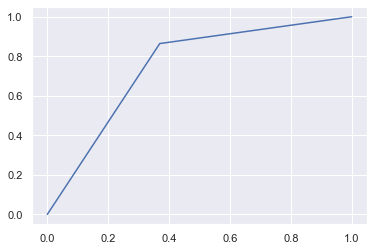

In [162]:
fpr,tpr,_=roc_curve(y_test,y_pred11)
auc=roc_auc_score(y_test,y_pred11)
plt.plot(fpr,tpr)
print(auc)

In [163]:
model11=KNeighborsClassifier(weights='distance')
model11.fit(X_train,y_train)
y_pred11=model11.predict(X_test)
conf11=confusion_matrix(y_test,y_pred11)
display(conf11)
acc11=accuracy_score(y_test,y_pred11)
rec11=recall_score(y_test,y_pred11)
pr11=precision_score(y_test,y_pred11)
f111=f1_score(y_test,y_pred11)
print(acc11,pr11,rec11,f111)

array([[120,  83],
       [ 58, 303]], dtype=int64)

0.75 0.7849740932642487 0.8393351800554016 0.8112449799196788


#### Catboost

In [164]:
model12=CatBoostClassifier()
model12.fit(X_train,y_train)
y_pred12=model12.predict(X_test)
conf12=confusion_matrix(y_test,[eval(i) for i in y_pred12])
display(conf12)
acc12=accuracy_score(y_test,[eval(i) for i in y_pred12])
rec12=recall_score(y_test,[eval(i) for i in y_pred12])
pr12=precision_score(y_test,[eval(i) for i in y_pred12])
f112=f1_score(y_test,[eval(i) for i in y_pred12])
print(acc12,pr12,rec12,f112)

Learning rate set to 0.011573
0:	learn: 0.6865814	total: 5.59ms	remaining: 5.58s
1:	learn: 0.6807637	total: 10.1ms	remaining: 5.04s
2:	learn: 0.6748252	total: 14ms	remaining: 4.65s
3:	learn: 0.6687753	total: 17.8ms	remaining: 4.44s
4:	learn: 0.6627113	total: 21.9ms	remaining: 4.36s
5:	learn: 0.6565110	total: 26.1ms	remaining: 4.32s
6:	learn: 0.6507870	total: 30.2ms	remaining: 4.28s
7:	learn: 0.6444065	total: 34.5ms	remaining: 4.28s
8:	learn: 0.6390658	total: 39ms	remaining: 4.29s
9:	learn: 0.6343687	total: 43.7ms	remaining: 4.33s
10:	learn: 0.6293854	total: 47.7ms	remaining: 4.29s
11:	learn: 0.6247148	total: 52.1ms	remaining: 4.29s
12:	learn: 0.6191502	total: 56.1ms	remaining: 4.26s
13:	learn: 0.6138691	total: 59.7ms	remaining: 4.21s
14:	learn: 0.6093572	total: 63.7ms	remaining: 4.18s
15:	learn: 0.6045013	total: 67.9ms	remaining: 4.18s
16:	learn: 0.6005026	total: 72.1ms	remaining: 4.17s
17:	learn: 0.5956028	total: 75.9ms	remaining: 4.14s
18:	learn: 0.5908960	total: 79.7ms	remaining: 4.

169:	learn: 0.3905663	total: 663ms	remaining: 3.24s
170:	learn: 0.3900567	total: 667ms	remaining: 3.23s
171:	learn: 0.3895827	total: 671ms	remaining: 3.23s
172:	learn: 0.3891859	total: 674ms	remaining: 3.22s
173:	learn: 0.3887493	total: 678ms	remaining: 3.22s
174:	learn: 0.3882492	total: 682ms	remaining: 3.21s
175:	learn: 0.3878214	total: 686ms	remaining: 3.21s
176:	learn: 0.3875372	total: 690ms	remaining: 3.21s
177:	learn: 0.3871521	total: 694ms	remaining: 3.2s
178:	learn: 0.3869582	total: 698ms	remaining: 3.2s
179:	learn: 0.3864336	total: 702ms	remaining: 3.2s
180:	learn: 0.3860120	total: 705ms	remaining: 3.19s
181:	learn: 0.3854969	total: 709ms	remaining: 3.19s
182:	learn: 0.3850144	total: 713ms	remaining: 3.18s
183:	learn: 0.3848403	total: 716ms	remaining: 3.17s
184:	learn: 0.3843651	total: 719ms	remaining: 3.17s
185:	learn: 0.3839942	total: 723ms	remaining: 3.17s
186:	learn: 0.3835237	total: 727ms	remaining: 3.16s
187:	learn: 0.3831288	total: 730ms	remaining: 3.15s
188:	learn: 0.3

340:	learn: 0.3392384	total: 1.33s	remaining: 2.56s
341:	learn: 0.3388048	total: 1.33s	remaining: 2.56s
342:	learn: 0.3386075	total: 1.33s	remaining: 2.55s
343:	learn: 0.3383256	total: 1.33s	remaining: 2.54s
344:	learn: 0.3381345	total: 1.34s	remaining: 2.54s
345:	learn: 0.3379392	total: 1.34s	remaining: 2.53s
346:	learn: 0.3376597	total: 1.34s	remaining: 2.52s
347:	learn: 0.3373964	total: 1.34s	remaining: 2.52s
348:	learn: 0.3372633	total: 1.35s	remaining: 2.51s
349:	learn: 0.3370401	total: 1.35s	remaining: 2.5s
350:	learn: 0.3366856	total: 1.35s	remaining: 2.5s
351:	learn: 0.3363690	total: 1.35s	remaining: 2.49s
352:	learn: 0.3360456	total: 1.36s	remaining: 2.48s
353:	learn: 0.3357862	total: 1.36s	remaining: 2.48s
354:	learn: 0.3357195	total: 1.36s	remaining: 2.47s
355:	learn: 0.3355040	total: 1.36s	remaining: 2.47s
356:	learn: 0.3352592	total: 1.37s	remaining: 2.46s
357:	learn: 0.3350718	total: 1.37s	remaining: 2.46s
358:	learn: 0.3347382	total: 1.37s	remaining: 2.45s
359:	learn: 0.

530:	learn: 0.3015932	total: 2s	remaining: 1.76s
531:	learn: 0.3014296	total: 2s	remaining: 1.76s
532:	learn: 0.3013231	total: 2s	remaining: 1.75s
533:	learn: 0.3011802	total: 2.01s	remaining: 1.75s
534:	learn: 0.3009890	total: 2.01s	remaining: 1.75s
535:	learn: 0.3007526	total: 2.01s	remaining: 1.74s
536:	learn: 0.3004207	total: 2.02s	remaining: 1.74s
537:	learn: 0.3002410	total: 2.02s	remaining: 1.74s
538:	learn: 0.3000793	total: 2.02s	remaining: 1.73s
539:	learn: 0.2998326	total: 2.03s	remaining: 1.73s
540:	learn: 0.2995768	total: 2.03s	remaining: 1.72s
541:	learn: 0.2994726	total: 2.04s	remaining: 1.72s
542:	learn: 0.2991153	total: 2.04s	remaining: 1.72s
543:	learn: 0.2989401	total: 2.04s	remaining: 1.71s
544:	learn: 0.2985776	total: 2.05s	remaining: 1.71s
545:	learn: 0.2983663	total: 2.05s	remaining: 1.71s
546:	learn: 0.2981511	total: 2.05s	remaining: 1.7s
547:	learn: 0.2979943	total: 2.06s	remaining: 1.7s
548:	learn: 0.2978836	total: 2.06s	remaining: 1.69s
549:	learn: 0.2977147	t

722:	learn: 0.2685235	total: 2.66s	remaining: 1.02s
723:	learn: 0.2683865	total: 2.66s	remaining: 1.01s
724:	learn: 0.2683703	total: 2.66s	remaining: 1.01s
725:	learn: 0.2680387	total: 2.67s	remaining: 1.01s
726:	learn: 0.2677076	total: 2.67s	remaining: 1s
727:	learn: 0.2674171	total: 2.67s	remaining: 999ms
728:	learn: 0.2672424	total: 2.68s	remaining: 996ms
729:	learn: 0.2672183	total: 2.68s	remaining: 993ms
730:	learn: 0.2670154	total: 2.69s	remaining: 989ms
731:	learn: 0.2668083	total: 2.69s	remaining: 985ms
732:	learn: 0.2666095	total: 2.69s	remaining: 982ms
733:	learn: 0.2665162	total: 2.7s	remaining: 978ms
734:	learn: 0.2662696	total: 2.7s	remaining: 974ms
735:	learn: 0.2661070	total: 2.71s	remaining: 971ms
736:	learn: 0.2660086	total: 2.71s	remaining: 967ms
737:	learn: 0.2657485	total: 2.71s	remaining: 964ms
738:	learn: 0.2654788	total: 2.72s	remaining: 960ms
739:	learn: 0.2653123	total: 2.72s	remaining: 957ms
740:	learn: 0.2652783	total: 2.73s	remaining: 954ms
741:	learn: 0.265

898:	learn: 0.2429129	total: 3.32s	remaining: 373ms
899:	learn: 0.2428993	total: 3.33s	remaining: 370ms
900:	learn: 0.2426904	total: 3.33s	remaining: 366ms
901:	learn: 0.2424971	total: 3.33s	remaining: 362ms
902:	learn: 0.2423106	total: 3.34s	remaining: 358ms
903:	learn: 0.2422228	total: 3.34s	remaining: 355ms
904:	learn: 0.2420261	total: 3.34s	remaining: 351ms
905:	learn: 0.2418090	total: 3.35s	remaining: 347ms
906:	learn: 0.2415947	total: 3.35s	remaining: 344ms
907:	learn: 0.2414334	total: 3.36s	remaining: 340ms
908:	learn: 0.2412054	total: 3.36s	remaining: 336ms
909:	learn: 0.2410365	total: 3.36s	remaining: 333ms
910:	learn: 0.2408214	total: 3.37s	remaining: 329ms
911:	learn: 0.2407360	total: 3.37s	remaining: 325ms
912:	learn: 0.2407287	total: 3.38s	remaining: 322ms
913:	learn: 0.2405703	total: 3.38s	remaining: 318ms
914:	learn: 0.2405611	total: 3.38s	remaining: 314ms
915:	learn: 0.2403960	total: 3.39s	remaining: 311ms
916:	learn: 0.2402438	total: 3.39s	remaining: 307ms
917:	learn: 

array([[133,  70],
       [ 46, 315]], dtype=int64)

0.7943262411347518 0.8181818181818182 0.8725761772853186 0.8445040214477212


In [165]:
confusion_matrix(y_train,[eval(i) for i in model12.predict(X_train)])

array([[427,  47],
       [ 41, 798]], dtype=int64)

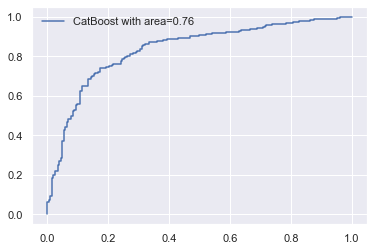

In [166]:
model_roc = roc_auc_score(y_test, [eval(i) for i in y_pred12])
fpr4,tpr4,thresholds4=roc_curve(y_test, model12.predict_proba(X_test)[:,1])
plt.plot(fpr4,tpr4, label=f'CatBoost with area={model_roc.round(2)}')
plt.legend()

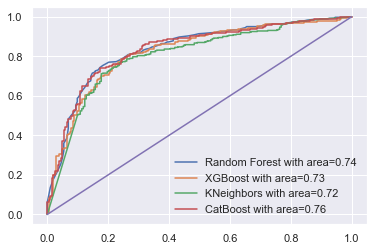

In [167]:
model_roc1=roc_auc_score(y_test, y_pred7)
fpr1,tpr1,thresholds1=roc_curve(y_test, model7.predict_proba(X_test)[:,1])

model_roc2=roc_auc_score(y_test, y_pred10)
fpr2,tpr2,thresholds2=roc_curve(y_test, model10.predict_proba(X_test)[:,1])

model_roc3=roc_auc_score(y_test, y_pred11)
fpr3,tpr3,thresholds3=roc_curve(y_test, model11.predict_proba(X_test)[:,1])

model_roc4=roc_auc_score(y_test, [eval(i) for i in y_pred12])
fpr4,tpr4,thresholds4=roc_curve(y_test, model12.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr1,tpr1, label=f'Random Forest with area={model_roc1.round(2)}')
plt.plot(fpr2,tpr2, label=f'XGBoost with area={model_roc2.round(2)}')
plt.plot(fpr3,tpr3, label=f'KNeighbors with area={model_roc3.round(2)}')
plt.plot(fpr4,tpr4, label=f'CatBoost with area={model_roc4.round(2)}')

plt.plot([0,1],[0,1])
plt.legend()
plt.show()

#### PCA

In [168]:
pca=PCA(0.85).fit(X_train)
X_train2=pca.transform(X_train)
X_test2=pca.transform(X_test)

In [169]:
pca.explained_variance_ratio_.round(2)

array([0.26, 0.2 , 0.1 , 0.1 , 0.08, 0.06, 0.06])

In [170]:
pca.singular_values_.shape[0]

7

##### Catboost

In [171]:
model12=CatBoostClassifier()
model12.fit(X_train2,y_train)
y_pred12=model12.predict(X_test2)
conf12=confusion_matrix(y_test,[eval(i) for i in y_pred12])
display(conf12)
acc12=accuracy_score(y_test,[eval(i) for i in y_pred12])
rec12=recall_score(y_test,[eval(i) for i in y_pred12])
pr12=precision_score(y_test,[eval(i) for i in y_pred12])
f112=f1_score(y_test,[eval(i) for i in y_pred12])
print(acc12,pr12,rec12,f112)

Learning rate set to 0.011573
0:	learn: 0.6877111	total: 6.05ms	remaining: 6.04s
1:	learn: 0.6829013	total: 11.5ms	remaining: 5.73s
2:	learn: 0.6776400	total: 16.6ms	remaining: 5.53s
3:	learn: 0.6723069	total: 21.5ms	remaining: 5.34s
4:	learn: 0.6681744	total: 27.1ms	remaining: 5.39s
5:	learn: 0.6634198	total: 32.6ms	remaining: 5.39s
6:	learn: 0.6590771	total: 38.3ms	remaining: 5.43s
7:	learn: 0.6544871	total: 45.2ms	remaining: 5.6s
8:	learn: 0.6495066	total: 50.2ms	remaining: 5.52s
9:	learn: 0.6450297	total: 55.2ms	remaining: 5.47s
10:	learn: 0.6405097	total: 61ms	remaining: 5.49s
11:	learn: 0.6355972	total: 66ms	remaining: 5.44s
12:	learn: 0.6319196	total: 72ms	remaining: 5.46s
13:	learn: 0.6280062	total: 77.1ms	remaining: 5.43s
14:	learn: 0.6236722	total: 82ms	remaining: 5.38s
15:	learn: 0.6196241	total: 88.1ms	remaining: 5.42s
16:	learn: 0.6161260	total: 93.2ms	remaining: 5.39s
17:	learn: 0.6124347	total: 100ms	remaining: 5.46s
18:	learn: 0.6093213	total: 105ms	remaining: 5.44s
19:

174:	learn: 0.4115468	total: 854ms	remaining: 4.03s
175:	learn: 0.4112267	total: 861ms	remaining: 4.03s
176:	learn: 0.4106145	total: 865ms	remaining: 4.02s
177:	learn: 0.4099816	total: 870ms	remaining: 4.02s
178:	learn: 0.4096606	total: 875ms	remaining: 4.01s
179:	learn: 0.4092246	total: 879ms	remaining: 4.01s
180:	learn: 0.4089095	total: 885ms	remaining: 4s
181:	learn: 0.4084025	total: 890ms	remaining: 4s
182:	learn: 0.4079566	total: 895ms	remaining: 4s
183:	learn: 0.4074518	total: 900ms	remaining: 3.99s
184:	learn: 0.4071183	total: 905ms	remaining: 3.99s
185:	learn: 0.4066601	total: 910ms	remaining: 3.98s
186:	learn: 0.4062647	total: 914ms	remaining: 3.98s
187:	learn: 0.4058182	total: 920ms	remaining: 3.97s
188:	learn: 0.4055600	total: 924ms	remaining: 3.96s
189:	learn: 0.4052008	total: 929ms	remaining: 3.96s
190:	learn: 0.4049093	total: 934ms	remaining: 3.95s
191:	learn: 0.4044871	total: 938ms	remaining: 3.95s
192:	learn: 0.4040371	total: 943ms	remaining: 3.94s
193:	learn: 0.4037234

349:	learn: 0.3542192	total: 1.71s	remaining: 3.17s
350:	learn: 0.3540477	total: 1.71s	remaining: 3.16s
351:	learn: 0.3537547	total: 1.71s	remaining: 3.16s
352:	learn: 0.3535569	total: 1.72s	remaining: 3.15s
353:	learn: 0.3533364	total: 1.73s	remaining: 3.15s
354:	learn: 0.3531115	total: 1.73s	remaining: 3.14s
355:	learn: 0.3528883	total: 1.73s	remaining: 3.13s
356:	learn: 0.3525772	total: 1.74s	remaining: 3.13s
357:	learn: 0.3524135	total: 1.74s	remaining: 3.12s
358:	learn: 0.3522278	total: 1.74s	remaining: 3.11s
359:	learn: 0.3520799	total: 1.75s	remaining: 3.1s
360:	learn: 0.3517525	total: 1.75s	remaining: 3.1s
361:	learn: 0.3514639	total: 1.75s	remaining: 3.09s
362:	learn: 0.3511735	total: 1.76s	remaining: 3.08s
363:	learn: 0.3509163	total: 1.76s	remaining: 3.07s
364:	learn: 0.3506202	total: 1.76s	remaining: 3.07s
365:	learn: 0.3504474	total: 1.77s	remaining: 3.06s
366:	learn: 0.3501689	total: 1.77s	remaining: 3.05s
367:	learn: 0.3500173	total: 1.77s	remaining: 3.04s
368:	learn: 0.

534:	learn: 0.3146708	total: 2.57s	remaining: 2.23s
535:	learn: 0.3144392	total: 2.58s	remaining: 2.23s
536:	learn: 0.3142405	total: 2.58s	remaining: 2.23s
537:	learn: 0.3138997	total: 2.59s	remaining: 2.22s
538:	learn: 0.3136180	total: 2.59s	remaining: 2.22s
539:	learn: 0.3133739	total: 2.6s	remaining: 2.21s
540:	learn: 0.3131289	total: 2.6s	remaining: 2.21s
541:	learn: 0.3129444	total: 2.61s	remaining: 2.2s
542:	learn: 0.3127601	total: 2.61s	remaining: 2.2s
543:	learn: 0.3125585	total: 2.62s	remaining: 2.19s
544:	learn: 0.3123478	total: 2.62s	remaining: 2.19s
545:	learn: 0.3121077	total: 2.62s	remaining: 2.18s
546:	learn: 0.3118504	total: 2.63s	remaining: 2.18s
547:	learn: 0.3114748	total: 2.63s	remaining: 2.17s
548:	learn: 0.3111710	total: 2.64s	remaining: 2.17s
549:	learn: 0.3109325	total: 2.64s	remaining: 2.16s
550:	learn: 0.3107691	total: 2.65s	remaining: 2.16s
551:	learn: 0.3105845	total: 2.65s	remaining: 2.15s
552:	learn: 0.3102941	total: 2.65s	remaining: 2.14s
553:	learn: 0.31

724:	learn: 0.2793867	total: 3.39s	remaining: 1.29s
725:	learn: 0.2791812	total: 3.4s	remaining: 1.28s
726:	learn: 0.2790054	total: 3.4s	remaining: 1.28s
727:	learn: 0.2788416	total: 3.41s	remaining: 1.27s
728:	learn: 0.2787317	total: 3.41s	remaining: 1.27s
729:	learn: 0.2786082	total: 3.42s	remaining: 1.26s
730:	learn: 0.2784924	total: 3.42s	remaining: 1.26s
731:	learn: 0.2783927	total: 3.42s	remaining: 1.25s
732:	learn: 0.2782476	total: 3.43s	remaining: 1.25s
733:	learn: 0.2780463	total: 3.44s	remaining: 1.24s
734:	learn: 0.2778888	total: 3.44s	remaining: 1.24s
735:	learn: 0.2777133	total: 3.45s	remaining: 1.24s
736:	learn: 0.2775597	total: 3.45s	remaining: 1.23s
737:	learn: 0.2774542	total: 3.46s	remaining: 1.23s
738:	learn: 0.2773669	total: 3.46s	remaining: 1.22s
739:	learn: 0.2772413	total: 3.47s	remaining: 1.22s
740:	learn: 0.2770803	total: 3.48s	remaining: 1.21s
741:	learn: 0.2769234	total: 3.48s	remaining: 1.21s
742:	learn: 0.2767274	total: 3.49s	remaining: 1.21s
743:	learn: 0.

893:	learn: 0.2538954	total: 4.24s	remaining: 503ms
894:	learn: 0.2537197	total: 4.25s	remaining: 499ms
895:	learn: 0.2534975	total: 4.26s	remaining: 494ms
896:	learn: 0.2533783	total: 4.26s	remaining: 489ms
897:	learn: 0.2532467	total: 4.27s	remaining: 485ms
898:	learn: 0.2531675	total: 4.27s	remaining: 480ms
899:	learn: 0.2529246	total: 4.28s	remaining: 475ms
900:	learn: 0.2526412	total: 4.28s	remaining: 471ms
901:	learn: 0.2524925	total: 4.29s	remaining: 466ms
902:	learn: 0.2523763	total: 4.29s	remaining: 461ms
903:	learn: 0.2521934	total: 4.3s	remaining: 456ms
904:	learn: 0.2520757	total: 4.3s	remaining: 452ms
905:	learn: 0.2519645	total: 4.31s	remaining: 447ms
906:	learn: 0.2518799	total: 4.31s	remaining: 442ms
907:	learn: 0.2517498	total: 4.32s	remaining: 438ms
908:	learn: 0.2515867	total: 4.32s	remaining: 433ms
909:	learn: 0.2514772	total: 4.33s	remaining: 428ms
910:	learn: 0.2513203	total: 4.34s	remaining: 424ms
911:	learn: 0.2511753	total: 4.34s	remaining: 419ms
912:	learn: 0.

array([[124,  79],
       [ 49, 312]], dtype=int64)

0.7730496453900709 0.7979539641943734 0.8642659279778393 0.8297872340425532


In [172]:
confusion_matrix(y_train,[eval(i) for i in model12.predict(X_train2)])

array([[420,  54],
       [ 28, 811]], dtype=int64)

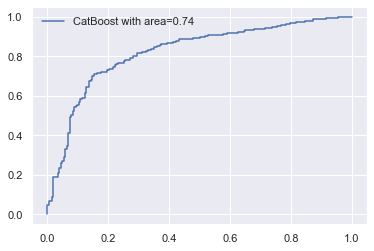

In [173]:
model_roc = roc_auc_score(y_test, [eval(i) for i in y_pred12])
fpr4,tpr4,thresholds4=roc_curve(y_test, model12.predict_proba(X_test2)[:,1])
plt.plot(fpr4,tpr4, label=f'CatBoost with area={model_roc.round(2)}')
plt.legend()

##### Random Forest

In [174]:
model7=RandomForestClassifier()
model7.fit(X_train2,y_train)
y_pred7=model7.predict(X_test2)
conf7=confusion_matrix(y_test,y_pred7)
display(conf7)
acc7=accuracy_score(y_test,y_pred7)
rec7=recall_score(y_test,y_pred7)
pr7=precision_score(y_test,y_pred7)
f17=f1_score(y_test,y_pred7)
print(acc7,pr7,rec7,f17)

array([[118,  85],
       [ 57, 304]], dtype=int64)

0.74822695035461 0.781491002570694 0.8421052631578947 0.8106666666666666


In [175]:
confusion_matrix(y_train,model7.predict(X_train2))

array([[474,   0],
       [  0, 839]], dtype=int64)

0.7116930256676173


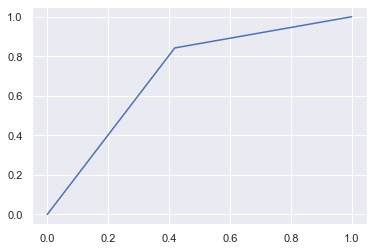

In [176]:
fpr,tpr,_=roc_curve(y_test,y_pred7)
auc=roc_auc_score(y_test,y_pred7)
plt.plot(fpr,tpr)
print(auc)

#### K-Nearest Neighbors

In [177]:
model11=KNeighborsClassifier(n_neighbors=5)
model11.fit(X_train2,y_train)
y_pred11=model11.predict(X_test2)
conf11=confusion_matrix(y_test,y_pred11)
display(conf11)
acc11=accuracy_score(y_test,y_pred11)
rec11=recall_score(y_test,y_pred11)
pr11=precision_score(y_test,y_pred11)
f111=f1_score(y_test,y_pred11)
print(acc11,pr11,rec11,f111)

array([[118,  85],
       [ 56, 305]], dtype=int64)

0.75 0.782051282051282 0.8448753462603878 0.8122503328894808


0.7130780672188639


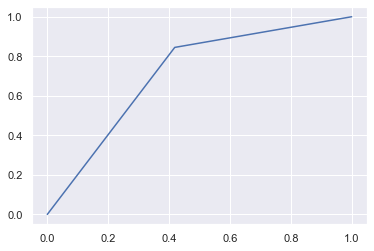

In [178]:
fpr,tpr,_=roc_curve(y_test,y_pred11)
auc=roc_auc_score(y_test,y_pred11)
plt.plot(fpr,tpr)
print(auc)

In [179]:
model11=KNeighborsClassifier(weights='distance')
model11.fit(X_train2,y_train)
y_pred11=model11.predict(X_test2)
conf11=confusion_matrix(y_test,y_pred11)
display(conf11)
acc11=accuracy_score(y_test,y_pred11)
rec11=recall_score(y_test,y_pred11)
pr11=precision_score(y_test,y_pred11)
f111=f1_score(y_test,y_pred11)
print(acc11,pr11,rec11,f111)

array([[117,  86],
       [ 56, 305]], dtype=int64)

0.74822695035461 0.7800511508951407 0.8448753462603878 0.8111702127659574


0.710615013031672


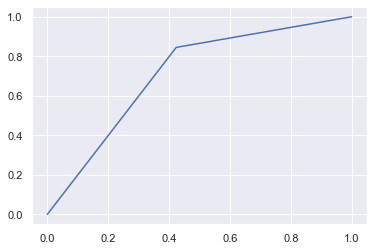

In [180]:
fpr,tpr,_=roc_curve(y_test,y_pred11)
auc=roc_auc_score(y_test,y_pred11)
plt.plot(fpr,tpr)
print(auc)

Got worse with the PCA